<img src="Header.png" style="width:100%; max-width:100%"/>

# Import de différentes librairies

In [1]:
# Librairies principales de data science
import pandas as pd
import numpy as np

# Visualisation de données
import matplotlib.pyplot as plt
import seaborn as sns

# Divers
import os
import re

# Visualisation des données manquantes
import missingno as msno

In [2]:
# Modification des paramètres d'affichage

pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Optimisation de l'import des fichiers et de la taille en mémoire

In [3]:
def reduce_mem_usage(df):
    """ iterrer à travers toutes les colonnes d'un dataframe et modificer les données pour réduire l'utilisation mémoire
       
        1. On iterre colonne par colonne
        2. On détermine si elle est numérique ou non
        3. On détermine si elle peut être représentée par un entier
        4. On définit le maximum et le minimum
        5. On détermine et applique le plus petit type de données qui irait avec la plage min max
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('L utilisation mémoire du dataframe avant optimisation est de {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Après optimisation, l utilisation de la mémoire est de : {:.2f} MB'.format(end_mem))
    print('Il y a eu réduction de {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


def import_data(file):
    """Créer le dataframe et optimiser son utilisation mémoire"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

# Import des fichiers de données

Le jeu de données comporte 7 fichiers, qui sont connectés entre selon le schéma ci-dessous.

<img src="home_credit.png" style="width:100%; max-width:100%"/>

In [4]:
path = './Projet+Mise+en+prod+-+home-credit-default-risk'

In [5]:
train1 = import_data(path+'/application_train.csv')
print("Le jeu de données comporte "+ str(train1.shape[0]) +" enregistrements et "+ str(train1.shape[1]) +" variables.")
train1.head(3)

L utilisation mémoire du dataframe avant optimisation est de 286.23 MB
Après optimisation, l utilisation de la mémoire est de : 59.54 MB
Il y a eu réduction de 79.2%
Le jeu de données comporte 307511 enregistrements et 122 variables.


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018799       -9461           -637            -3648.0   
1                    0.003542      -16765          -1188            -1186.0   
2                    0.010033      -19046           -225            -4260.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.083008      0.262939      0.139404        0.024704          0.036896   
1      0.311279      0.622070           NaN        0.095886          0.052887   
2           NaN      0.556152      0.729492             NaN               NaN   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
0                     0.972168         0.619141        0.014297   
1                     0.984863         0.795898        0.060486   
2                          NaN              NaN             NaN   

   ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0     

<AxesSubplot:>

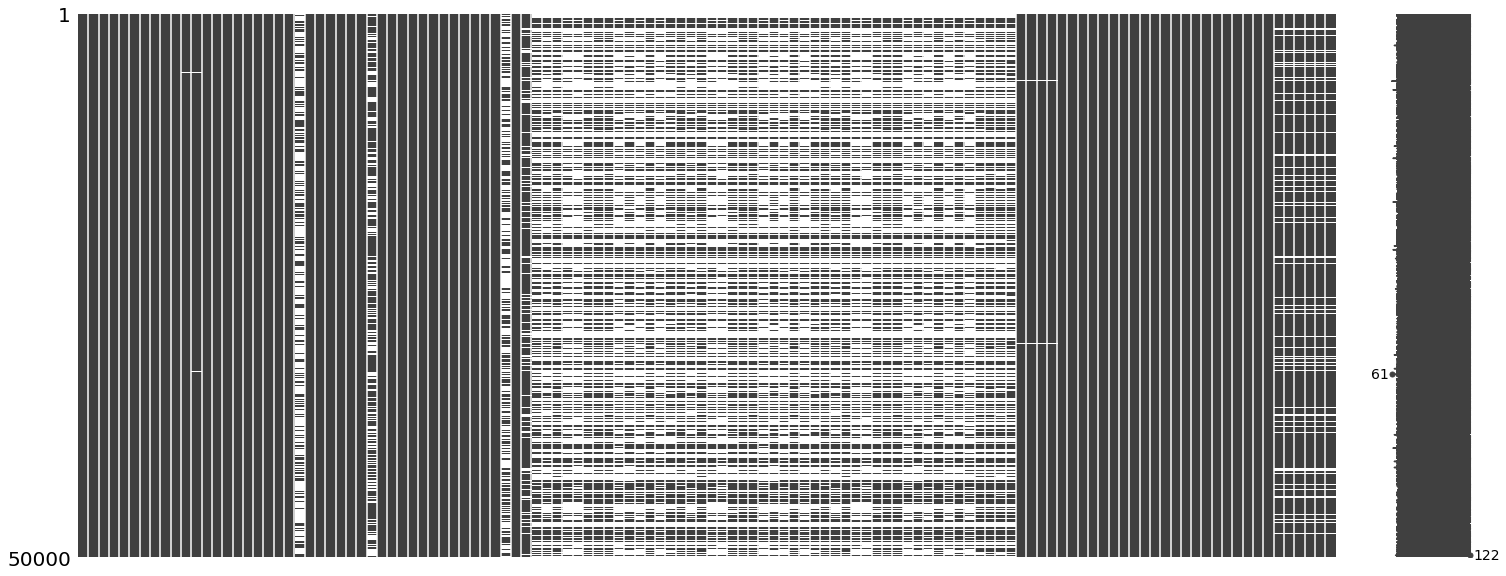

In [6]:
msno.matrix(train1.sample(50000))

On voit que beaucoup de variables ont un très petit taux de remplissage. On va donc supprimer toutes les features ayant un taux de remplissage inférieur à 75%.

In [7]:
train = train1.dropna(thresh=len(train1)*0.75, axis='columns')
print(train.shape)

(307511, 72)


On a donc supprimé 50 variables. Pour retirer les mêmes features du jeu de test et conserver quelque chose de cohérent, on va enregistrer et comparer la liste des features de train et train1

In [8]:
diff_train = list(set(train1) - set(train))

In [9]:
len(diff_train)

50

In [10]:
test1 = import_data(path+'/application_test.csv')
print("Le jeu de données comporte "+ str(test1.shape[0]) +" enregistrements et "+ str(test1.shape[1]) +" variables.")
test1.head(3)

L utilisation mémoire du dataframe avant optimisation est de 45.00 MB
Après optimisation, l utilisation de la mémoire est de : 9.40 MB
Il y a eu réduction de 79.1%
Le jeu de données comporte 48744 enregistrements et 121 variables.


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2             NaN          Working               Higher education   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                    0.018845   
1            Married  House / apartment                    0.035797   
2            Married  House / apartment                    0.019104   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -19241          -2329            -5168.0             -812          NaN   
1      -18064          -4469            -9120.0            -1623          NaN   
2      -20038          -4458            -2176.0            -3503          5.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                0                 1           0   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1                 NaN              2.0                     2   
1           0  Low-skill Laborers              2.0                     2   
2           0             Drivers              2.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
2                            2                     MONDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   

   ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0       Kindergarten      0.752441      0.789551      0.159546   
1      Self-employed      0.564941      0.291748      0.432861   
2  Transport: type 3           NaN      0.699707      0.610840   

   APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0        0.065979           0.05899                     0.973145   
1             NaN               NaN                          NaN   
2             NaN               NaN                          NaN   

   YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0              NaN             NaN            NaN       0.137939   
1              NaN             NaN            NaN            NaN   
2              NaN             NaN            NaN            NaN   

   FLOORSMAX_

<AxesSubplot:>

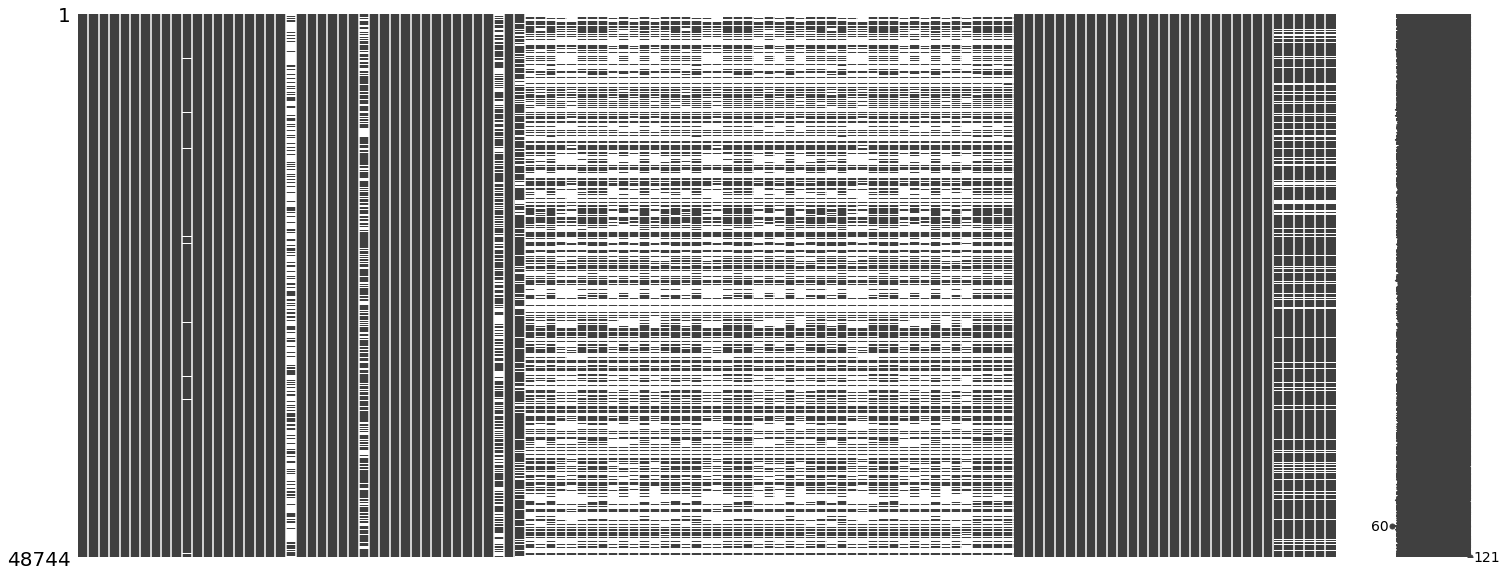

In [11]:
msno.matrix(test1)

On va retirer les mêmes variables que pour le train test, pour rester cohérents dans l'analyse

In [12]:
test = test1.drop(diff_train,axis=1)

In [13]:
test.shape

(48744, 71)

C'est donc bien correct car la variable en différence est la target

In [14]:
bureau1 = import_data(path+'/bureau.csv')
print("Le jeu de données comporte "+ str(bureau1.shape[0]) +" enregistrements et "+ str(bureau1.shape[1]) +" variables.")
bureau1.head(3)

L utilisation mémoire du dataframe avant optimisation est de 222.62 MB
Après optimisation, l utilisation de la mémoire est de : 78.57 MB
Il y a eu réduction de 64.7%
Le jeu de données comporte 1716428 enregistrements et 17 variables.


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN

<AxesSubplot:>

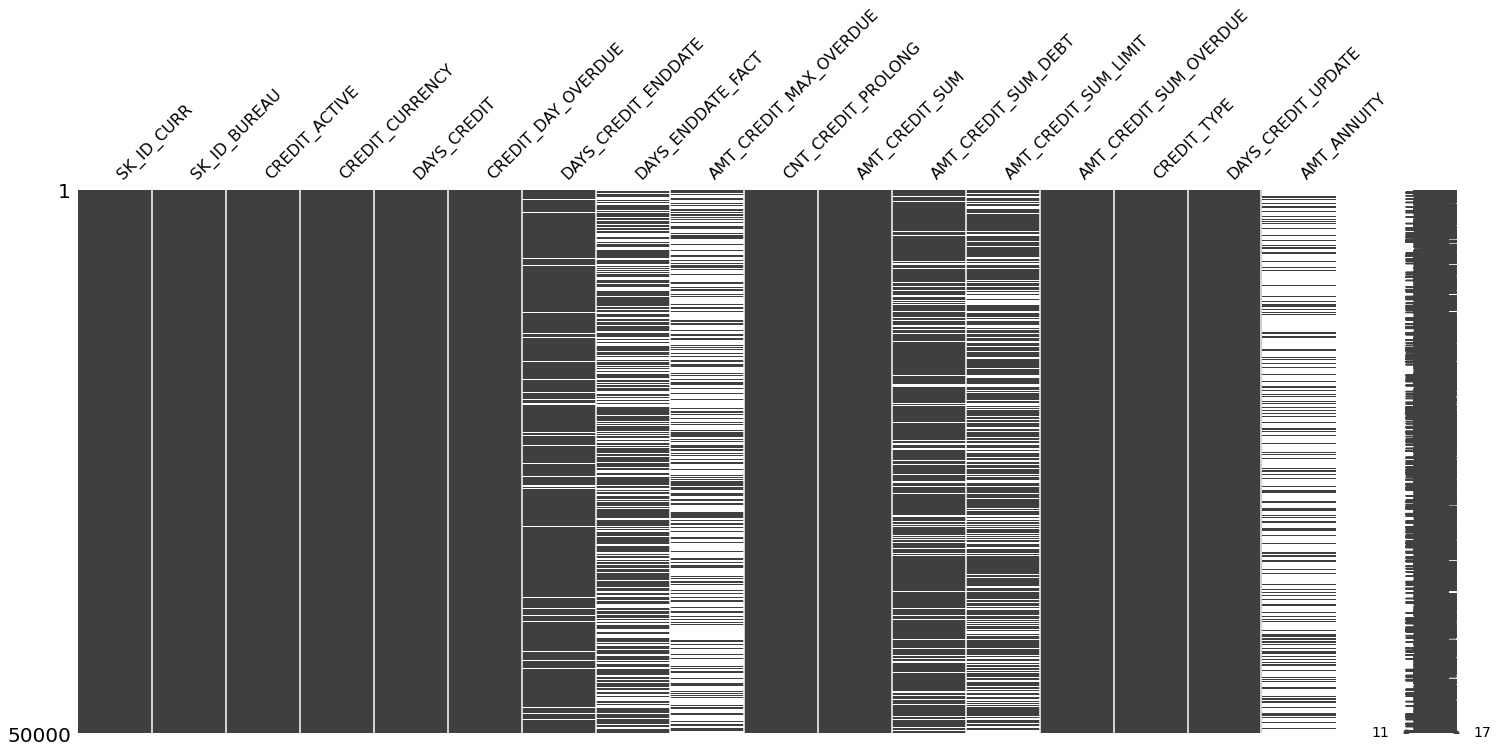

In [15]:
msno.matrix(bureau1.sample(50000))

In [16]:
# On va aussi supprimer les features qui ont un faible taux de remplissage
bureau = bureau1.dropna(thresh=len(bureau1)*0.75, axis='columns')
print(bureau.shape)

(1716428, 13)


In [17]:
bureau_balance1 = import_data(path+'/bureau_balance.csv')
print("Le jeu de données comporte "+ str(bureau_balance1.shape[0]) +" enregistrements et "+ str(bureau_balance1.shape[1]) +" variables.")
bureau_balance1.head(3)

L utilisation mémoire du dataframe avant optimisation est de 624.85 MB
Après optimisation, l utilisation de la mémoire est de : 156.21 MB
Il y a eu réduction de 75.0%
Le jeu de données comporte 27299925 enregistrements et 3 variables.


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C

<AxesSubplot:>

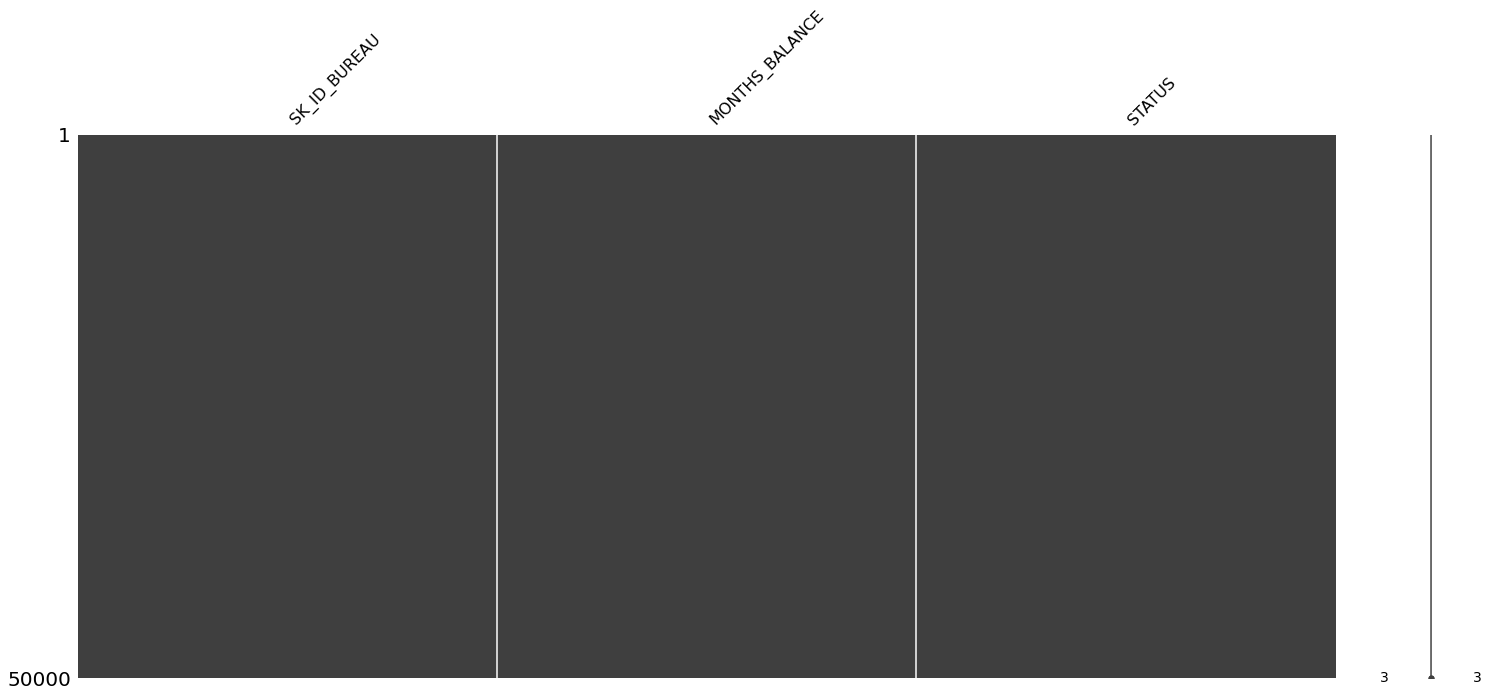

In [18]:
msno.matrix(bureau_balance1.sample(50000))

In [19]:
# On va aussi supprimer les features qui ont un faible taux de remplissage
bureau_balance = bureau_balance1.dropna(thresh=len(bureau_balance1)*0.75, axis='columns')
print(bureau_balance.shape)

(27299925, 3)


In [20]:
previous_application1 = import_data(path+'/previous_application.csv')
print("Le jeu de données comporte "+ str(previous_application1.shape[0]) +" enregistrements et "+ str(previous_application1.shape[1]) +" variables.")
previous_application1.head(3)

L utilisation mémoire du dataframe avant optimisation est de 471.48 MB
Après optimisation, l utilisation de la mémoire est de : 130.62 MB
Il y a eu réduction de 72.3%
Le jeu de données comporte 1670214 enregistrements et 37 variables.


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE   AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans   1730.430054          17145.0   
1     2802425      108129         Cash loans  25188.615234         607500.0   
2     2523466      122040         Cash loans  15060.735352         112500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182861   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867188                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1          -134.0                      916.0       365243.0          365243.0   
2          -271.0                       59.0       365243.0          365243.0   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        1.0

<AxesSubplot:>

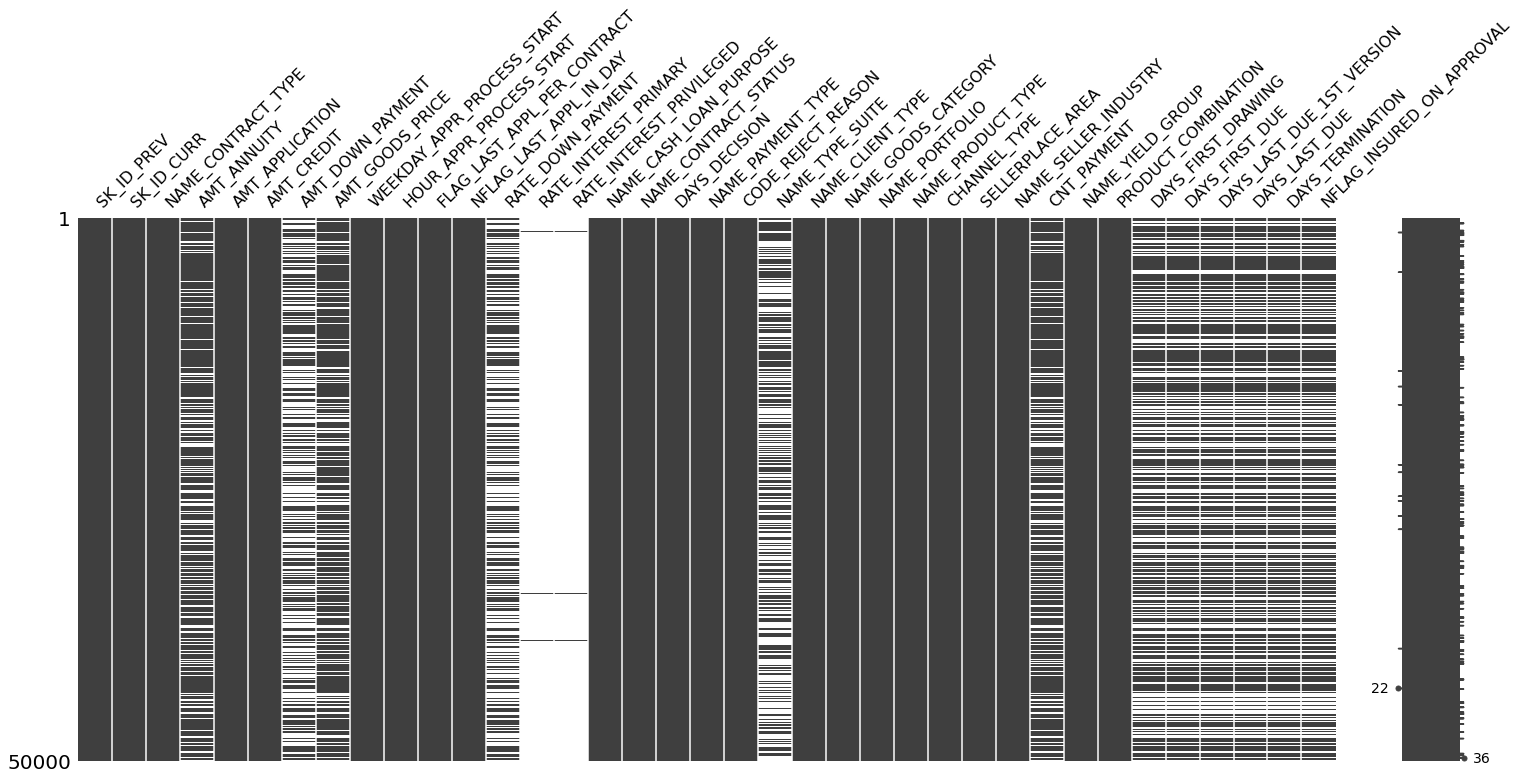

In [21]:
msno.matrix(previous_application1.sample(50000))

In [22]:
# On va aussi supprimer les features qui ont un faible taux de remplissage
previous_application = previous_application1.dropna(thresh=len(previous_application1)*0.75, axis='columns')
print(previous_application.shape)

(1670214, 26)


In [23]:
credit_card_balance1 = import_data(path+'/credit_card_balance.csv')
print("Le jeu de données comporte "+ str(credit_card_balance1.shape[0]) +" enregistrements et "+ str(credit_card_balance1.shape[1]) +" variables.")
credit_card_balance1.head(3)

L utilisation mémoire du dataframe avant optimisation est de 673.88 MB
Après optimisation, l utilisation de la mémoire est de : 263.69 MB
Il y a eu réduction de 60.9%
Le jeu de données comporte 3840312 enregistrements et 23 variables.


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE   AMT_BALANCE  \
0     2562384      378907              -6     56.970001   
1     2582071      363914              -1  63975.554688   
2     1740877      371185              -7  31815.224609   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0              1700.324951               1800.0                     1800.0   
1              2250.000000               2250.0                     2250.0   
2              2250.000000               2250.0                     2250.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                  0.000000       0.000000              0.000000   
1              60175.078125   64875.554688          64875.554688   
2              26926.425781   31460.085938          31460.085938   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0

<AxesSubplot:>

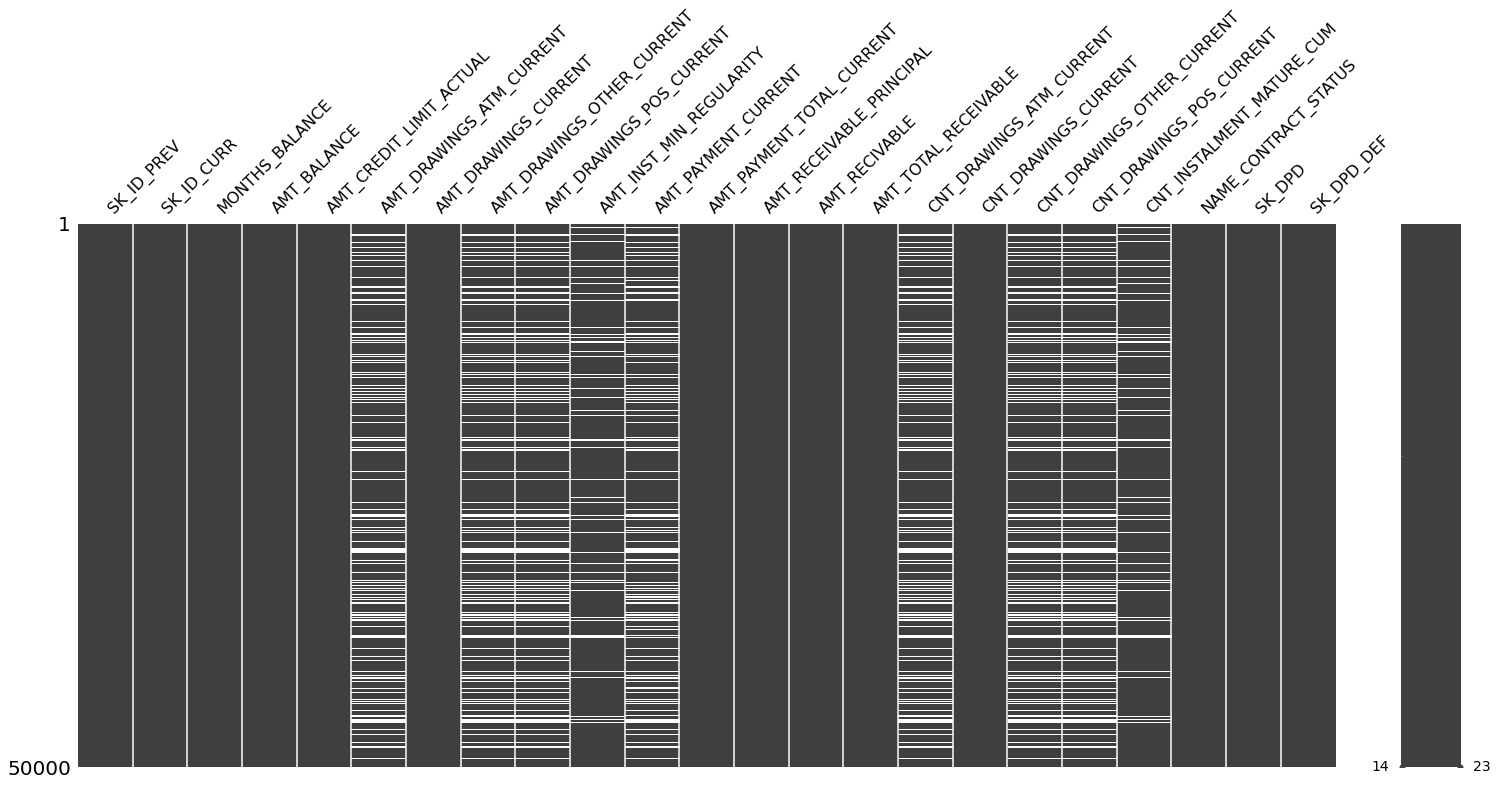

In [24]:
msno.matrix(credit_card_balance1.sample(50000))

In [25]:
# On va aussi supprimer les features qui ont un faible taux de remplissage
credit_card_balance = credit_card_balance1.dropna(thresh=len(credit_card_balance1)*0.75, axis='columns')
print(credit_card_balance.shape)

(3840312, 23)


In [26]:
installments_payments1 = import_data(path + '/installments_payments.csv')
print("Le jeu de données comporte "+ str(installments_payments1.shape[0]) +" enregistrements et "+ str(installments_payments1.shape[1]) +" variables.")
installments_payments1.head(3)

L utilisation mémoire du dataframe avant optimisation est de 830.41 MB
Après optimisation, l utilisation de la mémoire est de : 311.40 MB
Il y a eu réduction de 62.5%
Le jeu de données comporte 13605401 enregistrements et 8 variables.


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT   AMT_PAYMENT  
0          -1180.0             -1187.0     6948.359863   6948.359863  
1          -2156.0             -2156.0     1716.525024   1716.525024  
2            -63.0               -63.0    25425.000000  25425.000000

<AxesSubplot:>

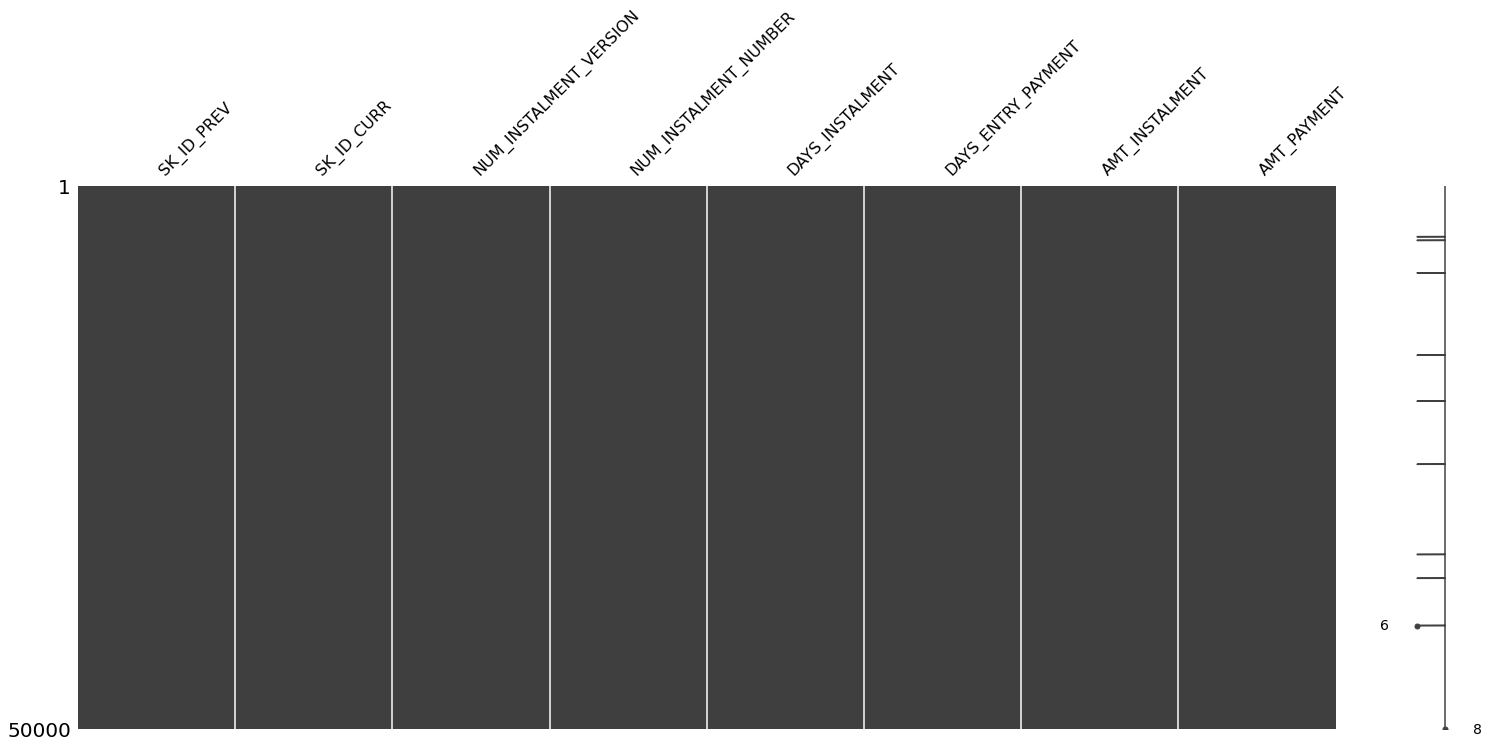

In [27]:
msno.matrix(installments_payments1.sample(50000))

In [28]:
# On va aussi supprimer les features qui ont un faible taux de remplissage
installments_payments = installments_payments1.dropna(thresh=len(installments_payments1)*0.75, axis='columns')
print(installments_payments.shape)

(13605401, 8)


In [29]:
POS_CASH_balance1 = import_data(path+'/POS_CASH_balance.csv')
print("Le jeu de données comporte "+ str(POS_CASH_balance1.shape[0]) +" enregistrements et "+ str(POS_CASH_balance1.shape[1]) +" variables.")
POS_CASH_balance1.head(3)

L utilisation mémoire du dataframe avant optimisation est de 610.43 MB
Après optimisation, l utilisation de la mémoire est de : 171.69 MB
Il y a eu réduction de 71.9%
Le jeu de données comporte 10001358 enregistrements et 8 variables.


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0

<AxesSubplot:>

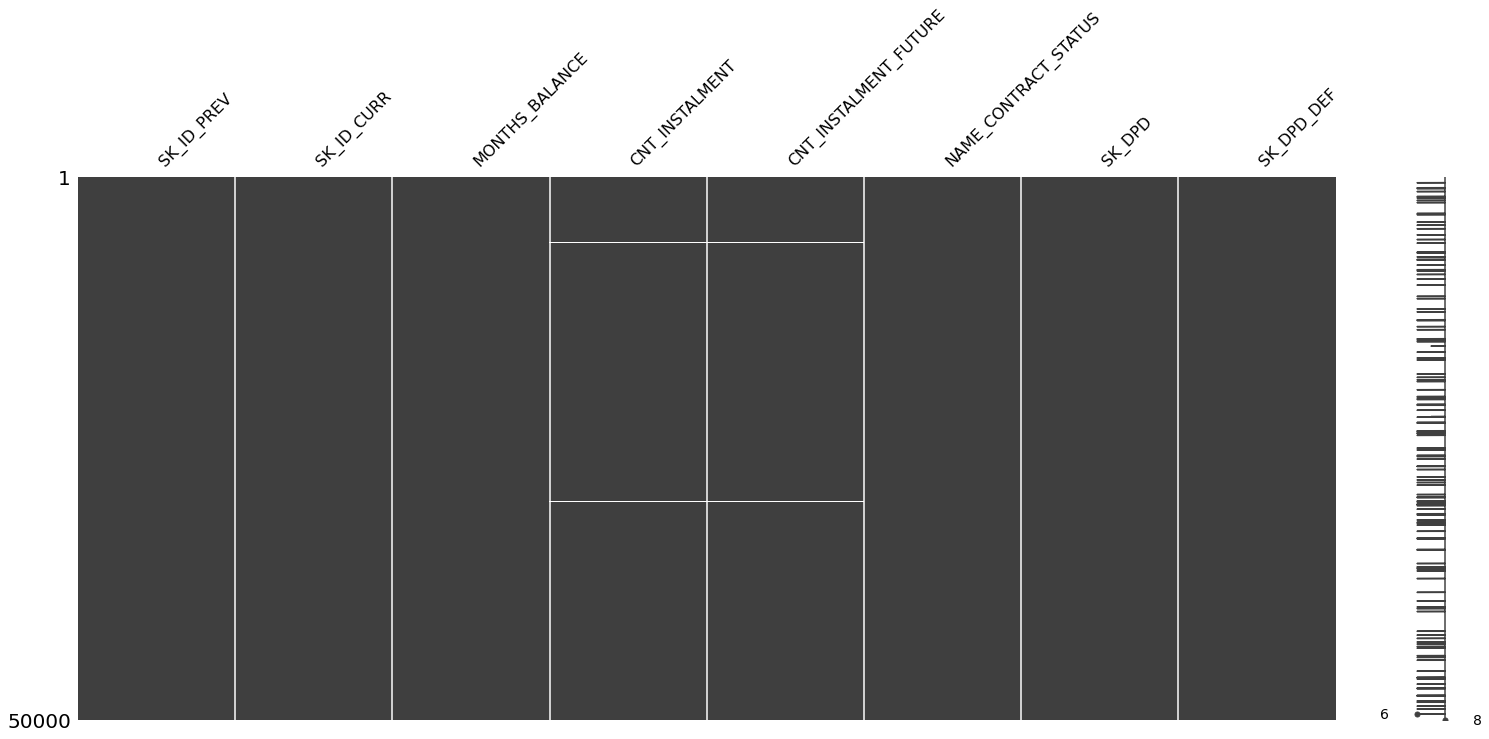

In [30]:
msno.matrix(POS_CASH_balance1.sample(50000))

In [31]:
# On va aussi supprimer les features qui ont un faible taux de remplissage
POS_CASH_balance = POS_CASH_balance1.dropna(thresh=len(POS_CASH_balance1)*0.75, axis='columns')
print(POS_CASH_balance.shape)

(10001358, 8)


In [32]:
HomeCredit_columns_description = pd.read_csv("./Projet+Mise+en+prod+-+home-credit-default-risk/HomeCredit_columns_description.csv", encoding = "ISO-8859-1")
print("Le jeu de données comporte "+ str(HomeCredit_columns_description.shape[0]) +" enregistrements et "+ str(HomeCredit_columns_description.shape[1]) +" variables.")
HomeCredit_columns_description.head(3)

Le jeu de données comporte 219 enregistrements et 5 variables.


Unnamed: 0                         Table                 Row  \
0           1  application_{train|test}.csv          SK_ID_CURR   
1           2  application_{train|test}.csv              TARGET   
2           5  application_{train|test}.csv  NAME_CONTRACT_TYPE   

                                                                                                                                                                                   Description  \
0                                                                                                                                                                     ID of loan in our sample   
1  Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)   
2                                                                                                                                                  Identification if loan is cash or revolving   

  Special  
0     NaN  
1     NaN  
2     NaN

In [33]:
sample_submission = import_data(path+'/sample_submission.csv')
print("Le jeu de données comporte "+ str(sample_submission.shape[0]) +" enregistrements et "+ str(sample_submission.shape[1]) +" variables.")
sample_submission.head(3)

L utilisation mémoire du dataframe avant optimisation est de 0.74 MB
Après optimisation, l utilisation de la mémoire est de : 0.28 MB
Il y a eu réduction de 62.5%
Le jeu de données comporte 48744 enregistrements et 2 variables.


SK_ID_CURR  TARGET
0      100001     0.5
1      100005     0.5
2      100013     0.5

<AxesSubplot:>

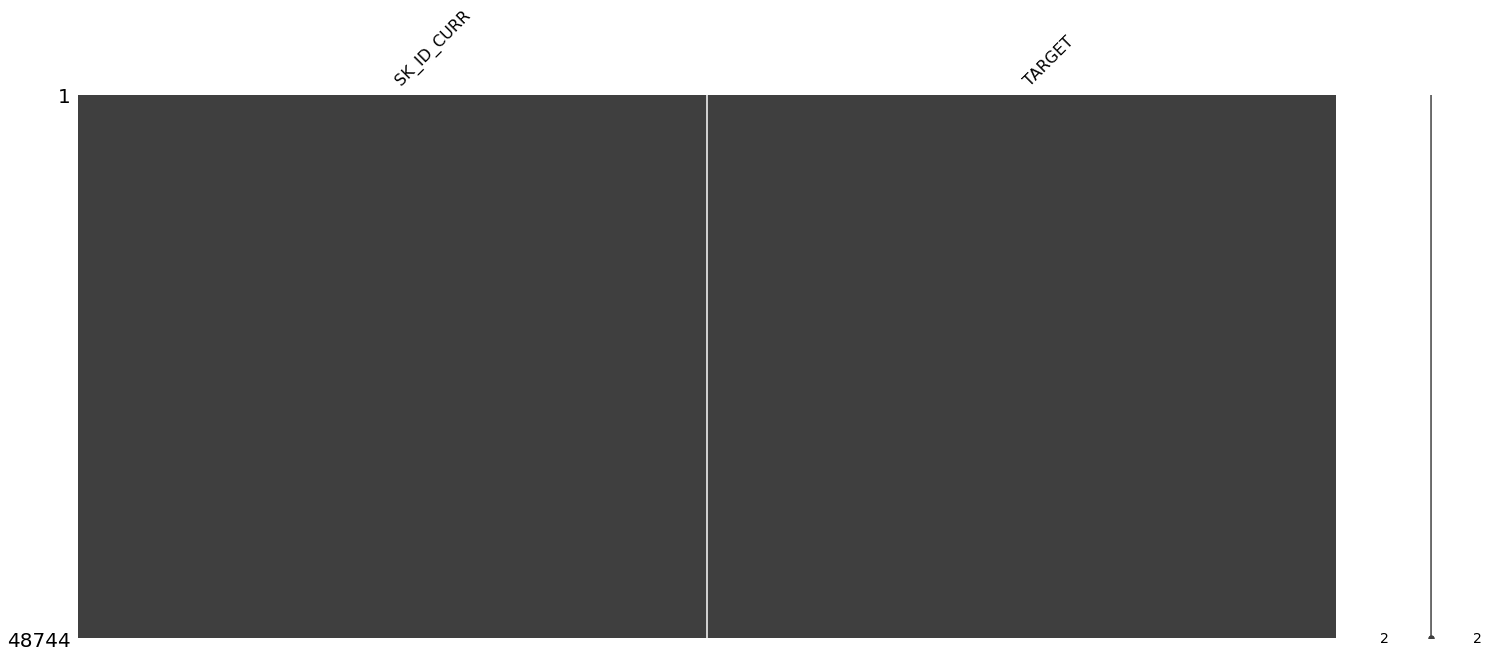

In [34]:
msno.matrix(sample_submission)

# Jointer les datasets

Dans un premier temps, on va préfixer le dataset train, pour savoir de quel jeu de données proviennent les variables si besoin plus tard dans l'analyse

In [35]:
# On préfixe les champs pour pouvoir tracer ensuite leur provenance si besoin
data = train.add_prefix('APP_').rename({'APP_SK_ID_CURR':'SK_ID_CURR','APP_TARGET':'TARGET'},axis='columns')

In [36]:
print(data.shape)
data.head(3)

(307511, 72)


SK_ID_CURR  TARGET APP_NAME_CONTRACT_TYPE APP_CODE_GENDER APP_FLAG_OWN_CAR  \
0      100002       1             Cash loans               M                N   
1      100003       0             Cash loans               F                N   
2      100004       0        Revolving loans               M                Y   

  APP_FLAG_OWN_REALTY  APP_CNT_CHILDREN  APP_AMT_INCOME_TOTAL  APP_AMT_CREDIT  \
0                   Y                 0              202500.0        406597.5   
1                   N                 0              270000.0       1293502.5   
2                   Y                 0               67500.0        135000.0   

   APP_AMT_ANNUITY  APP_AMT_GOODS_PRICE APP_NAME_TYPE_SUITE  \
0          24700.5             351000.0       Unaccompanied   
1          35698.5            1129500.0              Family   
2           6750.0             135000.0       Unaccompanied   

  APP_NAME_INCOME_TYPE        APP_NAME_EDUCATION_TYPE APP_NAME_FAMILY_STATUS  \
0              Working  Secondary / secondary special   Single / not married   
1        State servant               Higher education                Married   
2              Working  Secondary / secondary special   Single / not married   

  APP_NAME_HOUSING_TYPE  APP_REGION_POPULATION_RELATIVE  APP_DAYS_BIRTH  \
0     House / apartment                        0.018799           -9461   
1     House / apartment                        0.003542          -16765   
2     House / apartment                        0.010033          -19046   

   APP_DAYS_EMPLOYED  APP_DAYS_REGISTRATION  APP_DAYS_ID_PUBLISH  \
0               -637                -3648.0                -2120   
1              -1188                -1186.0                 -291   
2               -225                -4260.0                -2531   

   APP_FLAG_MOBIL  APP_FLAG_EMP_PHONE  APP_FLAG_WORK_PHONE  \
0               1                   1                    0   
1               1                   1                    0   
2               1                   1                    1   

   APP_FLAG_CONT_MOBILE  APP_FLAG_PHONE  APP_FLAG_EMAIL  APP_CNT_FAM_MEMBERS  \
0                     1               1               0                  1.0   
1                     1               1               0                  2.0   
2                     1               1               0                  1.0   

   APP_REGION_RATING_CLIENT  APP_REGION_RATING_CLIENT_W_CITY  \
0                         2                                2   
1                         1                                1   
2                         2                                2   

  APP_WEEKDAY_APPR_PROCESS_START  APP_HOUR_APPR_PROCESS_START  \
0                      WEDNESDAY                           10   
1                         MONDAY                           11   
2                         MONDAY                            9   

   APP_REG_REGION_NOT_LIVE_REGION  APP_REG_REGION_NOT_WORK_REGION  \
0                               0                               0   
1                               0                               0   
2                               0                               0   

   APP_LIVE_REGION_NOT_WORK_REGION  APP_REG_CITY_NOT_LIVE_CITY  \
0                                0                           0   
1                                0                           0   
2                                0                           0   

   APP_REG_CITY_NOT_WORK_CITY  APP_LIVE_CITY_NOT_WORK_CITY  \
0                           0                            0   
1                           0                            0   
2                           0                            0   

    APP_ORGANIZATION_TYPE  APP_EXT_SOURCE_2  APP_EXT_SOURCE_3  \
0  Business Entity Type 3          0.262939          0.139404   
1                  School          0.622070               NaN   
2              Government          0.556152          0.729492   

   APP_OBS_30_CNT_SOCIAL_CIRCLE  APP_DEF_30_CNT_SOCIAL_CIRCLE  \


Comme les données du jeu de test n'ont pas de labels, on ne va pas les stacker au jeu de données d'entrainement, car cela ne servirait à rien pour la création de notre modèle.

### Ajouter bureau

Avant de fusionner data avec bureau, on doit fusionner bureau avec les informations dans bureau_balance_file
Mais le problème est le suivant :
- bureau provient de l'authorité du bureau des crédits et donne un enregistrement pour chaque crédit qu'un client de train/test a eu précédemment. On jointe avec SK_ID_CURR.Dans la plupart des cas, bureau a plusieurs enregistrements pour le même client
- bureau_balance est encore plus détaillé. Il contient une ligne pour chaque mois d'historique de chaque précédent crédit enregistré par le bureau des crédis dans le dataframe bureay. Il est lié à bureau par SK_ID_BURREAU


On va donc calculer la moyenne de chaque colonne de ces 2 dataframe. Puis on va inclure ces moyennes comme nouvelles features pour nos clients que l'on essaie de classifier. Par exemple : la moyenne du nombre de jours de retards pour tous les crédits que le client a précédamment souscris.

On va donc :
- Réduire bureau_balance en faisant une moyenne des valeurs regroupées par SK_ID_BUREAU
- Fusionner avce bureau
- Réduire bureau en faisant une moyenne des valeurs regroupées par SK_ID_CURR
- Fusionner avec le dataframe data

<img src="Jointer bureau.png" style="width:100%; max-width:100%"/>

In [37]:
bureau_balance

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0              5715448               0      C
1              5715448              -1      C
2              5715448              -2      C
3              5715448              -3      C
4              5715448              -4      C
...                ...             ...    ...
27299920       5041336             -47      X
27299921       5041336             -48      X
27299922       5041336             -49      X
27299923       5041336             -50      X
27299924       5041336             -51      X

[27299925 rows x 3 columns]

Tous les enregistrements ayant un status C sont ceux qui sont soldés au bureau des crédits. On peut donc créer 2 features qui seraient :
- est ce que le crédit est soldé oui/non
- depuis combien de temps c'est le cas.

In [38]:
bureau_balance_agg = bureau_balance[bureau_balance['STATUS']=='C'].groupby('SK_ID_BUREAU', as_index = False).MONTHS_BALANCE.count().add_prefix('PREV_BUR_MEAN_')
bureau_balance_agg['PREV_BUR_MEAN_CREDIT_CLOSED'] = 1
bureau_balance_agg=bureau_balance_agg.rename({'PREV_BUR_MEAN_MONTHS_BALANCE':'PREV_BUR_MEAN_CLOSED_SINCE_N_MONTHS','PREV_BUR_MEAN_SK_ID_BUREAU':'SK_ID_BUREAU'},axis='columns')

Tous les enregistrements ayant un status avec un chiffre sont ceux qui ont eu des retards de paiement. On peut donc créer 3 features qui seraient :
- est ce que le crédit a eu du retard Y/N
- combien de fois il y a eu défaut
- et quelle est la durée max du défaut.

In [39]:
# On sélectionne tous les mois qui ont du retard
bureau_balance_agg2 = bureau_balance[~bureau_balance['STATUS'].isin(['C','X','0'])]
# On convertit du type objet à int pour pouvoir faire des aggrégations de type min/max
bureau_balance_agg2['STATUS']=bureau_balance_agg2['STATUS'].astype(str).astype(int)
# On regroupe
bureau_balance_agg2

<ipython-input-39-5e67a7975c9d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bureau_balance_agg2['STATUS']=bureau_balance_agg2['STATUS'].astype(str).astype(int)


SK_ID_BUREAU  MONTHS_BALANCE  STATUS
464            5715793             -39       1
465            5715793             -40       1
468            5715793             -43       1
499            5715795             -30       1
500            5715795             -31       1
...                ...             ...     ...
27298834       5011723             -76       1
27298836       5011723             -78       1
27298837       5011723             -79       1
27298840       5011723             -82       1
27298843       5011723             -85       1

[342943 rows x 3 columns]

In [40]:
bureau_balance_agg2=bureau_balance_agg2.groupby('SK_ID_BUREAU', as_index = False).STATUS.agg(['max','count']).reset_index().add_prefix('PREV_BUR_')

In [41]:
bureau_balance_agg2 = bureau_balance_agg2.rename({'PREV_BUR_SK_ID_BUREAU':'SK_ID_BUREAU','PREV_BUR_max':'PREV_BUR_MAX_DELAYED_PAIEMENT_TERMS_INTENSITY','PREV_BUR_count':'PREV_BUR_NB_DELAYED_PAIEMENT_TERMS'},axis='columns')

Enfin, on peut contrôler le pourcentage de mois qui ont été payés dans les temps pour chaque crédit

In [42]:
bureau_balance_agg4 = bureau_balance[~bureau_balance['STATUS'].isin(['C','X'])].groupby('SK_ID_BUREAU', as_index = False).STATUS.count().add_prefix('PREV_BUR_')
bureau_balance_agg4

PREV_BUR_SK_ID_BUREAU  PREV_BUR_STATUS
0                     5001710                5
1                     5001711                3
2                     5001712               10
3                     5001716               27
4                     5001717               17
...                       ...              ...
687022                6842884                9
687023                6842885               24
687024                6842886                8
687025                6842887                6
687026                6842888               10

[687027 rows x 2 columns]

In [43]:
bureau_balance_agg3 = bureau_balance[bureau_balance['STATUS']=='0'].groupby('SK_ID_BUREAU', as_index = False).STATUS.count().add_prefix('PREV_BUR_')
bureau_balance_agg3

PREV_BUR_SK_ID_BUREAU  PREV_BUR_STATUS
0                     5001710                5
1                     5001711                3
2                     5001712               10
3                     5001716               27
4                     5001717               17
...                       ...              ...
685572                6842884                9
685573                6842885               12
685574                6842886                8
685575                6842887                6
685576                6842888                9

[685577 rows x 2 columns]

In [44]:
bureau_balance_agg3 = bureau_balance_agg3.merge(bureau_balance_agg4, left_on='PREV_BUR_SK_ID_BUREAU', right_on='PREV_BUR_SK_ID_BUREAU', suffixes=('_left', '_right'))
bureau_balance_agg3['PREV_BUR_PERCENTAGE_IN_TIME']= bureau_balance_agg3['PREV_BUR_STATUS_left'] / bureau_balance_agg3['PREV_BUR_STATUS_right']
bureau_balance_agg3=bureau_balance_agg3.drop(['PREV_BUR_STATUS_left','PREV_BUR_STATUS_right'],axis=1)
bureau_balance_agg3=bureau_balance_agg3.rename({'PREV_BUR_SK_ID_BUREAU':'SK_ID_BUREAU'},axis='columns')

In [45]:
bureau_balance_agg3

SK_ID_BUREAU  PREV_BUR_PERCENTAGE_IN_TIME
0            5001710                          1.0
1            5001711                          1.0
2            5001712                          1.0
3            5001716                          1.0
4            5001717                          1.0
...              ...                          ...
685572       6842884                          1.0
685573       6842885                          0.5
685574       6842886                          1.0
685575       6842887                          1.0
685576       6842888                          0.9

[685577 rows x 2 columns]

In [46]:
# On va désormais concatener ces 3 dataframes avec nos nouvelles features
step1 = bureau_balance_agg.merge(bureau_balance_agg2, left_on='SK_ID_BUREAU', right_on='SK_ID_BUREAU',how='outer')
step2 = step1.merge(bureau_balance_agg3, left_on='SK_ID_BUREAU', right_on='SK_ID_BUREAU',how='outer')

In [47]:
# On va préfixer les champs de bureau pour s'y retrouver
bureau = bureau.add_prefix('BUR_')
bureau = bureau.rename({'BUR_SK_ID_CURR':'SK_ID_CURR','BUR_SK_ID_BUREAU':'SK_ID_BUREAU'},axis='columns')

In [48]:
# On va aussi concatener avec le dataframe bureau
bureau_agg=bureau.merge(step2, left_on='SK_ID_BUREAU', right_on='SK_ID_BUREAU',how='outer')

In [49]:
bureau_agg

SK_ID_CURR  SK_ID_BUREAU BUR_CREDIT_ACTIVE BUR_CREDIT_CURRENCY  \
0          215354.0       5714462            Closed          currency 1   
1          215354.0       5714463            Active          currency 1   
2          215354.0       5714464            Active          currency 1   
3          215354.0       5714465            Active          currency 1   
4          215354.0       5714466            Active          currency 1   
...             ...           ...               ...                 ...   
1754104         NaN       6841705               NaN                 NaN   
1754105         NaN       6841800               NaN                 NaN   
1754106         NaN       6841866               NaN                 NaN   
1754107         NaN       6841867               NaN                 NaN   
1754108         NaN       6842779               NaN                 NaN   

         BUR_DAYS_CREDIT  BUR_CREDIT_DAY_OVERDUE  BUR_DAYS_CREDIT_ENDDATE  \
0                 -497.0                     0.0                   -153.0   
1                 -208.0                     0.0                   1075.0   
2                 -203.0                     0.0                    528.0   
3                 -203.0                     0.0                      NaN   
4                 -629.0                     0.0                   1197.0   
...                  ...                     ...                      ...   
1754104              NaN                     NaN                      NaN   
1754105              NaN                     NaN                      NaN   
1754106              NaN                     NaN                      NaN   
1754107              NaN                     NaN                      NaN   
1754108              NaN                     NaN                      NaN   

         BUR_CNT_CREDIT_PROLONG  BUR_AMT_CREDIT_SUM  BUR_AMT_CREDIT_SUM_DEBT  \
0                           0.0             91323.0                      0.0   
1                           0.0            225000.0                 171342.0   
2                           0.0            464323.5                      NaN   
3                           0.0             90000.0                      NaN   
4                           0.0           2700000.0                      NaN   
...                         ...                 ...                      ...   
1754104                     NaN                 NaN                      NaN   
1754105                     NaN                 NaN                      NaN   
1754106                     NaN                 NaN                      NaN   
1754107                     NaN                 NaN                      NaN   
1754108                     NaN                 NaN                      NaN   

         BUR_AMT_CREDIT_SUM_OVERDUE  BUR_CREDIT_TYPE  BUR_DAYS_CREDIT_UPDATE  \
0                               0.0  Consumer credit                  -131.0   
1                               0.0      Credit card                   -20.0   
2                               0.0  Consumer credit                   -16.0   
3                               0.0      Credit card                   -16.0   
4                               0.0  Consumer credit                   -21.0   
...                             ...              ...                     ...   
1754104                         NaN              NaN                     NaN   
1754105                         NaN              NaN                     NaN   
1754106                         NaN              NaN                     NaN   
1754107                         NaN              NaN                     NaN   
1754108                         NaN              NaN                     NaN   

         PREV_BUR_MEAN_CLOSED_SINCE_N_MONTHS  PREV_BUR_MEAN_CREDIT_CLOSED  \
0                                        NaN                          NaN   
1                                        NaN                          NaN   
2                             

In [50]:
# On va supprimer les enregistrements n'ayant pas de client ID
bureau_agg.dropna(subset=['SK_ID_CURR'], inplace=True)
bureau_agg.shape

(1716428, 18)

<AxesSubplot:>

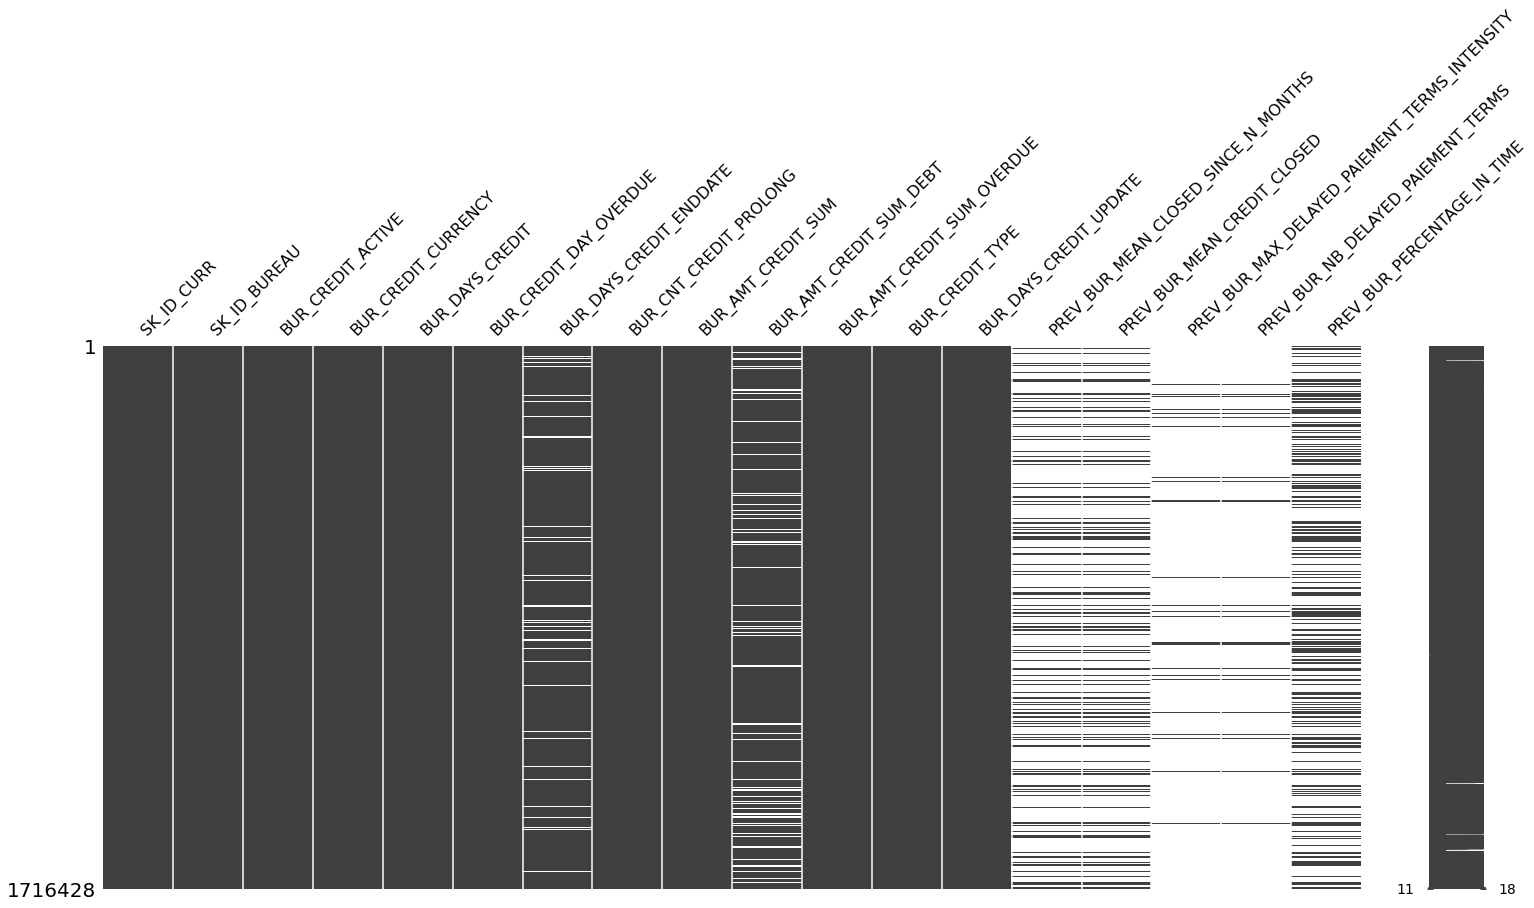

In [51]:
msno.matrix(bureau_agg)

In [52]:
# On va aussi supprimer les features qui ont un faible taux de remplissage
bureau_agg_clean = bureau_agg.dropna(thresh=len(bureau_agg)*0.75, axis='columns')
print(bureau_agg_clean.shape)

(1716428, 13)


In [53]:
# Grouper par client ID et faire les aggrégations par moyenne, max, et min
bureau_agg_final = bureau_agg_clean.drop(columns = ['SK_ID_BUREAU']).groupby('SK_ID_CURR', as_index = False).agg(['mean', 'max', 'min']).reset_index()
bureau_agg_final.head()

SK_ID_CURR BUR_DAYS_CREDIT                BUR_CREDIT_DAY_OVERDUE            \
                        mean    max     min                   mean  max  min   
0   100001.0     -735.000000  -49.0 -1572.0                    0.0  0.0  0.0   
1   100002.0     -874.000000 -103.0 -1437.0                    0.0  0.0  0.0   
2   100003.0    -1400.750000 -606.0 -2586.0                    0.0  0.0  0.0   
3   100004.0     -867.000000 -408.0 -1326.0                    0.0  0.0  0.0   
4   100005.0     -190.666667  -62.0  -373.0                    0.0  0.0  0.0   

  BUR_DAYS_CREDIT_ENDDATE                 BUR_CNT_CREDIT_PROLONG            \
                     mean     max     min                   mean  max  min   
0                 82.4375  1778.0 -1329.0                    0.0  0.0  0.0   
1               -349.0000   780.0 -1072.0                    0.0  0.0  0.0   
2               -544.5000  1216.0 -2434.0                    0.0  0.0  0.0   
3               -488.5000  -382.0  -595.0                    0.0  0.0  0.0   
4                439.2500  1324.0  -128.0                    0.0  0.0  0.0   

  BUR_AMT_CREDIT_SUM                         BUR_AMT_CREDIT_SUM_DEBT  \
                mean            max      min                    mean   
0      207623.578125  378000.000000  85500.0            85240.929688   
1      108131.945312  450000.000000      0.0            49156.199219   
2      254350.125000  810000.000000  22248.0                0.000000   
3       94518.898438   94537.796875  94500.0                0.000000   
4      219042.000000  568800.000000  29826.0           189469.500000   

                 BUR_AMT_CREDIT_SUM_OVERDUE           BUR_DAYS_CREDIT_UPDATE  \
        max  min                       mean  max  min                   mean   
0  373239.0  0.0                        0.0  0.0  0.0             -93.142857   
1  245781.0  0.0                        0.0  0.0  0.0            -499.875000   
2       0.0  0.0                        0.0  0.0  0.0            -816.000000   
3       0.0  0.0                        0.0  0.0  0.0            -532.000000   
4  543087.0  0.0                        0.0  0.0  0.0             -54.333333   

                  
     max     min  
0   -6.0  -155.0  
1   -7.0 -1185.0  
2  -43.0 -2131.0  
3 -382.0  -682.0  
4  -11.0  -121.0

In [54]:
# On change la multi-indexed colonne en quelque chose de plat
bureau_agg_final.columns = ["_".join(x) for x in bureau_agg_final.columns.ravel()]

<ipython-input-54-3e2a05c3587f>:2: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  bureau_agg_final.columns = ["_".join(x) for x in bureau_agg_final.columns.ravel()]


In [55]:
bureau_agg_final = bureau_agg_final.rename({'SK_ID_CURR_':'SK_ID_CURR'},axis='columns')

In [56]:
# On va calculer le nombre de crédits par utilisateurs et ajouter cette nouvelle variable à data
previous_loan_counts = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().add_prefix('BUR_').rename(columns = {'BUR_SK_ID_CURR':'SK_ID_CURR','BUR_SK_ID_BUREAU': 'BUR_PREVIOUS_LOANS_COUNT'})
previous_loan_counts.head()

SK_ID_CURR  BUR_PREVIOUS_LOANS_COUNT
0      100001                         7
1      100002                         8
2      100003                         4
3      100004                         2
4      100005                         3

In [57]:
data = data.merge(previous_loan_counts, on = 'SK_ID_CURR', how = 'left')
# On remplace les valeurs manquantes par 0 
data['BUR_PREVIOUS_LOANS_COUNT'] = data['BUR_PREVIOUS_LOANS_COUNT'].fillna(0)
data.head()

SK_ID_CURR  TARGET APP_NAME_CONTRACT_TYPE APP_CODE_GENDER APP_FLAG_OWN_CAR  \
0      100002       1             Cash loans               M                N   
1      100003       0             Cash loans               F                N   
2      100004       0        Revolving loans               M                Y   
3      100006       0             Cash loans               F                N   
4      100007       0             Cash loans               M                N   

  APP_FLAG_OWN_REALTY  APP_CNT_CHILDREN  APP_AMT_INCOME_TOTAL  APP_AMT_CREDIT  \
0                   Y                 0              202500.0        406597.5   
1                   N                 0              270000.0       1293502.5   
2                   Y                 0               67500.0        135000.0   
3                   Y                 0              135000.0        312682.5   
4                   Y                 0              121500.0        513000.0   

   APP_AMT_ANNUITY  APP_AMT_GOODS_PRICE APP_NAME_TYPE_SUITE  \
0          24700.5             351000.0       Unaccompanied   
1          35698.5            1129500.0              Family   
2           6750.0             135000.0       Unaccompanied   
3          29686.5             297000.0       Unaccompanied   
4          21865.5             513000.0       Unaccompanied   

  APP_NAME_INCOME_TYPE        APP_NAME_EDUCATION_TYPE APP_NAME_FAMILY_STATUS  \
0              Working  Secondary / secondary special   Single / not married   
1        State servant               Higher education                Married   
2              Working  Secondary / secondary special   Single / not married   
3              Working  Secondary / secondary special         Civil marriage   
4              Working  Secondary / secondary special   Single / not married   

  APP_NAME_HOUSING_TYPE  APP_REGION_POPULATION_RELATIVE  APP_DAYS_BIRTH  \
0     House / apartment                        0.018799           -9461   
1     House / apartment                        0.003542          -16765   
2     House / apartment                        0.010033          -19046   
3     House / apartment                        0.008018          -19005   
4     House / apartment                        0.028656          -19932   

   APP_DAYS_EMPLOYED  APP_DAYS_REGISTRATION  APP_DAYS_ID_PUBLISH  \
0               -637                -3648.0                -2120   
1              -1188                -1186.0                 -291   
2               -225                -4260.0                -2531   
3              -3039                -9832.0                -2437   
4              -3038                -4312.0                -3458   

   APP_FLAG_MOBIL  APP_FLAG_EMP_PHONE  APP_FLAG_WORK_PHONE  \
0               1                   1                    0   
1               1                   1                    0   
2               1                   1                    1   
3               1                   1                    0   
4               1                   1                    0   

   APP_FLAG_CONT_MOBILE  APP_FLAG_PHONE  APP_FLAG_EMAIL  APP_CNT_FAM_MEMBERS  \
0                     1               1               0                  1.0   
1                     1               1               0                  2.0   
2                     1               1               0                  1.0   
3                     1               0               0                  2.0   
4                     1               0               0                  1.0   

   APP_REGION_RATING_CLIENT  APP_REGION_RATING_CLIENT_W_CITY  \
0                         2                                2   
1                         1                                1   
2                         2                                2   
3                         2                                2   
4                         2                                2   

  APP_WEEKDAY_APPR_PROCESS_START  APP_HOUR_APPR_PROCESS_START  \
0    

In [58]:
bureau_agg_final

SK_ID_CURR  BUR_DAYS_CREDIT_mean  BUR_DAYS_CREDIT_max  \
0         100001.0           -735.000000                -49.0   
1         100002.0           -874.000000               -103.0   
2         100003.0          -1400.750000               -606.0   
3         100004.0           -867.000000               -408.0   
4         100005.0           -190.666667                -62.0   
...            ...                   ...                  ...   
305806    456249.0          -1667.076923               -483.0   
305807    456250.0           -862.000000               -760.0   
305808    456253.0           -867.500000               -713.0   
305809    456254.0          -1104.000000              -1104.0   
305810    456255.0          -1089.454545               -363.0   

        BUR_DAYS_CREDIT_min  BUR_CREDIT_DAY_OVERDUE_mean  \
0                   -1572.0                          0.0   
1                   -1437.0                          0.0   
2                   -2586.0                          0.0   
3                   -1326.0                          0.0   
4                    -373.0                          0.0   
...                     ...                          ...   
305806              -2713.0                          0.0   
305807              -1002.0                          0.0   
305808               -919.0                          0.0   
305809              -1104.0                          0.0   
305810              -2337.0                          0.0   

        BUR_CREDIT_DAY_OVERDUE_max  BUR_CREDIT_DAY_OVERDUE_min  \
0                              0.0                         0.0   
1                              0.0                         0.0   
2                              0.0                         0.0   
3                              0.0                         0.0   
4                              0.0                         0.0   
...                            ...                         ...   
305806                         0.0                         0.0   
305807                         0.0                         0.0   
305808                         0.0                         0.0   
305809                         0.0                         0.0   
305810                         0.0                         0.0   

        BUR_DAYS_CREDIT_ENDDATE_mean  BUR_DAYS_CREDIT_ENDDATE_max  \
0                            82.4375                       1778.0   
1                          -349.0000                        780.0   
2                          -544.5000                       1216.0   
3                          -488.5000                       -382.0   
4                           439.2500                       1324.0   
...                              ...                          ...   
305806                    -1232.0000                       1363.0   
305807                     1288.0000                       2340.0   
305808                      280.5000                       1113.0   
305809                     -859.0000                       -859.0   
305810                     3232.0000                      27328.0   

        BUR_DAYS_CREDIT_ENDDATE_min  BUR_CNT_CREDIT_PROLONG_mean  \
0                           -1329.0                     0.000000   
1                           -1072.0                     0.000000   
2                           -2434.0                     0.000000   
3                            -595.0                     0.000000   
4                            -128.0                     0.000000   
...                             ...                          ...   
305806                      -2500.0                     0.000000   
305807                       -272.0                     0.000000   
305808                       -189.0                     0.000000   
305809                       -859.0                     0.000000   
305810                      -1243.0                     0.090909   

        BUR_CNT_CREDIT_PROLONG_max  BUR_CNT_CREDIT_PROLONG_min  \
0

In [59]:
# Fusion de data et bureau_agg_final
data = data.merge(bureau_agg_final, on = 'SK_ID_CURR', how = 'left')

In [60]:
data.shape

(307511, 97)

# Ajouter previous_application
Ce dataset donne les applications précédentes d'un client pour un crédit chez Home Credit. Il peut être combiné avec 3 autres datasets :

- POS_CASH_balance - la balance mensuelle des précédents prêts accordés à un même client (une ligne par mois d'historique)
- installments_payments - Les remboursements des précédents crédits (une ligne par paiement)
- credit_card_balance - La balance mensuelle de la carte de crédit de l'utilisateur (une ligne par mois)
Ces 4 datasets sont reliés par SK_ID_PREV

La séquence pour jointer serait la suivante :

- Réduire credit_card_balance en conservant la moyenne groupée par SK_ID_PREV
- Fusionner avec previous application
- Réduire POS_CASH en conservant la moyenne groupée par SK_ID_PREV
- Fusionner avec previous application
- Réduire installments_payement en conservant la moyenne groupée par SK_ID_PREV
- Fusionner avec previous application
- Réduire previous_application en conservant la moyenne par SK_ID_PREV

In [61]:
previous_application

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE   AMT_ANNUITY  \
0           2030495      271877     Consumer loans   1730.430054   
1           2802425      108129         Cash loans  25188.615234   
2           2523466      122040         Cash loans  15060.735352   
3           2819243      176158         Cash loans  47041.335938   
4           1784265      202054         Cash loans  31924.394531   
...             ...         ...                ...           ...   
1670209     2300464      352015     Consumer loans  14704.290039   
1670210     2357031      334635     Consumer loans   6622.020020   
1670211     2659632      249544     Consumer loans  11520.855469   
1670212     2785582      400317         Cash loans  18821.519531   
1670213     2418762      261212         Cash loans  16431.300781   

         AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE  \
0                17145.0     17145.0          17145.0   
1               607500.0    679671.0         607500.0   
2               112500.0    136444.5         112500.0   
3               450000.0    470790.0         450000.0   
4               337500.0    404055.0         337500.0   
...                  ...         ...              ...   
1670209         267295.5    311400.0         267295.5   
1670210          87750.0     64291.5          87750.0   
1670211         105237.0    102523.5         105237.0   
1670212         180000.0    191880.0         180000.0   
1670213         360000.0    360000.0         360000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                         SATURDAY                       15   
1                         THURSDAY                       11   
2                          TUESDAY                       11   
3                           MONDAY                        7   
4                         THURSDAY                        9   
...                            ...                      ...   
1670209                  WEDNESDAY                       12   
1670210                    TUESDAY                       15   
1670211                     MONDAY                       12   
1670212                  WEDNESDAY                        9   
1670213                     SUNDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
0                                 Y                       1   
1                                 Y                       1   
2                                 Y                       1   
3                                 Y                       1   
4                                 Y                       1   
...                             ...                     ...   
1670209                           Y                       1   
1670210                           Y                       1   
1670211                           Y                       1   
1670212                           Y                       1   
1670213                           Y                       1   

        NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
0                          XAP             Approved            -73   
1                          XNA             Approved           -164   
2                          XNA             Approved           -301   
3                          XNA             Approved           -512   
4                      Repairs              Refused           -781   
...                        ...                  ...            ...   
1670209                    XAP             Approved           -544   
1670210                    XAP             Approved          -1694   
1670211                    XAP             Approved          -1488   
1670212                    XNA             Approved          -1185   
1670213                    XNA             Approved          -1193   

             NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0        Cash through the bank                XAP         Repeater   
1           

In [62]:
previous_application = previous_application.add_prefix('PREVIOUS_APPL_')
previous_application = previous_application.rename({'PREVIOUS_APPL_SK_ID_PREV':'SK_ID_PREV','PREVIOUS_APPL_SK_ID_CURR':'SK_ID_CURR'},axis = 'columns')

<img src="Jointer previous application.png" style="width:100%; max-width:100%"/>

In [63]:
credit_card_balance = credit_card_balance.add_prefix('CREDIT_CARD_')
credit_card_balance = credit_card_balance.rename({'CREDIT_CARD_SK_ID_PREV':'SK_ID_PREV','CREDIT_CARD_SK_ID_CURR':'SK_ID_CURR'},axis = 'columns')

In [64]:
credit_card_balance

SK_ID_PREV  SK_ID_CURR  CREDIT_CARD_MONTHS_BALANCE  \
0           2562384      378907                          -6   
1           2582071      363914                          -1   
2           1740877      371185                          -7   
3           1389973      337855                          -4   
4           1891521      126868                          -1   
...             ...         ...                         ...   
3840307     1036507      328243                          -9   
3840308     1714892      347207                          -9   
3840309     1302323      215757                          -9   
3840310     1624872      430337                         -10   
3840311     2411345      236760                         -10   

         CREDIT_CARD_AMT_BALANCE  CREDIT_CARD_AMT_CREDIT_LIMIT_ACTUAL  \
0                      56.970001                               135000   
1                   63975.554688                                45000   
2                   31815.224609                               450000   
3                  236572.109375                               225000   
4                  453919.468750                               450000   
...                          ...                                  ...   
3840307                 0.000000                                45000   
3840308                 0.000000                                45000   
3840309            275784.968750                               585000   
3840310                 0.000000                               450000   
3840311                 0.000000                               157500   

         CREDIT_CARD_AMT_DRAWINGS_ATM_CURRENT  \
0                                         0.0   
1                                      2250.0   
2                                         0.0   
3                                      2250.0   
4                                         0.0   
...                                       ...   
3840307                                   NaN   
3840308                                   0.0   
3840309                              270000.0   
3840310                                   NaN   
3840311                                   0.0   

         CREDIT_CARD_AMT_DRAWINGS_CURRENT  \
0                                   877.5   
1                                  2250.0   
2                                     0.0   
3                                  2250.0   
4                                 11547.0   
...                                   ...   
3840307                               0.0   
3840308                               0.0   
3840309                          270000.0   
3840310                               0.0   
3840311                               0.0   

         CREDIT_CARD_AMT_DRAWINGS_OTHER_CURRENT  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   
...                                         ...   
3840307                                     NaN   
3840308                                     0.0   
3840309                                     0.0   
3840310                                     NaN   
3840311                                     0.0   

         CREDIT_CARD_AMT_DRAWINGS_POS_CURRENT  \
0                                       877.5   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                     11547.0   
...                                       ...   
3840307                                   NaN   
3840308                                   0.0   
3840309                                   0.0   
3840310                                   NaN   
3840311                                   0.0   

         CREDIT_CARD_AMT_INST_MIN_REGULARIT

In [65]:
# Grouper par client ID et faire les aggrégations par moyenne, max, et min
credit_card_balance = credit_card_balance.groupby('SK_ID_PREV', as_index = False).agg(['mean', 'max', 'min']).reset_index()
credit_card_balance.head()

SK_ID_PREV SK_ID_CURR                 CREDIT_CARD_MONTHS_BALANCE          \
                   mean     max     min                       mean max min   
0    1000018   394447.0  394447  394447                       -4.0  -2  -6   
1    1000030   361282.0  361282  361282                       -4.5  -1  -8   
2    1000031   131335.0  131335  131335                       -8.5  -1 -16   
3    1000035   436351.0  436351  436351                       -4.0  -2  -6   
4    1000077   181153.0  181153  181153                       -7.0  -2 -12   

  CREDIT_CARD_AMT_BALANCE                               \
                     mean            max           min   
0             74946.28125  136695.421875  38879.144531   
1             55991.06250  103027.273438      0.000000   
2             52394.43750  154945.937500      0.000000   
3                 0.00000       0.000000      0.000000   
4                 0.00000       0.000000      0.000000   

  CREDIT_CARD_AMT_CREDIT_LIMIT_ACTUAL                  \
                                 mean     max     min   
0                        81000.000000  135000   45000   
1                        81562.500000  135000   45000   
2                       149625.000000  225000   45000   
3                       225000.000000  225000  225000   
4                        94090.909091  135000   45000   

  CREDIT_CARD_AMT_DRAWINGS_ATM_CURRENT                \
                                  mean      max  min   
0                          5400.000000  13500.0  0.0   
1                           642.857117   4500.0  0.0   
2                         12115.384766  90000.0  0.0   
3                                  NaN      NaN  NaN   
4                                  NaN      NaN  NaN   

  CREDIT_CARD_AMT_DRAWINGS_CURRENT                              \
                              mean            max          min   
0                     29478.996094   69156.945312  2032.560059   
1                     17257.437500   46660.500000     0.000000   
2                     28959.615234  155340.000000     0.000000   
3                         0.000000       0.000000     0.000000   
4                         0.000000       0.000000     0.000000   

  CREDIT_CARD_AMT_DRAWINGS_OTHER_CURRENT            \
                                    mean  max  min   
0                                    0.0  0.0  0.0   
1                                    0.0  0.0  0.0   
2                                    0.0  0.0  0.0   
3                                    NaN  NaN  NaN   
4                                    NaN  NaN  NaN   

  CREDIT_CARD_AMT_DRAWINGS_POS_CURRENT                              \
                                  mean            max          min   
0                         24078.996094   55656.945312  2032.560059   
1                         19079.929688   46660.500000  1849.050049   
2                         23527.218750  155340.000000     0.000000   
3                                  NaN            NaN          NaN   
4                                  NaN            NaN          NaN   

  CREDIT_CARD_AMT_INST_MIN_REGULARITY                    \
                                 mean          max  min   
0                         2594.087891  6206.669922  0.0   
1                         2078.223633  5348.520020  0.0   
2                         2675.300537  7780.814941  0.0   
3                            0.000000     0.000000  0.0   
4                            0.000000     0.000000  0.0   

  CREDIT_CARD_AMT_PAYMENT_CURRENT                              \
                             mean            max          min   
0                     5541.750000    9000.000000  3190.635010   
1                     6188.631348   16067.250000  2371.814941   
2                    29543.255859  160606.796875   394.065002   
3                             NaN            NaN          NaN   
4                             NaN            NaN          NaN   

  CREDIT_CARD_AMT_PAYMENT_TOTAL_CURRENT             

In [66]:
# On change la multi-indexed colonne en quelque chose de plat
credit_card_balance.columns = ["_".join(x) for x in credit_card_balance.columns.ravel()]
credit_card_balance=credit_card_balance.rename({'SK_ID_PREV_':'SK_ID_PREV'},axis='columns')

<ipython-input-66-cbac9a045e95>:2: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  credit_card_balance.columns = ["_".join(x) for x in credit_card_balance.columns.ravel()]


In [67]:
credit_card_balance.head()

SK_ID_PREV  SK_ID_CURR_mean  SK_ID_CURR_max  SK_ID_CURR_min  \
0     1000018         394447.0          394447          394447   
1     1000030         361282.0          361282          361282   
2     1000031         131335.0          131335          131335   
3     1000035         436351.0          436351          436351   
4     1000077         181153.0          181153          181153   

   CREDIT_CARD_MONTHS_BALANCE_mean  CREDIT_CARD_MONTHS_BALANCE_max  \
0                             -4.0                              -2   
1                             -4.5                              -1   
2                             -8.5                              -1   
3                             -4.0                              -2   
4                             -7.0                              -2   

   CREDIT_CARD_MONTHS_BALANCE_min  CREDIT_CARD_AMT_BALANCE_mean  \
0                              -6                   74946.28125   
1                              -8                   55991.06250   
2                             -16                   52394.43750   
3                              -6                       0.00000   
4                             -12                       0.00000   

   CREDIT_CARD_AMT_BALANCE_max  CREDIT_CARD_AMT_BALANCE_min  \
0                136695.421875                 38879.144531   
1                103027.273438                     0.000000   
2                154945.937500                     0.000000   
3                     0.000000                     0.000000   
4                     0.000000                     0.000000   

   CREDIT_CARD_AMT_CREDIT_LIMIT_ACTUAL_mean  \
0                              81000.000000   
1                              81562.500000   
2                             149625.000000   
3                             225000.000000   
4                              94090.909091   

   CREDIT_CARD_AMT_CREDIT_LIMIT_ACTUAL_max  \
0                                   135000   
1                                   135000   
2                                   225000   
3                                   225000   
4                                   135000   

   CREDIT_CARD_AMT_CREDIT_LIMIT_ACTUAL_min  \
0                                    45000   
1                                    45000   
2                                    45000   
3                                   225000   
4                                    45000   

   CREDIT_CARD_AMT_DRAWINGS_ATM_CURRENT_mean  \
0                                5400.000000   
1                                 642.857117   
2                               12115.384766   
3                                        NaN   
4                                        NaN   

   CREDIT_CARD_AMT_DRAWINGS_ATM_CURRENT_max  \
0                                   13500.0   
1                                    4500.0   
2                                   90000.0   
3                                       NaN   
4                                       NaN   

   CREDIT_CARD_AMT_DRAWINGS_ATM_CURRENT_min  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       NaN   
4                                       NaN   

   CREDIT_CARD_AMT_DRAWINGS_CURRENT_mean  \
0                           29478.996094   
1                           17257.437500   
2                           28959.615234   
3                               0.000000   
4                               0.000000   

   CREDIT_CARD_AMT_DRAWINGS_CURRENT_max  CREDIT_CARD_AMT_DRAWINGS_CURRENT_min  \
0                          69156.945312                           2032.560059   
1                          46660.500000                              0.000000   
2                         155340.000000                              0.000000   
3                              0.000000                              0.000000   
4                              0.000000  

In [68]:
# Fusionner avec previous_application
previous_application = previous_application.merge(credit_card_balance, on = 'SK_ID_PREV', how = 'left')

In [69]:
# On procède de même avec POS_CASH

POS_CASH_balance = POS_CASH_balance.add_prefix('POS_CASH_')
POS_CASH_balance = POS_CASH_balance.rename({'POS_CASH_SK_ID_PREV':'SK_ID_PREV','POS_CASH_SK_ID_CURR':'SK_ID_CURR'},axis = 'columns')

In [70]:
POS_CASH_balance

SK_ID_PREV  SK_ID_CURR  POS_CASH_MONTHS_BALANCE  \
0            1803195      182943                      -31   
1            1715348      367990                      -33   
2            1784872      397406                      -32   
3            1903291      269225                      -35   
4            2341044      334279                      -35   
...              ...         ...                      ...   
10001353     2448283      226558                      -20   
10001354     1717234      141565                      -19   
10001355     1283126      315695                      -21   
10001356     1082516      450255                      -22   
10001357     1259607      174278                      -52   

          POS_CASH_CNT_INSTALMENT  POS_CASH_CNT_INSTALMENT_FUTURE  \
0                            48.0                            45.0   
1                            36.0                            35.0   
2                            12.0                             9.0   
3                            48.0                            42.0   
4                            36.0                            35.0   
...                           ...                             ...   
10001353                      6.0                             0.0   
10001354                     12.0                             0.0   
10001355                     10.0                             0.0   
10001356                     12.0                             0.0   
10001357                     16.0                             0.0   

         POS_CASH_NAME_CONTRACT_STATUS  POS_CASH_SK_DPD  POS_CASH_SK_DPD_DEF  
0                               Active                0                    0  
1                               Active                0                    0  
2                               Active                0                    0  
3                               Active                0                    0  
4                               Active                0                    0  
...                                ...              ...                  ...  
10001353                        Active              843                    0  
10001354                        Active              602                    0  
10001355                        Active              609                    0  
10001356                        Active              614                    0  
10001357                     Completed                0                    0  

[10001358 rows x 8 columns]

In [71]:
# Grouper par client ID et faire les aggrégations par moyenne, max, et min
POS_CASH_balance = POS_CASH_balance.groupby('SK_ID_PREV', as_index = False).agg(['mean', 'max', 'min']).reset_index()
POS_CASH_balance.head()

SK_ID_PREV SK_ID_CURR                 POS_CASH_MONTHS_BALANCE          \
                   mean     max     min                    mean max min   
0    1000001   158271.0  158271  158271                    -9.0  -8 -10   
1    1000002   101962.0  101962  101962                   -52.0 -50 -54   
2    1000003   252457.0  252457  252457                    -2.5  -1  -4   
3    1000004   260094.0  260094  260094                   -25.5 -22 -29   
4    1000005   176456.0  176456  176456                   -51.0 -46 -56   

  POS_CASH_CNT_INSTALMENT             POS_CASH_CNT_INSTALMENT_FUTURE        \
                     mean   max   min                           mean   max   
0                8.664062  12.0   2.0                       7.667969  12.0   
1                5.199219   6.0   4.0                       2.000000   4.0   
2               12.000000  12.0  12.0                      10.500000  12.0   
3                9.625000  10.0   7.0                       6.125000  10.0   
4               10.000000  10.0  10.0                       5.000000  10.0   

       POS_CASH_SK_DPD         POS_CASH_SK_DPD_DEF          
   min            mean max min                mean max min  
0  0.0             0.0   0   0                 0.0   0   0  
1  0.0             0.0   0   0                 0.0   0   0  
2  9.0             0.0   0   0                 0.0   0   0  
3  0.0             0.0   0   0                 0.0   0   0  
4  0.0             0.0   0   0                 0.0   0   0

In [72]:
# On change la multi-indexed colonne en quelque chose de plat
POS_CASH_balance.columns = ["_".join(x) for x in POS_CASH_balance.columns.ravel()]
POS_CASH_balance=POS_CASH_balance.rename({'SK_ID_PREV_':'SK_ID_PREV'},axis='columns')

<ipython-input-72-257b5d901d83>:2: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  POS_CASH_balance.columns = ["_".join(x) for x in POS_CASH_balance.columns.ravel()]


In [73]:
# Fusionner avec previous_application
previous_application = previous_application.merge(POS_CASH_balance, on = 'SK_ID_PREV', how = 'left')

In [74]:
# On procède de même avec installments_payments

installments_payments = installments_payments.add_prefix('INST_PAY_')
installments_payments = installments_payments.rename({'INST_PAY_SK_ID_PREV':'SK_ID_PREV','INST_PAY_SK_ID_CURR':'SK_ID_CURR'},axis = 'columns')

In [75]:
# Grouper par client ID et faire les aggrégations par compte, moyenne, max, et min
installments_payments = installments_payments.groupby('SK_ID_PREV', as_index = False).agg(['mean', 'max', 'min']).reset_index()
installments_payments.head()

SK_ID_PREV SK_ID_CURR                 INST_PAY_NUM_INSTALMENT_VERSION       \
                   mean     max     min                            mean  max   
0    1000001   158271.0  158271  158271                        1.500000  2.0   
1    1000002   101962.0  101962  101962                        1.250000  2.0   
2    1000003   252457.0  252457  252457                        1.000000  1.0   
3    1000004   260094.0  260094  260094                        1.142578  2.0   
4    1000005   176456.0  176456  176456                        1.000000  1.0   

       INST_PAY_NUM_INSTALMENT_NUMBER         INST_PAY_DAYS_INSTALMENT  \
   min                           mean max min                     mean   
0  1.0                       1.500000   2   1                   -253.0   
1  1.0                       2.500000   4   1                  -1555.0   
2  1.0                       2.000000   3   1                    -64.0   
3  1.0                       4.000000   7   1                   -772.0   
4  1.0                       5.818182  10   1                  -1543.0   

                  INST_PAY_DAYS_ENTRY_PAYMENT                  \
      max     min                        mean     max     min   
0  -238.0  -268.0                   -269.0000  -244.0  -294.0   
1 -1510.0 -1600.0                  -1575.0000 -1554.0 -1611.0   
2   -34.0   -94.0                    -79.3125   -49.0  -108.0   
3  -682.0  -862.0                   -798.5000  -695.0  -881.0   
4 -1418.0 -1688.0                  -1552.0000 -1433.0 -1687.0   

  INST_PAY_AMT_INSTALMENT                             INST_PAY_AMT_PAYMENT  \
                     mean           max           min                 mean   
0            34221.710938  62039.113281   6404.310059         34221.710938   
1             9308.890625  18443.564453   6264.000000          9308.890625   
2             4951.350098   4951.350098   4951.350098          4951.350098   
3             4789.022461  13176.495117   3391.110107          4789.022461   
4            14703.209961  14713.605469  14599.259766         13365.610352   

                              
            max          min  
0  62039.113281  6404.310059  
1  18443.564453  6264.000000  
2   4951.350098  4951.350098  
3  13176.495117  3391.110107  
4  14713.605469     2.790000

In [76]:
# On change la multi-indexed colonne en quelque chose de plat
installments_payments.columns = ["_".join(x) for x in installments_payments.columns.ravel()]
installments_payments=installments_payments.rename({'SK_ID_PREV_':'SK_ID_PREV'},axis='columns')

<ipython-input-76-7671241367b4>:2: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  installments_payments.columns = ["_".join(x) for x in installments_payments.columns.ravel()]


In [77]:
# Fusionner avec previous_application
previous_application = previous_application.merge(installments_payments, on = 'SK_ID_PREV', how = 'left')

In [78]:
previous_application.shape

(1670214, 128)

In [79]:
previous_application

SK_ID_PREV  SK_ID_CURR PREVIOUS_APPL_NAME_CONTRACT_TYPE  \
0           2030495      271877                   Consumer loans   
1           2802425      108129                       Cash loans   
2           2523466      122040                       Cash loans   
3           2819243      176158                       Cash loans   
4           1784265      202054                       Cash loans   
...             ...         ...                              ...   
1670209     2300464      352015                   Consumer loans   
1670210     2357031      334635                   Consumer loans   
1670211     2659632      249544                   Consumer loans   
1670212     2785582      400317                       Cash loans   
1670213     2418762      261212                       Cash loans   

         PREVIOUS_APPL_AMT_ANNUITY  PREVIOUS_APPL_AMT_APPLICATION  \
0                      1730.430054                        17145.0   
1                     25188.615234                       607500.0   
2                     15060.735352                       112500.0   
3                     47041.335938                       450000.0   
4                     31924.394531                       337500.0   
...                            ...                            ...   
1670209               14704.290039                       267295.5   
1670210                6622.020020                        87750.0   
1670211               11520.855469                       105237.0   
1670212               18821.519531                       180000.0   
1670213               16431.300781                       360000.0   

         PREVIOUS_APPL_AMT_CREDIT  PREVIOUS_APPL_AMT_GOODS_PRICE  \
0                         17145.0                        17145.0   
1                        679671.0                       607500.0   
2                        136444.5                       112500.0   
3                        470790.0                       450000.0   
4                        404055.0                       337500.0   
...                           ...                            ...   
1670209                  311400.0                       267295.5   
1670210                   64291.5                        87750.0   
1670211                  102523.5                       105237.0   
1670212                  191880.0                       180000.0   
1670213                  360000.0                       360000.0   

        PREVIOUS_APPL_WEEKDAY_APPR_PROCESS_START  \
0                                       SATURDAY   
1                                       THURSDAY   
2                                        TUESDAY   
3                                         MONDAY   
4                                       THURSDAY   
...                                          ...   
1670209                                WEDNESDAY   
1670210                                  TUESDAY   
1670211                                   MONDAY   
1670212                                WEDNESDAY   
1670213                                   SUNDAY   

         PREVIOUS_APPL_HOUR_APPR_PROCESS_START  \
0                                           15   
1                                           11   
2                                           11   
3                                            7   
4                                            9   
...                                        ...   
1670209                                     12   
1670210                                     15   
1670211                                     12   
1670212                                      9   
1670213                                     10   

        PREVIOUS_APPL_FLAG_LAST_APPL_PER_CONTRACT  \
0                                               Y   
1                                               Y   
2                                               Y   
3                                               Y   
4                                               Y   
..

In [80]:
# On va maintenant réduire ce dataframe au niveau du client pour pouvoir le fusionner avec le dataframe principal.
previous_application = previous_application.groupby('SK_ID_CURR', as_index = False).agg(['mean', 'max', 'min']).reset_index()
previous_application.head()

SK_ID_CURR    SK_ID_PREV                   PREVIOUS_APPL_AMT_ANNUITY  \
                      mean      max      min                      mean   
0     100001  1.369693e+06  1369693  1369693               3951.000000   
1     100002  1.038818e+06  1038818  1038818               9251.775391   
2     100003  2.281150e+06  2636178  1810518              56553.988281   
3     100004  1.564014e+06  1564014  1564014               5357.250000   
4     100005  2.176837e+06  2495675  1857999               4813.200195   

                             PREVIOUS_APPL_AMT_APPLICATION            \
            max          min                          mean       max   
0   3951.000000  3951.000000                      24835.50   24835.5   
1   9251.775391  9251.775391                     179055.00  179055.0   
2  98356.992188  6737.310059                     435436.50  900000.0   
3   5357.250000  5357.250000                      24282.00   24282.0   
4   4813.200195  4813.200195                      22308.75   44617.5   

            PREVIOUS_APPL_AMT_CREDIT                       \
        min                     mean        max       min   
0   24835.5                 23787.00    23787.0   23787.0   
1  179055.0                179055.00   179055.0  179055.0   
2   68809.5                484191.00  1035882.0   68053.5   
3   24282.0                 20106.00    20106.0   20106.0   
4       0.0                 20076.75    40153.5       0.0   

  PREVIOUS_APPL_AMT_GOODS_PRICE                      \
                           mean       max       min   
0                       24835.5   24835.5   24835.5   
1                      179055.0  179055.0  179055.0   
2                      435436.5  900000.0   68809.5   
3                       24282.0   24282.0   24282.0   
4                       44617.5   44617.5   44617.5   

  PREVIOUS_APPL_HOUR_APPR_PROCESS_START          \
                                   mean max min   
0                             13.000000  13  13   
1                              9.000000   9   9   
2                             14.666667  17  12   
3                              5.000000   5   5   
4                             10.500000  11  10   

  PREVIOUS_APPL_NFLAG_LAST_APPL_IN_DAY         PREVIOUS_APPL_DAYS_DECISION  \
                                  mean max min                        mean   
0                                  1.0   1   1                     -1740.0   
1                                  1.0   1   1                      -606.0   
2                                  1.0   1   1                     -1305.0   
3                                  1.0   1   1                      -815.0   
4                                  1.0   1   1                      -536.0   

              PREVIOUS_APPL_SELLERPLACE_AREA             \
    max   min                           mean   max  min   
0 -1740 -1740                           23.0    23   23   
1  -606  -606                          500.0   500  500   
2  -746 -2341                          533.0  1400   -1   
3  -815  -815                           30.0    30   30   
4  -315  -757                           18.0    37   -1   

  PREVIOUS_APPL_CNT_PAYMENT             SK_ID_CURR_mean_x          \
                       mean   max   min              mean max min   
0                       8.0   8.0   8.0               NaN NaN NaN   
1                      24.0  24.0  24.0               NaN NaN NaN   
2                      10.0  12.0   6.0               NaN NaN NaN   
3                       4.0   4.0   4.0               NaN NaN NaN   
4                      12.0  12.0  12.0               NaN NaN NaN   

  SK_ID_CURR_max_x         SK_ID_CURR_min_x          \
              mean max min             mean max min   
0              NaN NaN NaN              NaN NaN NaN   
1              NaN NaN NaN              NaN NaN NaN   
2              NaN NaN NaN              NaN NaN NaN   
3              NaN NaN NaN              NaN NaN NaN   
4              NaN NaN NaN     

In [81]:
# On change la multi-indexed colonne en quelque chose de plat
previous_application.columns = ["_".join(x) for x in previous_application.columns.ravel()]
previous_application=previous_application.rename({'SK_ID_CURR_':'SK_ID_CURR'},axis='columns')

<ipython-input-81-2866167c8906>:2: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  previous_application.columns = ["_".join(x) for x in previous_application.columns.ravel()]


<AxesSubplot:>

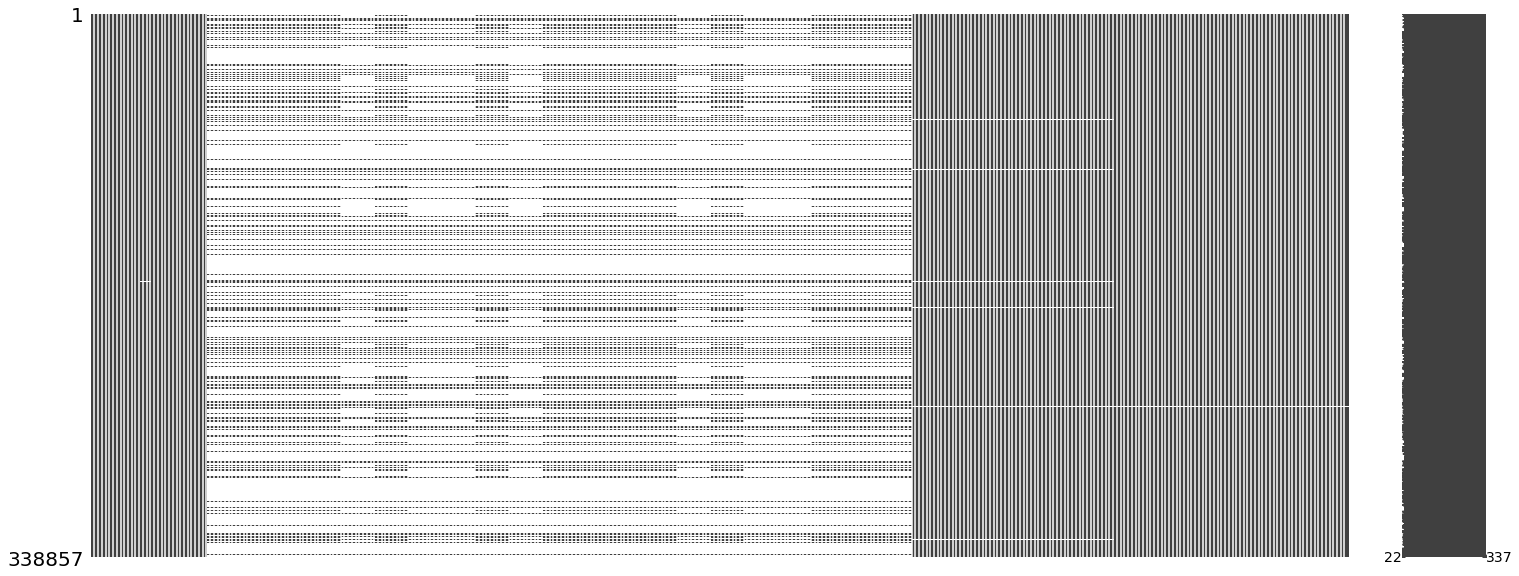

In [82]:
msno.matrix(previous_application)

In [83]:
# On va aussi supprimer les features qui ont un faible taux de remplissage
previous_application_clean = previous_application.dropna(thresh=len(previous_application)*0.75, axis='columns')
print(previous_application_clean.shape)

(338857, 148)


In [84]:
data = data.merge(previous_application_clean, on = 'SK_ID_CURR', how = 'left')

In [85]:
data.shape

(307511, 244)

In [86]:
data.head(3)

SK_ID_CURR  TARGET APP_NAME_CONTRACT_TYPE APP_CODE_GENDER APP_FLAG_OWN_CAR  \
0      100002       1             Cash loans               M                N   
1      100003       0             Cash loans               F                N   
2      100004       0        Revolving loans               M                Y   

  APP_FLAG_OWN_REALTY  APP_CNT_CHILDREN  APP_AMT_INCOME_TOTAL  APP_AMT_CREDIT  \
0                   Y                 0              202500.0        406597.5   
1                   N                 0              270000.0       1293502.5   
2                   Y                 0               67500.0        135000.0   

   APP_AMT_ANNUITY  APP_AMT_GOODS_PRICE APP_NAME_TYPE_SUITE  \
0          24700.5             351000.0       Unaccompanied   
1          35698.5            1129500.0              Family   
2           6750.0             135000.0       Unaccompanied   

  APP_NAME_INCOME_TYPE        APP_NAME_EDUCATION_TYPE APP_NAME_FAMILY_STATUS  \
0              Working  Secondary / secondary special   Single / not married   
1        State servant               Higher education                Married   
2              Working  Secondary / secondary special   Single / not married   

  APP_NAME_HOUSING_TYPE  APP_REGION_POPULATION_RELATIVE  APP_DAYS_BIRTH  \
0     House / apartment                        0.018799           -9461   
1     House / apartment                        0.003542          -16765   
2     House / apartment                        0.010033          -19046   

   APP_DAYS_EMPLOYED  APP_DAYS_REGISTRATION  APP_DAYS_ID_PUBLISH  \
0               -637                -3648.0                -2120   
1              -1188                -1186.0                 -291   
2               -225                -4260.0                -2531   

   APP_FLAG_MOBIL  APP_FLAG_EMP_PHONE  APP_FLAG_WORK_PHONE  \
0               1                   1                    0   
1               1                   1                    0   
2               1                   1                    1   

   APP_FLAG_CONT_MOBILE  APP_FLAG_PHONE  APP_FLAG_EMAIL  APP_CNT_FAM_MEMBERS  \
0                     1               1               0                  1.0   
1                     1               1               0                  2.0   
2                     1               1               0                  1.0   

   APP_REGION_RATING_CLIENT  APP_REGION_RATING_CLIENT_W_CITY  \
0                         2                                2   
1                         1                                1   
2                         2                                2   

  APP_WEEKDAY_APPR_PROCESS_START  APP_HOUR_APPR_PROCESS_START  \
0                      WEDNESDAY                           10   
1                         MONDAY                           11   
2                         MONDAY                            9   

   APP_REG_REGION_NOT_LIVE_REGION  APP_REG_REGION_NOT_WORK_REGION  \
0                               0                               0   
1                               0                               0   
2                               0                               0   

   APP_LIVE_REGION_NOT_WORK_REGION  APP_REG_CITY_NOT_LIVE_CITY  \
0                                0                           0   
1                                0                           0   
2                                0                           0   

   APP_REG_CITY_NOT_WORK_CITY  APP_LIVE_CITY_NOT_WORK_CITY  \
0                           0                            0   
1                           0                            0   
2                           0                            0   

    APP_ORGANIZATION_TYPE  APP_EXT_SOURCE_2  APP_EXT_SOURCE_3  \
0  Business Entity Type 3          0.262939          0.139404   
1                  School          0.622070               NaN   
2              Government          0.556152          0.729492   

   APP_OBS_30_CNT_SOCIAL_CIRCLE  APP_DEF_30_CNT_SOCIAL_CIRCLE  \


In [87]:
print("Nous avons donc réussit à ajouter ", data.shape[1]-train.shape[1], " nouvelles features à notre jeu de données")

Nous avons donc réussit à ajouter  172  nouvelles features à notre jeu de données


# Analyse du dataframe final

In [88]:
# On va duppliquer le dataframe pour la suite de l'analyse
data2 = data.copy()

<Figure size 2160x2160 with 0 Axes>

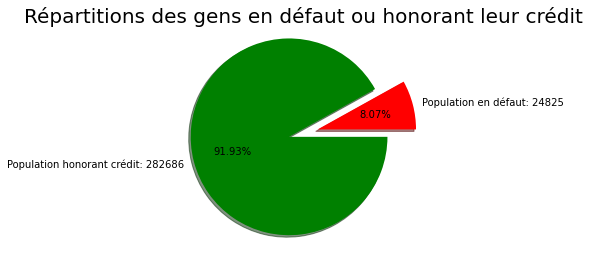

In [89]:
# Analyse de la target

plt.figure(figsize=(30,30))
pie_labels=['Population en défaut: '+str(data['TARGET'][data.TARGET==1].count()),'Population honorant crédit: '+str(data['TARGET'][data.TARGET==0].count())]
pie_share=[data['TARGET'][data.TARGET==1].count()/data['TARGET'].count(),
           data['TARGET'][data.TARGET==0].count()/data['TARGET'].count()]
figureObject, axesObject = plt.subplots()
pie_colors=('red','green')
pie_explode=(.3,.0)
axesObject.pie(pie_share,labels=pie_labels,explode=pie_explode,autopct='%.2f%%',colors=pie_colors,startangle=0,shadow=True)
axesObject.axis('equal')
plt.title('Répartitions des gens en défaut ou honorant leur crédit', fontsize=20)
plt.show()

- Le pourcentage des gens en défaut est de 8.07%. Le dataset n'est donc pas du tout équilibré.
- Un dataset désiquilibré est le scénarion dans lequel le nombre d'observation appartenant à une classe est signigicativement plus bas que les autres classes.
- Cela va avoir un impact très important dans notre approche de machine learning et la sélection des bons algorithmes et fonctions de couts

In [90]:
# Pour comprendre un peu mieux le jeu de données, on peut commencer par regarder sa description
data2.describe()

SK_ID_CURR         TARGET  APP_CNT_CHILDREN  APP_AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000     307511.000000          3.075110e+05   
mean   278180.518577       0.080729          0.417052          1.687391e+05   
std    102790.175348       0.272419          0.722121          2.371759e+05   
min    100002.000000       0.000000          0.000000          2.565000e+04   
25%    189145.500000       0.000000          0.000000          1.125000e+05   
50%    278202.000000       0.000000          0.000000          1.471500e+05   
75%    367142.500000       0.000000          1.000000          2.025000e+05   
max    456255.000000       1.000000         19.000000          1.170000e+08   

       APP_AMT_CREDIT  APP_AMT_ANNUITY  APP_AMT_GOODS_PRICE  \
count    3.075110e+05    307499.000000         3.072330e+05   
mean     5.988308e+05     27110.958984         5.379796e+05   
std      4.024795e+05     14493.233398         3.695427e+05   
min      4.500000e+04      1615.500000         4.050000e+04   
25%      2.700000e+05     16524.000000         2.385000e+05   
50%      5.135310e+05     24903.000000         4.500000e+05   
75%      8.086500e+05     34596.000000         6.795000e+05   
max      4.050000e+06    258025.500000         4.050000e+06   

       APP_REGION_POPULATION_RELATIVE  APP_DAYS_BIRTH  APP_DAYS_EMPLOYED  \
count                   307511.000000   307511.000000      307511.000000   
mean                         0.020859   -16036.995067       63815.045904   
std                          0.013824     4363.988632      141275.766519   
min                          0.000290   -25229.000000      -17912.000000   
25%                          0.010010   -19682.000000       -2760.000000   
50%                          0.018845   -15750.000000       -1213.000000   
75%                          0.028656   -12413.000000        -289.000000   
max                          0.072510    -7489.000000      365243.000000   

       APP_DAYS_REGISTRATION  APP_DAYS_ID_PUBLISH  APP_FLAG_MOBIL  \
count               307511.0        307511.000000   307511.000000   
mean                     NaN         -2994.202373        0.999997   
std                      NaN          1509.450419        0.001803   
min                 -24672.0         -7197.000000        0.000000   
25%                  -7480.0         -4299.000000        1.000000   
50%                  -4504.0         -3254.000000        1.000000   
75%                  -2010.0         -1720.000000        1.000000   
max                      0.0             0.000000        1.000000   

       APP_FLAG_EMP_PHONE  APP_FLAG_WORK_PHONE  APP_FLAG_CONT_MOBILE  \
count       307511.000000        307511.000000         307511.000000   
mean             0.819889             0.199368              0.998133   
std              0.384280             0.399526              0.043164   
min              0.000000             0.000000              0.000000   
25%              1.000000             0.000000              1.000000   
50%              1.000000             0.000000              1.000000   
75%              1.000000             0.000000              1.000000   
max              1.000000             1.000000              1.000000   

       APP_FLAG_PHONE  APP_FLAG_EMAIL  APP_CNT_FAM_MEMBERS  \
count   307511.000000   307511.000000             307509.0   
mean         0.281066        0.056720                  NaN   
std          0.449521        0.231307                  0.0   
min          0.000000        0.000000                  1.0   
25%          0.000000        0.000000                  2.0   
50%          0.000000        0.000000                  2.0   
75%          1.000000        0.000000                  3.0   
max          1.000000        1.000000                 20.0   

       APP_REGION_RATING_CLIENT  APP_REGION_RATING_CLIENT_W_CITY  \
count             307511.000000                    307511.000000   
mean                   2.052463                         2.031521   
std        

On voit que certaines données ont une moyenne négative et nécessitent une attention plus particulière

La variable DAYS_BIRTH a l'air d'être le nombre de jours d'écarts entre la date du jour et la date de naissance de l'utilisateur. On va convertir cela en années pour trouver l'age de l'utilisateur.

In [91]:
data2['AGE']=(data2['APP_DAYS_BIRTH'] / -365)

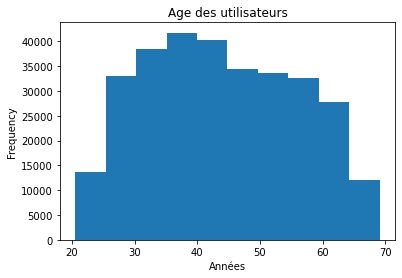

In [92]:
data2['AGE'].plot.hist(title = 'Age des utilisateurs');
plt.xlabel('Années');

Il y a le même problème de valeurs négatives pour le champ DAYS_EMPLOYED

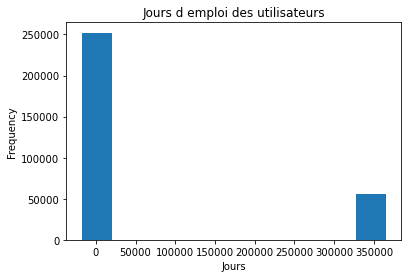

In [93]:
data2['APP_DAYS_EMPLOYED'].plot.hist(title = 'Jours d emploi des utilisateurs');
plt.xlabel('Jours');

Les données sont très étranges, car certains utilisateurs auraient plus de 1000 ans d'emploi! Si on isole les utilisateurs incohérents et que l'on regarde leur taux de defaut par rapport au reste de la population :

In [94]:
anom = data2[data2['APP_DAYS_EMPLOYED'] == 365243]
non_anom = data2[data2['APP_DAYS_EMPLOYED'] != 365243]
print('Les utilisateurs hors anomalies ont un taux de défaut de %0.2f%%' % (100 * non_anom['TARGET'].mean()))
print('Les utilisateurs avec anomalies ont un taux de défaut de %0.2f%% ' % (100 * anom['TARGET'].mean()))
print('Il y a %d avec une anomalie sur la variable days of employment' % len(anom))

Les utilisateurs hors anomalies ont un taux de défaut de 8.66%
Les utilisateurs avec anomalies ont un taux de défaut de 5.40% 
Il y a 55374 avec une anomalie sur la variable days of employment


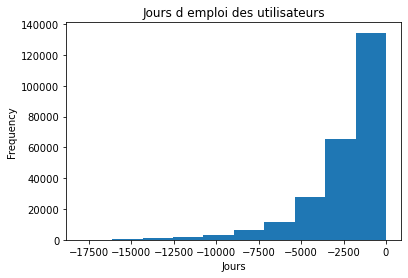

In [95]:
# On créé la nouvelle colonne
data2['APP_DAYS_EMPLOYED_ANOM'] = data2["APP_DAYS_EMPLOYED"] == 365243

# On remplace les valeurs en anomalie par np.nan
data2['APP_DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

data2['APP_DAYS_EMPLOYED'].plot.hist(title = 'Jours d emploi des utilisateurs');
plt.xlabel('Jours');

## Analyse des correlations

Partons de l'hypothèse suivante lorsque l'on calcule le coefficiant de correlation entre 2 variables :

- de 0.00 à 0.19 “très faible”
- de 0.20 à 0.39 “faible”
- de 0.40 à 0.59 “modéré”
- de 0.60 à 0.79 “fort”
- de 0.80 à 1.0 “très fort”

In [96]:
# On va mesurer les correlations des différentes variables avec la target
correlations = data2.corr()['TARGET'].sort_values()

# On va les afficher.
print('Les plus positives correlations sont :\n', correlations.tail(15))
print('\nLes plus négatives correlations sont:\n', correlations.head(15))

Les plus positives correlations sont :
 INST_PAY_DAYS_ENTRY_PAYMENT_mean_min      0.053497
INST_PAY_DAYS_INSTALMENT_min_min          0.053543
INST_PAY_DAYS_ENTRY_PAYMENT_min_min       0.053702
APP_DAYS_LAST_PHONE_CHANGE                0.055219
APP_REGION_RATING_CLIENT                  0.058899
APP_REGION_RATING_CLIENT_W_CITY           0.060893
BUR_DAYS_CREDIT_UPDATE_mean               0.068927
APP_DAYS_EMPLOYED                         0.074958
BUR_DAYS_CREDIT_min                       0.075248
APP_DAYS_BIRTH                            0.078239
BUR_DAYS_CREDIT_mean                      0.089729
TARGET                                    1.000000
POS_CASH_SK_DPD_min_min                        NaN
POS_CASH_SK_DPD_DEF_min_min                    NaN
INST_PAY_NUM_INSTALMENT_NUMBER_min_min         NaN
Name: TARGET, dtype: float64

Les plus négatives correlations sont:
 APP_EXT_SOURCE_3                             -0.178918
APP_EXT_SOURCE_2                             -0.160471
AGE             

In [97]:
HomeCredit_columns_description[HomeCredit_columns_description['Row']=='DAYS_CREDIT']['Description']

126    How many days before current application did client apply for Credit Bureau credit
Name: Description, dtype: object

In [98]:
HomeCredit_columns_description[HomeCredit_columns_description['Row']=='DAYS_BIRTH']['Description']

17    Client's age in days at the time of application
Name: Description, dtype: object

In [99]:
HomeCredit_columns_description[HomeCredit_columns_description['Row']=='DAYS_CREDIT']['Description']

126    How many days before current application did client apply for Credit Bureau credit
Name: Description, dtype: object

In [100]:
HomeCredit_columns_description[HomeCredit_columns_description['Row']=='DAYS_EMPLOYED']['Description']

18    How many days before the application the person started current employment
Name: Description, dtype: object

Les variables qui ont le plus d'influence sur la target sont donc :

- Le temps depuis lequel le client n'a pas souscrit à un credit 
- L'age
- La durée depuis laquelle son emploi actuel est en cours
- La région du client (classée par niveau de vie)

Les variables n'ont par contre que très peu de correlation avec la target

Pour les variables ayant la plus forte correlation avec la target, on va utiliser une estimation par noyau (kernel density estimation plot (KDE)), en colorant la target. Le KDE permet de regarder la distribution d'une seule variable, et est en quelques sortes un histogramme lissé (on utilise un noyau Guassian a chaque point des données, et on moyennise tous les noyaux pour développer la courbe).

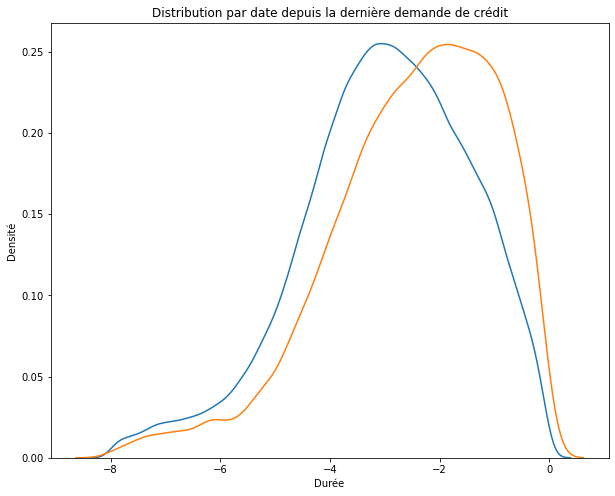

In [101]:
plt.figure(figsize = (10, 8))

# Plot KDE des personnes ayant honnorées leur crédit
sns.kdeplot(data2.loc[data2['TARGET'] == 0, 'BUR_DAYS_CREDIT_mean'] / 365, label = 'target == 0')

# Plot KDE des personnes ayant fait défaut
sns.kdeplot(data2.loc[data2['TARGET'] == 1, 'BUR_DAYS_CREDIT_mean'] / 365, label = 'target == 1')

# Labels
plt.xlabel('Durée'); plt.ylabel('Densité'); plt.title('Distribution par date depuis la dernière demande de crédit');

On voit que la courbe est skew vers les durées les plus récentes lorsque la target est 1. Même si le coefficient de correlatoin est faible (0.089729) la variable est interessante car elle affecte la target. 

Text(0.5, 1.0, 'Distribution par date d ancienneté dans son emploi')

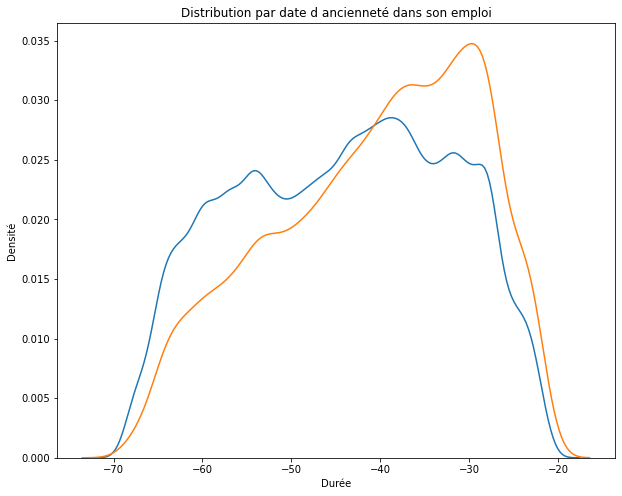

In [102]:
plt.figure(figsize = (10, 8))

# Plot KDE des personnes ayant honnorées leur crédit
sns.kdeplot(data2.loc[data2['TARGET'] == 0, 'APP_DAYS_BIRTH'] / 365, label = 'target == 0')

# Plot KDE des personnes ayant fait défaut
sns.kdeplot(data2.loc[data2['TARGET'] == 1, 'APP_DAYS_BIRTH'] / 365, label = 'target == 1')

# Labels
plt.xlabel('Durée'); plt.ylabel('Densité'); plt.title('Distribution par date d ancienneté dans son emploi')

On voit que la courbe est skew vers les durées les plus récentes (personnes qui ont le moins d ancienneté) lorsque la target est 1. Même si le coefficient de correlatoin est faible (0.089729) la variable est interessante car elle affecte la target. 

Text(0.5, 1.0, 'Distribution par date depuis la denière MAJ du bureau des crédits')

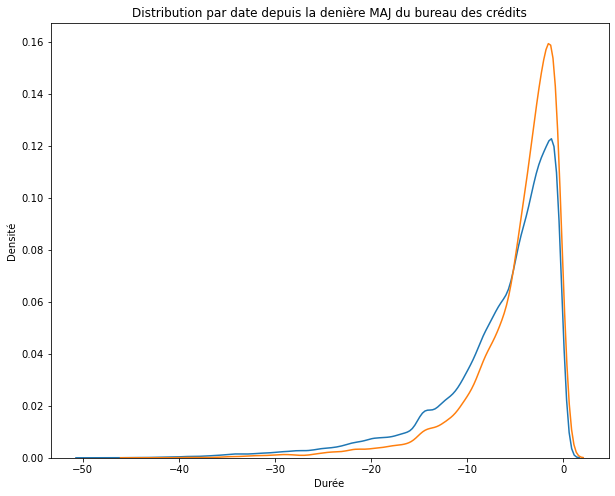

In [103]:
plt.figure(figsize = (10, 8))

# Plot KDE des personnes ayant honnorées leur crédit
sns.kdeplot(data2.loc[data2['TARGET'] == 0, 'APP_DAYS_EMPLOYED'] / 365, label = 'target == 0')

# Plot KDE des personnes ayant fait défaut
sns.kdeplot(data2.loc[data2['TARGET'] == 1, 'APP_DAYS_EMPLOYED'] / 365, label = 'target == 1')

# Labels
plt.xlabel('Durée'); plt.ylabel('Densité'); plt.title('Distribution par date depuis la denière MAJ du bureau des crédits')

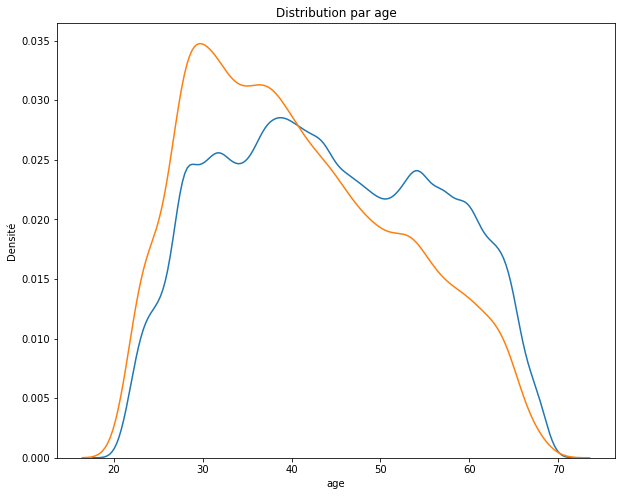

In [104]:
plt.figure(figsize = (10, 8))

# Plot KDE des personnes ayant honnorées leur crédit
sns.kdeplot(abs(data2.loc[data2['TARGET'] == 0, 'APP_DAYS_BIRTH'] / 365), label = 'target == 0')

# Plot KDE des personnes ayant fait défaut
sns.kdeplot(abs(data2.loc[data2['TARGET'] == 1, 'APP_DAYS_BIRTH'] / 365), label = 'target == 1')

# Labels
plt.xlabel('age'); plt.ylabel('Densité'); plt.title('Distribution par age');

On voit que la courbe est skew vers les plus jeunes lorsque la target est 1. Même si le coefficient de correlatoin est faible (-0.07) la variable est interessante car elle affecte la target. On peut essayer de la représenter autrement, sous forme de taux de défaut par tranche d'age

In [105]:
data2.head(3)

SK_ID_CURR  TARGET APP_NAME_CONTRACT_TYPE APP_CODE_GENDER APP_FLAG_OWN_CAR  \
0      100002       1             Cash loans               M                N   
1      100003       0             Cash loans               F                N   
2      100004       0        Revolving loans               M                Y   

  APP_FLAG_OWN_REALTY  APP_CNT_CHILDREN  APP_AMT_INCOME_TOTAL  APP_AMT_CREDIT  \
0                   Y                 0              202500.0        406597.5   
1                   N                 0              270000.0       1293502.5   
2                   Y                 0               67500.0        135000.0   

   APP_AMT_ANNUITY  APP_AMT_GOODS_PRICE APP_NAME_TYPE_SUITE  \
0          24700.5             351000.0       Unaccompanied   
1          35698.5            1129500.0              Family   
2           6750.0             135000.0       Unaccompanied   

  APP_NAME_INCOME_TYPE        APP_NAME_EDUCATION_TYPE APP_NAME_FAMILY_STATUS  \
0              Working  Secondary / secondary special   Single / not married   
1        State servant               Higher education                Married   
2              Working  Secondary / secondary special   Single / not married   

  APP_NAME_HOUSING_TYPE  APP_REGION_POPULATION_RELATIVE  APP_DAYS_BIRTH  \
0     House / apartment                        0.018799           -9461   
1     House / apartment                        0.003542          -16765   
2     House / apartment                        0.010033          -19046   

   APP_DAYS_EMPLOYED  APP_DAYS_REGISTRATION  APP_DAYS_ID_PUBLISH  \
0             -637.0                -3648.0                -2120   
1            -1188.0                -1186.0                 -291   
2             -225.0                -4260.0                -2531   

   APP_FLAG_MOBIL  APP_FLAG_EMP_PHONE  APP_FLAG_WORK_PHONE  \
0               1                   1                    0   
1               1                   1                    0   
2               1                   1                    1   

   APP_FLAG_CONT_MOBILE  APP_FLAG_PHONE  APP_FLAG_EMAIL  APP_CNT_FAM_MEMBERS  \
0                     1               1               0                  1.0   
1                     1               1               0                  2.0   
2                     1               1               0                  1.0   

   APP_REGION_RATING_CLIENT  APP_REGION_RATING_CLIENT_W_CITY  \
0                         2                                2   
1                         1                                1   
2                         2                                2   

  APP_WEEKDAY_APPR_PROCESS_START  APP_HOUR_APPR_PROCESS_START  \
0                      WEDNESDAY                           10   
1                         MONDAY                           11   
2                         MONDAY                            9   

   APP_REG_REGION_NOT_LIVE_REGION  APP_REG_REGION_NOT_WORK_REGION  \
0                               0                               0   
1                               0                               0   
2                               0                               0   

   APP_LIVE_REGION_NOT_WORK_REGION  APP_REG_CITY_NOT_LIVE_CITY  \
0                                0                           0   
1                                0                           0   
2                                0                           0   

   APP_REG_CITY_NOT_WORK_CITY  APP_LIVE_CITY_NOT_WORK_CITY  \
0                           0                            0   
1                           0                            0   
2                           0                            0   

    APP_ORGANIZATION_TYPE  APP_EXT_SOURCE_2  APP_EXT_SOURCE_3  \
0  Business Entity Type 3          0.262939          0.139404   
1                  School          0.622070               NaN   
2              Government          0.556152          0.729492   

   APP_OBS_30_CNT_SOCIAL_CIRCLE  APP_DEF_30_CNT_SOCIAL_CIRCLE  \


In [106]:
# On divise en bins de 5 ans 
age_data = data2[['TARGET', 'AGE']]
age_data['YEARS_BINNED'] = pd.cut(age_data['AGE'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

<ipython-input-106-4d18764db24b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BINNED'] = pd.cut(age_data['AGE'], bins = np.linspace(20, 70, num = 11))


TARGET        AGE  YEARS_BINNED
0       1  25.920548  (25.0, 30.0]
1       0  45.931507  (45.0, 50.0]
2       0  52.180822  (50.0, 55.0]
3       0  52.068493  (50.0, 55.0]
4       0  54.608219  (50.0, 55.0]
5       0  46.413699  (45.0, 50.0]
6       0  37.747945  (35.0, 40.0]
7       0  51.643836  (50.0, 55.0]
8       0  55.065753  (55.0, 60.0]
9       0  39.641096  (35.0, 40.0]

In [107]:
# On regroupe par bins et on calcule la moyenne
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

TARGET        AGE
YEARS_BINNED                     
(20.0, 25.0]  0.123036  23.377522
(25.0, 30.0]  0.111436  27.822518
(30.0, 35.0]  0.102814  32.479037
(35.0, 40.0]  0.089414  37.555913
(40.0, 45.0]  0.078491  42.459346
(45.0, 50.0]  0.074171  47.462741
(50.0, 55.0]  0.066968  52.593136
(55.0, 60.0]  0.055314  57.491131
(60.0, 65.0]  0.052737  62.412459
(65.0, 70.0]  0.037270  66.555108

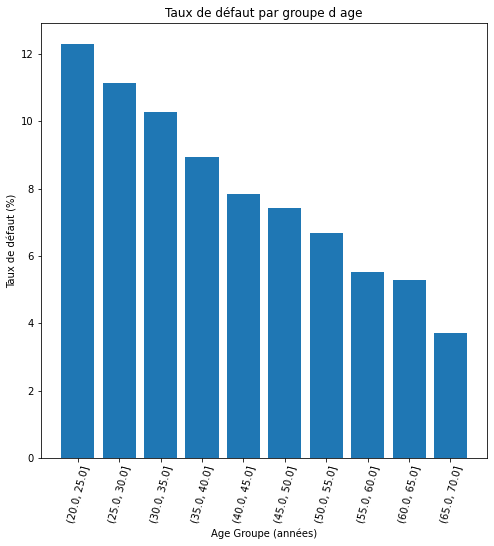

In [108]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Label
plt.xticks(rotation = 75); plt.xlabel('Age Groupe (années)'); plt.ylabel('Taux de défaut (%)')
plt.title('Taux de défaut par groupe d age');

On voit que les plus jeunes ont un taux de défaut supérieur à 10% !

Etudions maintenant les 3 correlations les plus négatives. EXT_SOURCE_1, EXT_SOURCE_2, et EXT_SOURCE_3. La documentation indique "normalized score from external data source", ce qui n'est pas très clair

In [109]:
# ON remontre leur correlation en conservant DAYS BIRTH
ext_data = data2[['TARGET', 'APP_EXT_SOURCE_2', 'APP_EXT_SOURCE_3']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

TARGET  APP_EXT_SOURCE_2  APP_EXT_SOURCE_3
TARGET            1.000000         -0.160471         -0.178918
APP_EXT_SOURCE_2 -0.160471          1.000000          0.109166
APP_EXT_SOURCE_3 -0.178918          0.109166          1.000000

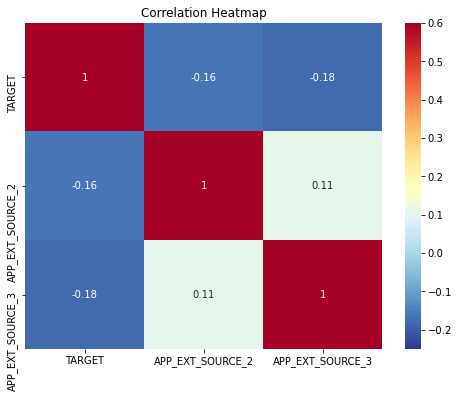

In [110]:
plt.figure(figsize = (8, 6))

# Heatmap
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

Les deux variables on une correlation négative avec la Target. On va les visualiser avec la même méthodologie KDE que précédement

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


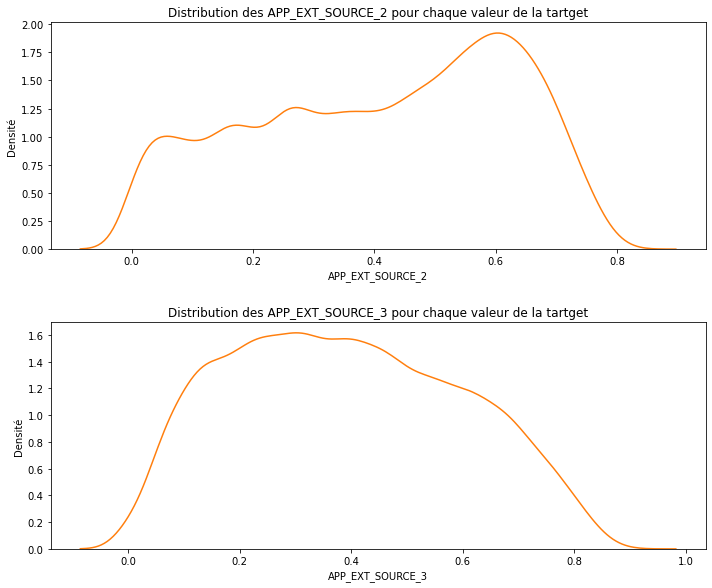

In [111]:
plt.figure(figsize = (10, 12))

# On iterre sur les 3 variables
for i, source in enumerate(['APP_EXT_SOURCE_2', 'APP_EXT_SOURCE_3']):
    
    # On créé un subplot
    plt.subplot(3, 1, i + 1)
    # On affiche les personnes qui n'ont pas fait défaut
    sns.kdeplot(data2.loc[data2['TARGET'] == 0, source], label = 'target == 0')
    # On affiche les personnes qui ont fait défaut
    sns.kdeplot(data2.loc[data2['TARGET'] == 1, source], label = 'target == 1')
    
    # Ajout des labels
    plt.title('Distribution des %s pour chaque valeur de la tartget' % source)
    plt.xlabel('%s' % source); plt.ylabel('Densité');
    
plt.tight_layout(h_pad = 2.5)

Regardons désormais la variable GENDER, puis Family status

<AxesSubplot:title={'center':'Repartition par genre'}, ylabel='APP_CODE_GENDER'>

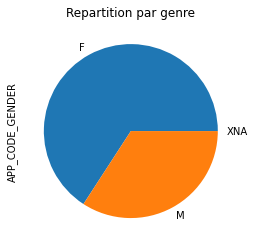

In [112]:
data2['APP_CODE_GENDER'].value_counts().plot.pie(title='Repartition par genre')

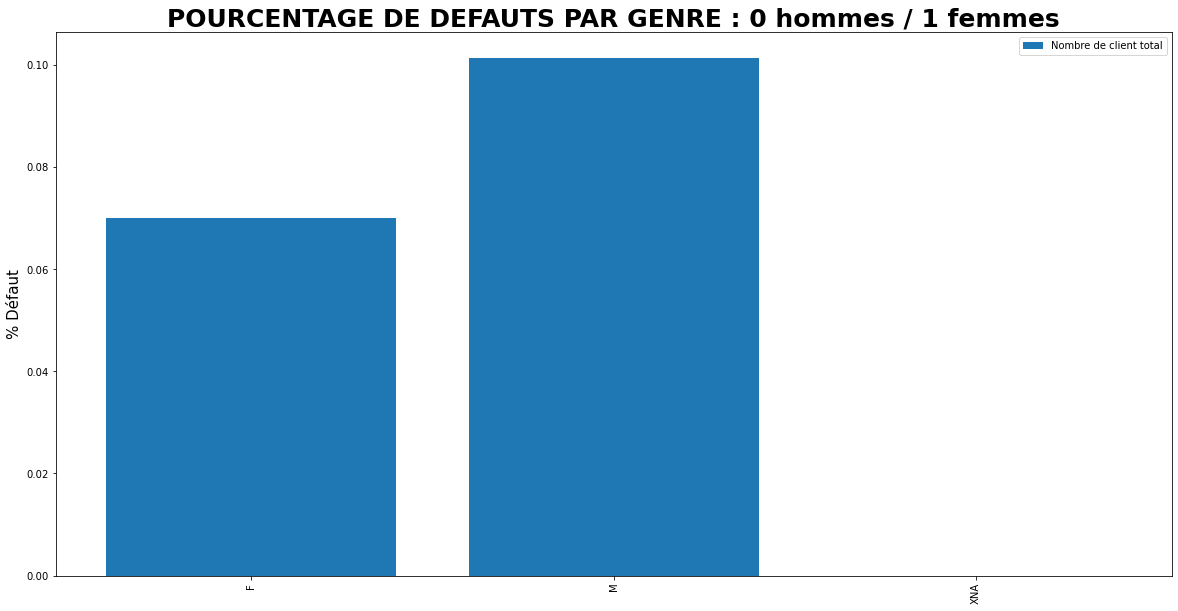

In [113]:
# On va mesurer le taux de remplissage des données de chaque dataset
plt.figure(figsize=(20,10))
plt.title('POURCENTAGE DE DEFAUTS PAR GENRE : 0 hommes / 1 femmes',fontsize=25,fontweight='bold')

plt.bar(data2['APP_CODE_GENDER'].value_counts().index,(data2.loc[data2['TARGET']==1]['APP_CODE_GENDER'].value_counts())/(data2['APP_CODE_GENDER'].value_counts()),label='Nombre de client total')

#L'affichage d'une légende se fait en 2 temps. On lui donne un label dans le plot, puis on rend visible les legendes
plt.legend()


plt.xticks(rotation=90)
plt.ylabel('% Défaut',fontsize=15)

plt.show()

On voit que si les femmes sont bien plus représentées dans le dataset, le taux de défaut des hommes est plus élevé

<AxesSubplot:title={'center':'Repartition par statut familial'}, ylabel='APP_NAME_FAMILY_STATUS'>

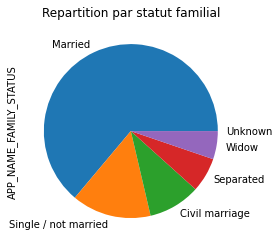

In [114]:
data2['APP_NAME_FAMILY_STATUS'].value_counts().plot.pie(title='Repartition par statut familial')

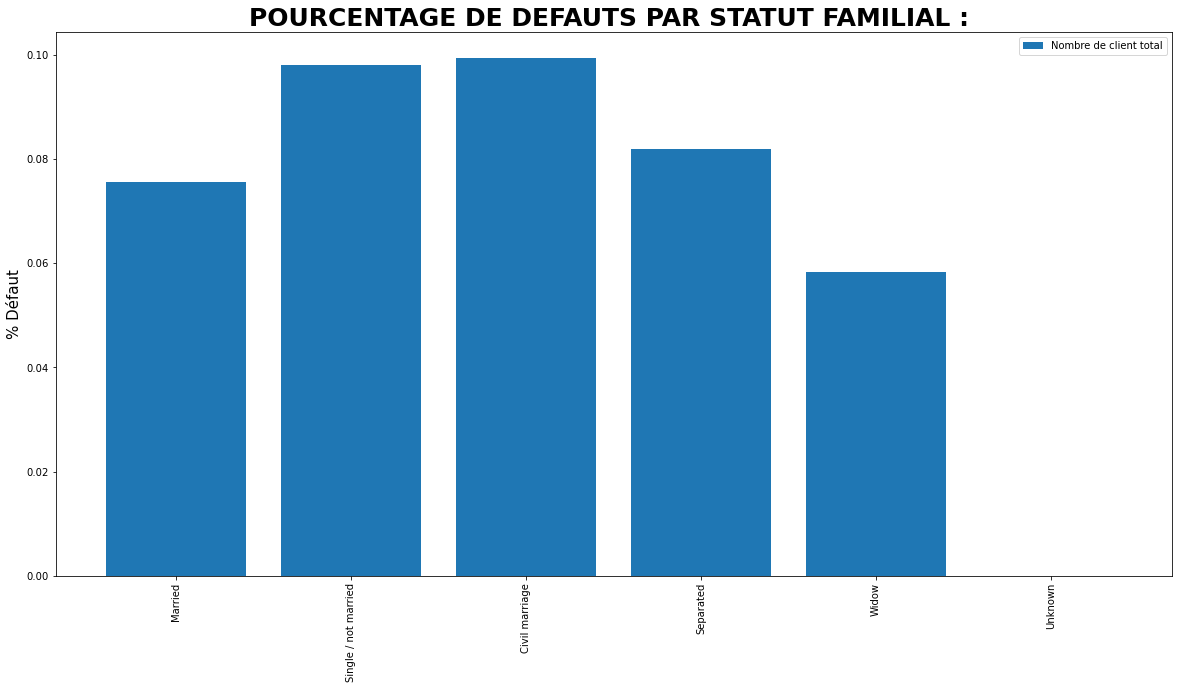

In [115]:
# On va mesurer le taux de remplissage des données de chaque dataset
plt.figure(figsize=(20,10))
plt.title('POURCENTAGE DE DEFAUTS PAR STATUT FAMILIAL : ',fontsize=25,fontweight='bold')

plt.bar(data2['APP_NAME_FAMILY_STATUS'].value_counts().index,(data2.loc[data2['TARGET']==1]['APP_NAME_FAMILY_STATUS'].value_counts())/(data2['APP_NAME_FAMILY_STATUS'].value_counts()),label='Nombre de client total')

#L'affichage d'une légende se fait en 2 temps. On lui donne un label dans le plot, puis on rend visible les legendes
plt.legend()


plt.xticks(rotation=90)
plt.ylabel('% Défaut',fontsize=15)

plt.show()

On voit très clairement que les gens mariés ou veufs font beaucoup moins défaut. Regardons maintenant les gens propriétaires de leur appartement

<AxesSubplot:title={'center':'Repartition par propriétaires immobilier'}, ylabel='APP_FLAG_OWN_REALTY'>

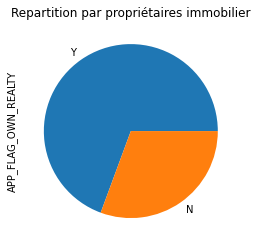

In [116]:
data2['APP_FLAG_OWN_REALTY'].value_counts().plot.pie(title='Repartition par propriétaires immobilier')

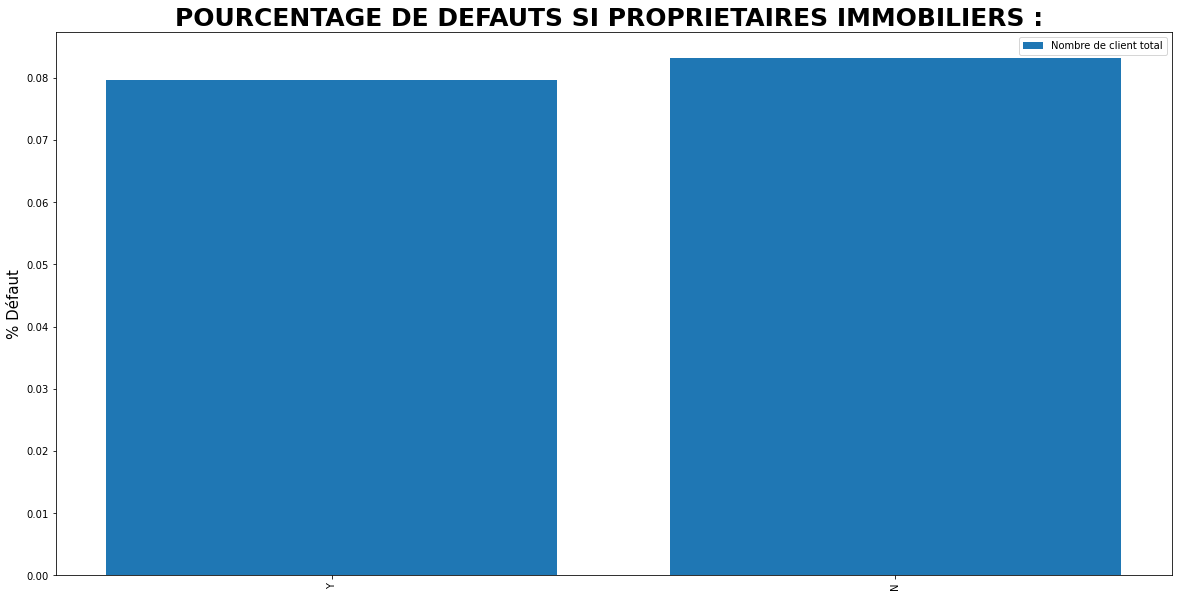

In [117]:
# On va mesurer le taux de remplissage des données de chaque dataset
plt.figure(figsize=(20,10))
plt.title('POURCENTAGE DE DEFAUTS SI PROPRIETAIRES IMMOBILIERS : ',fontsize=25,fontweight='bold')

plt.bar(data2['APP_FLAG_OWN_REALTY'].value_counts().index,(data2.loc[data2['TARGET']==1]['APP_FLAG_OWN_REALTY'].value_counts())/(data2['APP_FLAG_OWN_REALTY'].value_counts()),label='Nombre de client total')

#L'affichage d'une légende se fait en 2 temps. On lui donne un label dans le plot, puis on rend visible les legendes
plt.legend()


plt.xticks(rotation=90)
plt.ylabel('% Défaut',fontsize=15)

plt.show()

Le résultat est sensiblement équivalent

<AxesSubplot:title={'center':'Repartition par propriétaires voiture'}, ylabel='APP_FLAG_OWN_CAR'>

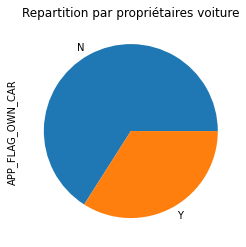

In [118]:
data2['APP_FLAG_OWN_CAR'].value_counts().plot.pie(title='Repartition par propriétaires voiture')

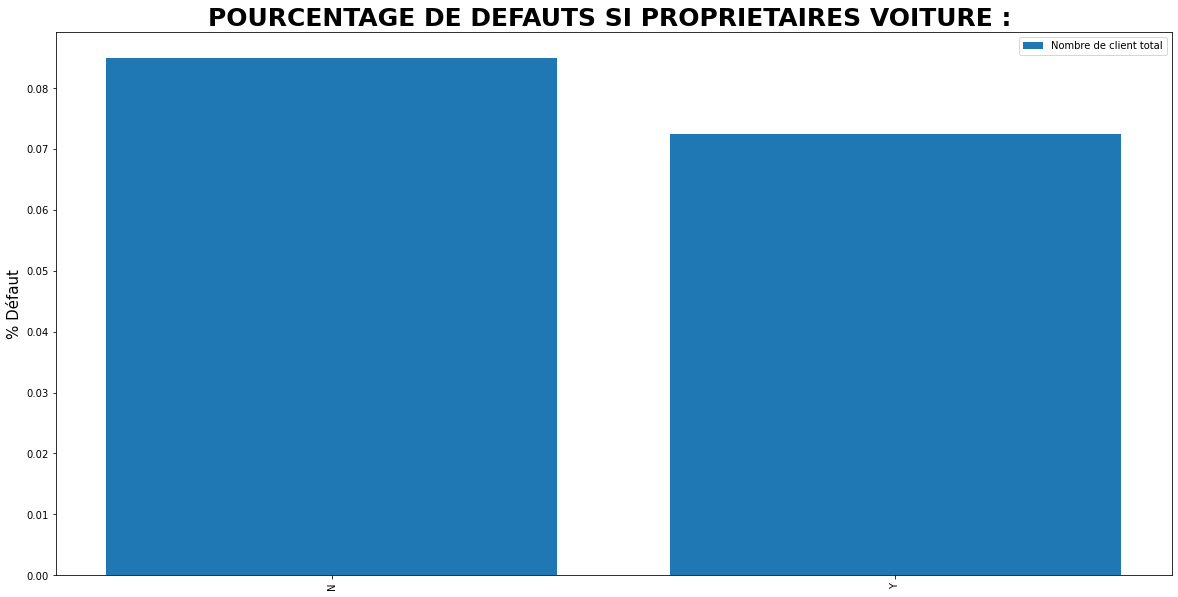

In [119]:
# On va mesurer le taux de remplissage des données de chaque dataset
plt.figure(figsize=(20,10))
plt.title('POURCENTAGE DE DEFAUTS SI PROPRIETAIRES VOITURE : ',fontsize=25,fontweight='bold')

plt.bar(data2['APP_FLAG_OWN_CAR'].value_counts().index,(data2.loc[data2['TARGET']==1]['APP_FLAG_OWN_CAR'].value_counts())/(data2['APP_FLAG_OWN_CAR'].value_counts()),label='Nombre de client total')

#L'affichage d'une légende se fait en 2 temps. On lui donne un label dans le plot, puis on rend visible les legendes
plt.legend()


plt.xticks(rotation=90)
plt.ylabel('% Défaut',fontsize=15)

plt.show()

Il y a donc un écart entre les gens qui possède et ceux qui ne possèdent pas leur véhicule.
Si on fait la même analyse en ce qui concerne le type de revenu :

<AxesSubplot:title={'center':'Repartition par type de revenu'}, ylabel='APP_NAME_INCOME_TYPE'>

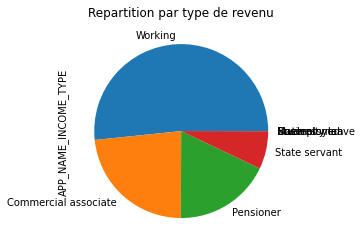

In [120]:
data2['APP_NAME_INCOME_TYPE'].value_counts().plot.pie(title='Repartition par type de revenu')

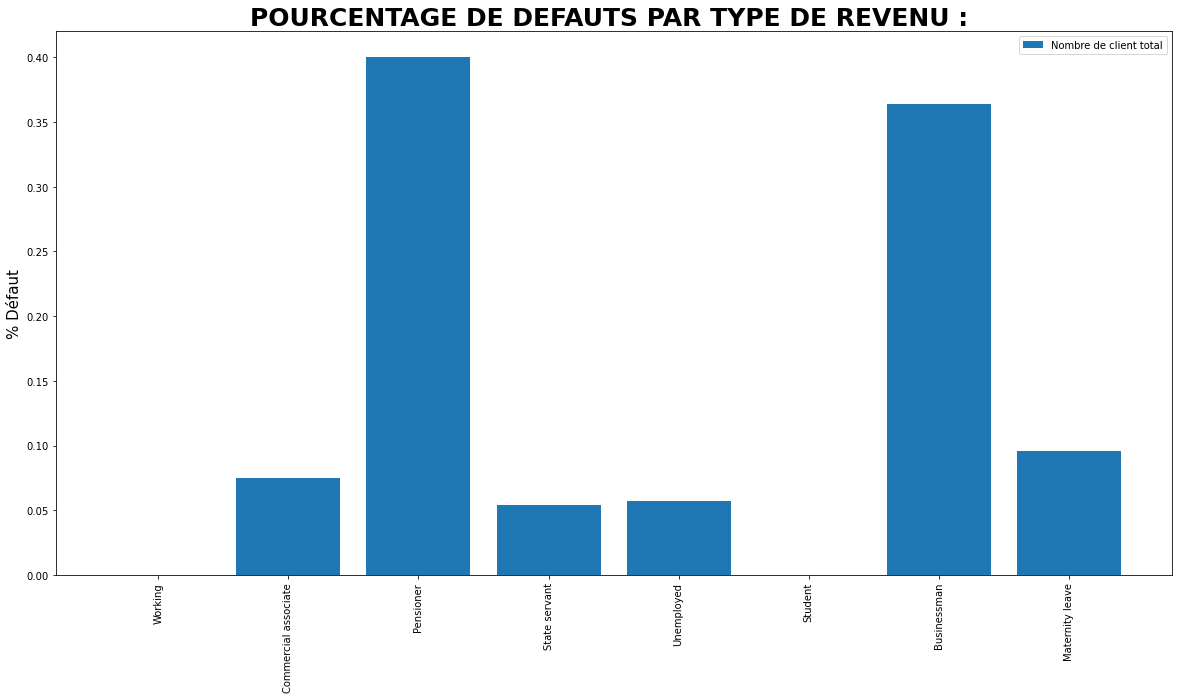

In [121]:
# On va mesurer le taux de remplissage des données de chaque dataset
plt.figure(figsize=(20,10))
plt.title('POURCENTAGE DE DEFAUTS PAR TYPE DE REVENU : ',fontsize=25,fontweight='bold')

plt.bar(data2['APP_NAME_INCOME_TYPE'].value_counts().index,(data2.loc[data2['TARGET']==1]['APP_NAME_INCOME_TYPE'].value_counts())/(data2['APP_NAME_INCOME_TYPE'].value_counts()),label='Nombre de client total')

#L'affichage d'une légende se fait en 2 temps. On lui donne un label dans le plot, puis on rend visible les legendes
plt.legend()


plt.xticks(rotation=90)
plt.ylabel('% Défaut',fontsize=15)

plt.show()

On voit ici que le type de métier joue une rôle important. On voit par exemple que le taux de défaut sur les apprentis ou les gens à leur compte est plus élevé.

# Feature engineering

In [122]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [123]:
from sklearn.metrics import classification_report

In [124]:
# Création d'une fonction qui va permettre de scorer un modèle.

def score_model(model, test_set, test_y):
    preds = model.predict(test_set)
    print('ROC AUC socre :', roc_auc_score(test_y, model.predict_proba(test_set)[:,1]))
    print('Predicted 1s: ', np.sum(preds == 1))
    print('classification report : \n', classification_report(test_y, preds))

In [125]:
# On va créer une copy de notre dataframe pour réaliser notre approche de feature engineering
data3 = data2.copy()

On va chercher à comprendre quelles sont les features les plus importantes de notre jeu de données, en créant un premier modèle très simple.

In [126]:
train_X,test_X,train_y,test_y=train_test_split(data3.drop(['TARGET','SK_ID_CURR'],axis=1),data3['TARGET'])

model =LGBMClassifier(learning_rate=0.05,n_estimators=200,n_jobs=-1,reg_alpha=0.1,min_split_gain=.1,verbose=-1,is_unbalance =True)
model.fit(train_X,train_y)

LGBMClassifier(is_unbalance=True, learning_rate=0.05, min_split_gain=0.1,
               n_estimators=200, reg_alpha=0.1, verbose=-1)

In [127]:
score_model(model,test_X, test_y )

ROC AUC socre : 0.7774394013028136
Predicted 1s:  23828
classification report : 
               precision    recall  f1-score   support

           0       0.96      0.72      0.83     70649
           1       0.18      0.69      0.29      6229

    accuracy                           0.72     76878
   macro avg       0.57      0.71      0.56     76878
weighted avg       0.90      0.72      0.78     76878



In [128]:
np.sum(test_y)

6229

In [129]:
sorted(zip(model.feature_importances_, train_X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,train_X.columns)), columns=['Value','Feature'])

In [130]:
feature_imp

Value                         Feature
0        0  APP_AMT_REQ_CREDIT_BUREAU_HOUR
1        0                APP_CNT_CHILDREN
2        0          APP_DAYS_EMPLOYED_ANOM
3        0            APP_FLAG_CONT_MOBILE
4        0            APP_FLAG_DOCUMENT_10
..     ...                             ...
239    162                 APP_AMT_ANNUITY
240    180                  APP_AMT_CREDIT
241    198                APP_EXT_SOURCE_3
242    210                APP_EXT_SOURCE_2
243   1208           APP_ORGANIZATION_TYPE

[244 rows x 2 columns]

In [131]:
# On va conserver les 10 features les plus importantes
feature_imp[-10:]["Feature"].values

array(['BUR_AMT_CREDIT_SUM_DEBT_mean', 'BUR_DAYS_CREDIT_max',
       'INST_PAY_AMT_PAYMENT_min_mean', 'APP_DAYS_EMPLOYED',
       'APP_AMT_GOODS_PRICE', 'APP_AMT_ANNUITY', 'APP_AMT_CREDIT',
       'APP_EXT_SOURCE_3', 'APP_EXT_SOURCE_2', 'APP_ORGANIZATION_TYPE'],
      dtype=object)

In [132]:
data_feature_engineering_train = train_X[feature_imp[-10:]["Feature"].values]
data_feature_engineering_test = test_X[feature_imp[-10:]["Feature"].values]

In [133]:
data_feature_engineering_train.dtypes

BUR_AMT_CREDIT_SUM_DEBT_mean      float32
BUR_DAYS_CREDIT_max               float64
INST_PAY_AMT_PAYMENT_min_mean     float32
APP_DAYS_EMPLOYED                 float64
APP_AMT_GOODS_PRICE               float32
APP_AMT_ANNUITY                   float32
APP_AMT_CREDIT                    float32
APP_EXT_SOURCE_3                  float16
APP_EXT_SOURCE_2                  float16
APP_ORGANIZATION_TYPE            category
dtype: object

In [134]:
# On va devoir supprimer APP_ORGANIZATION_TYPE car on ne peut pas faire de calculs sur des données catégorielles.
data_feature_engineering_train.drop('APP_ORGANIZATION_TYPE', axis=1, inplace=True)
data_feature_engineering_test.drop('APP_ORGANIZATION_TYPE', axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [135]:
# Création d'un fonction pour automatiser le feature engineering
def feature_engineering(Df):
    Df_test = Df.copy()
    Df_test_columns = Df_test.columns
    
    for i in range(len(Df_test_columns)):
        remaining=len(Df_test_columns)-(i+1)

        for j in range (remaining):
            Df_test[Df_test_columns[i]+ '+' +Df_test_columns[i+j+1]] = Df_test[Df_test_columns[i]]+ Df_test[Df_test_columns[i+j+1]]
            Df_test[Df_test_columns[i]+ '-' +Df_test_columns[i+j+1]] = Df_test[Df_test_columns[i]]- Df_test[Df_test_columns[i+j+1]]
            Df_test[Df_test_columns[i]+ '*' +Df_test_columns[i+j+1]] = Df_test[Df_test_columns[i]]* Df_test[Df_test_columns[i+j+1]]
            Df_test[Df_test_columns[i]+ '/' +Df_test_columns[i+j+1]] = Df_test[Df_test_columns[i]]/ Df_test[Df_test_columns[i+j+1]]
   
    Df_test = Df_test.drop(columns=list(Df_test_columns))
    
    return Df_test

In [136]:
# On teste la fonction sur un très petit jeu de données
Df_test = pd.DataFrame({"One":[1,2,3,4],"Two":[5,6,7,8],"Three":[9,10,11,12],"Four":[13, 14, 15, 16]})
Df_test

One  Two  Three  Four
0    1    5      9    13
1    2    6     10    14
2    3    7     11    15
3    4    8     12    16

In [137]:
feature_engineering(Df_test)

One+Two  One-Two  One*Two   One/Two  One+Three  One-Three  One*Three  \
0        6       -4        5  0.200000         10         -8          9   
1        8       -4       12  0.333333         12         -8         20   
2       10       -4       21  0.428571         14         -8         33   
3       12       -4       32  0.500000         16         -8         48   

   One/Three  One+Four  One-Four  One*Four  One/Four  Two+Three  Two-Three  \
0   0.111111        14       -12        13  0.076923         14         -4   
1   0.200000        16       -12        28  0.142857         16         -4   
2   0.272727        18       -12        45  0.200000         18         -4   
3   0.333333        20       -12        64  0.250000         20         -4   

   Two*Three  Two/Three  Two+Four  Two-Four  Two*Four  Two/Four  Three+Four  \
0         45   0.555556        18        -8        65  0.384615          22   
1         60   0.600000        20        -8        84  0.428571          24   
2         77   0.636364        22        -8       105  0.466667          26   
3         96   0.666667        24        -8       128  0.500000          28   

   Three-Four  Three*Four  Three/Four  
0          -4         117    0.692308  
1          -4         140    0.714286  
2          -4         165    0.733333  
3          -4         192    0.750000

Comme cela fonctionne, on va passer à notre jeu de données de production

In [138]:
print(data_feature_engineering_train.shape)
print(data_feature_engineering_test.shape)

(230633, 9)
(76878, 9)


In [139]:
data_feature_engineering_train = feature_engineering(data_feature_engineering_train)

<ipython-input-135-894b6ecc4c4a>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  Df_test[Df_test_columns[i]+ '-' +Df_test_columns[i+j+1]] = Df_test[Df_test_columns[i]]- Df_test[Df_test_columns[i+j+1]]
<ipython-input-135-894b6ecc4c4a>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  Df_test[Df_test_columns[i]+ '*' +Df_test_columns[i+j+1]] = Df_test[Df_test_columns[i]]* Df_test[Df_test_columns[i+j+1]]
<ipython-input-135-894b6ecc4c4a>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using

In [140]:
data_feature_engineering_train

BUR_AMT_CREDIT_SUM_DEBT_mean+BUR_DAYS_CREDIT_max  \
282919                                               NaN   
180527                                               NaN   
136624                                     569214.000000   
255321                                      86082.093750   
7717                                       223066.000000   
...                                                  ...   
294594                                       7390.099609   
30136                                       -1208.000000   
148363                                      -2407.000000   
229199                                      12167.961914   
49598                                         -88.000000   

        BUR_AMT_CREDIT_SUM_DEBT_mean-BUR_DAYS_CREDIT_max  \
282919                                               NaN   
180527                                               NaN   
136624                                     569286.000000   
255321                                      86330.093750   
7717                                       223424.000000   
...                                                  ...   
294594                                       9294.099609   
30136                                        1208.000000   
148363                                       2407.000000   
229199                                      12201.961914   
49598                                          88.000000   

        BUR_AMT_CREDIT_SUM_DEBT_mean*BUR_DAYS_CREDIT_max  \
282919                                               NaN   
180527                                               NaN   
136624                                     -2.049300e+07   
255321                                     -1.068956e+07   
7717                                       -3.996086e+07   
...                                                  ...   
294594                                     -7.941679e+06   
30136                                      -0.000000e+00   
148363                                     -0.000000e+00   
229199                                     -2.071444e+05   
49598                                      -0.000000e+00   

        BUR_AMT_CREDIT_SUM_DEBT_mean/BUR_DAYS_CREDIT_max  \
282919                                               NaN   
180527                                               NaN   
136624                                     -15812.500000   
255321                                       -695.210433   
7717                                        -1247.178771   
...                                                  ...   
294594                                         -8.762710   
30136                                          -0.000000   
148363                                         -0.000000   
229199                                       -716.762466   
49598                                          -0.000000   

        BUR_AMT_CREDIT_SUM_DEBT_mean+INST_PAY_AMT_PAYMENT_min_mean  \
282919                                                         NaN   
180527                                                         NaN   
136624                                               571160.000000   
255321                                                99035.843750   
7717                                                 226425.187500   
...                                                            ...   
294594                                                15556.649414   
30136                                                 19197.484375   
148363                                                 9942.277344   
229199                                                55312.988281   
49598                                                  3200.737549   

        BUR_AMT_CREDIT_SUM_DEBT_mean-INST_PAY_AMT_PAYMENT_min_mean  \
282919                                                         NaN   
180527                                                         NaN   
136624                                               567340.000000   
255

In [141]:
data_feature_engineering_test = feature_engineering(data_feature_engineering_test)

<ipython-input-135-894b6ecc4c4a>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  Df_test[Df_test_columns[i]+ '-' +Df_test_columns[i+j+1]] = Df_test[Df_test_columns[i]]- Df_test[Df_test_columns[i+j+1]]
<ipython-input-135-894b6ecc4c4a>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  Df_test[Df_test_columns[i]+ '*' +Df_test_columns[i+j+1]] = Df_test[Df_test_columns[i]]* Df_test[Df_test_columns[i+j+1]]
<ipython-input-135-894b6ecc4c4a>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using

In [142]:
print(data_feature_engineering_train.shape)
print(data_feature_engineering_test.shape)

(230633, 144)
(76878, 144)


on a donc créé 134 nouvelles variables par des combinaisons des variables les plus utiles dans le modèle

In [143]:
# On stack les données avec le dataframe initial
train_X_concat = pd.concat([train_X,data_feature_engineering_train],axis=1)
test_X_concat = pd.concat([test_X,data_feature_engineering_test],axis=1)

print(train_X_concat.shape)
print(test_X_concat.shape)

print(train_y.shape)
print(test_y.shape)

(230633, 388)
(76878, 388)
(230633,)
(76878,)


# Features selection

## Analyse des features catégorielles

In [144]:
cat_train = train_X_concat.select_dtypes(exclude=["number","bool_"])
cat_train.shape

cat_test = test_X_concat.select_dtypes(exclude=["number","bool_"])
cat_test.shape

(76878, 11)

On a donc 11 features catégorielles. On va choisir pour la suite du modèle de ne pas les one hot encoder, car le modèle LGMB fonctionne parfaitement bien sans le faire à partir du moment où elles sont bien déclarées comme des variables catégorielles.

Modèle baseline sans sélection avec le CHI²

In [145]:
# On va les enregistrer dans une variable
var_cat_to_keep = cat_train.columns

In [146]:
cat_train

APP_NAME_CONTRACT_TYPE APP_CODE_GENDER APP_FLAG_OWN_CAR  \
282919             Cash loans               M                Y   
180527             Cash loans               M                Y   
136624             Cash loans               F                Y   
255321        Revolving loans               F                Y   
7717               Cash loans               F                N   
...                       ...             ...              ...   
294594             Cash loans               F                N   
30136              Cash loans               M                Y   
148363             Cash loans               M                N   
229199             Cash loans               F                N   
49598              Cash loans               F                N   

       APP_FLAG_OWN_REALTY APP_NAME_TYPE_SUITE  APP_NAME_INCOME_TYPE  \
282919                   Y       Unaccompanied               Working   
180527                   Y       Unaccompanied  Commercial associate   
136624                   Y       Unaccompanied               Working   
255321                   Y       Unaccompanied  Commercial associate   
7717                     N       Unaccompanied               Working   
...                    ...                 ...                   ...   
294594                   N       Unaccompanied               Working   
30136                    Y       Unaccompanied  Commercial associate   
148363                   Y       Unaccompanied  Commercial associate   
229199                   Y       Unaccompanied  Commercial associate   
49598                    Y       Unaccompanied         State servant   

              APP_NAME_EDUCATION_TYPE APP_NAME_FAMILY_STATUS  \
282919  Secondary / secondary special                Married   
180527  Secondary / secondary special                Married   
136624              Incomplete higher                Married   
255321               Higher education         Civil marriage   
7717    Secondary / secondary special                Married   
...                               ...                    ...   
294594               Higher education                Married   
30136   Secondary / secondary special                Married   
148363  Secondary / secondary special                Married   
229199  Secondary / secondary special              Separated   
49598                Higher education                Married   

       APP_NAME_HOUSING_TYPE APP_WEEKDAY_APPR_PROCESS_START  \
282919     House / apartment                      WEDNESDAY   
180527          With parents                         MONDAY   
136624     House / apartment                       THURSDAY   
255321     House / apartment                      WEDNESDAY   
7717     Municipal apartment                        TUESDAY   
...                      ...                            ...   
294594          With parents                         SUNDAY   
30136      House / apartment                         MONDAY   
148363     House / apartment                        TUESDAY   
229199     House / apartment                        TUESDAY   
49598      House / apartment                         FRIDAY   

         APP_ORGANIZATION_TYPE  
282919           Self-employed  
180527  Business Entity Type 3  
136624  Business Entity Type 3  
255321  Business Entity Type 3  
7717         Transport: type 2  
...                        ...  
294594           Self-employed  
30136               Government  
148363  Business Entity Type 3  
229199  Business Entity Type 1  
49598               Government  

[230633 rows x 11 columns]

On va faire un label encoding des variables pour pouvoir les utiliser dans un algorithme de machine learning.

In [147]:
encoded_cat_train=pd.DataFrame({col: cat_train[col].astype('category').cat.codes for col in cat_train}, index=cat_train.index)

In [148]:
encoded_cat_test=pd.DataFrame({col: cat_test[col].astype('category').cat.codes for col in cat_test}, index=cat_test.index)

On instancie notre modèle baseline

In [149]:
model =LGBMClassifier(learning_rate=0.05,n_estimators=200,n_jobs=-1,reg_alpha=0.1,min_split_gain=.1,verbose=-1,is_unbalance =True)

model.fit(encoded_cat_train,train_y)

LGBMClassifier(is_unbalance=True, learning_rate=0.05, min_split_gain=0.1,
               n_estimators=200, reg_alpha=0.1, verbose=-1)

In [150]:
score_model(model,encoded_cat_test, test_y )

ROC AUC socre : 0.6261505564100976
Predicted 1s:  33117
classification report : 
               precision    recall  f1-score   support

           0       0.94      0.58      0.72     70649
           1       0.11      0.60      0.19      6229

    accuracy                           0.59     76878
   macro avg       0.53      0.59      0.46     76878
weighted avg       0.88      0.59      0.68     76878



In [151]:
sorted(zip(model.feature_importances_, encoded_cat_train.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,encoded_cat_train.columns)), columns=['Value','Feature'])

In [152]:
feature_imp

Value                         Feature
0     182             APP_FLAG_OWN_REALTY
1     242          APP_NAME_CONTRACT_TYPE
2     276                 APP_CODE_GENDER
3     285                APP_FLAG_OWN_CAR
4     352            APP_NAME_INCOME_TYPE
5     437         APP_NAME_EDUCATION_TYPE
6     497           APP_NAME_HOUSING_TYPE
7     529             APP_NAME_TYPE_SUITE
8     757          APP_NAME_FAMILY_STATUS
9     913  APP_WEEKDAY_APPR_PROCESS_START
10   1530           APP_ORGANIZATION_TYPE

Sélection des features avec Chi² :

- Chi² examine le degré d'indépendance entre 2 vecteurs de variables catégorielles
- Chi² score est calculé pour les variables par rapport à la target
- On le calcule pour toutes les features et on le visualise.

In [153]:
chi2_selector=SelectKBest(chi2,k=encoded_cat_train.shape[1])


In [154]:
# On supprime les valeurs négatives qui vont bloquer l'algo

# On identifie les index des enregistrements concernés :
index_list = encoded_cat_train[(encoded_cat_train.APP_NAME_TYPE_SUITE < 0)].index

encoded_cat_train.drop(index_list, inplace=True)
train_y.drop(index_list, inplace=True)

# On fait la même chose pour le jeu de test
index_list2 = encoded_cat_test[(encoded_cat_test.APP_NAME_TYPE_SUITE < 0)].index

encoded_cat_test.drop(index_list2, inplace=True)
test_y.drop(index_list2, inplace=True)

In [155]:
# On va faire de même sur le jeu de données
train_X_concat.drop(index_list, inplace=True)
test_X_concat.drop(index_list2, inplace=True)

In [156]:
print(encoded_cat_train.shape)
print(train_y.shape)
print(encoded_cat_test.shape)
print(test_y.shape)

(229636, 11)
(229636,)
(76583, 11)
(76583,)


In [157]:
feature_kbest=chi2_selector.fit_transform(encoded_cat_train,train_y)

In [158]:
df_chi=pd.DataFrame(chi2_selector.scores_,columns=['chi_score'])
df_chi['columns']=encoded_cat_train.columns
df_chi_s=df_chi.sort_values(by='chi_score')

<ipython-input-159-9668f097c52e>:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.barh(range(len(df_chi_s['chi_score'])),df_chi_s['chi_score'],align='edge',color='rgbkymc')


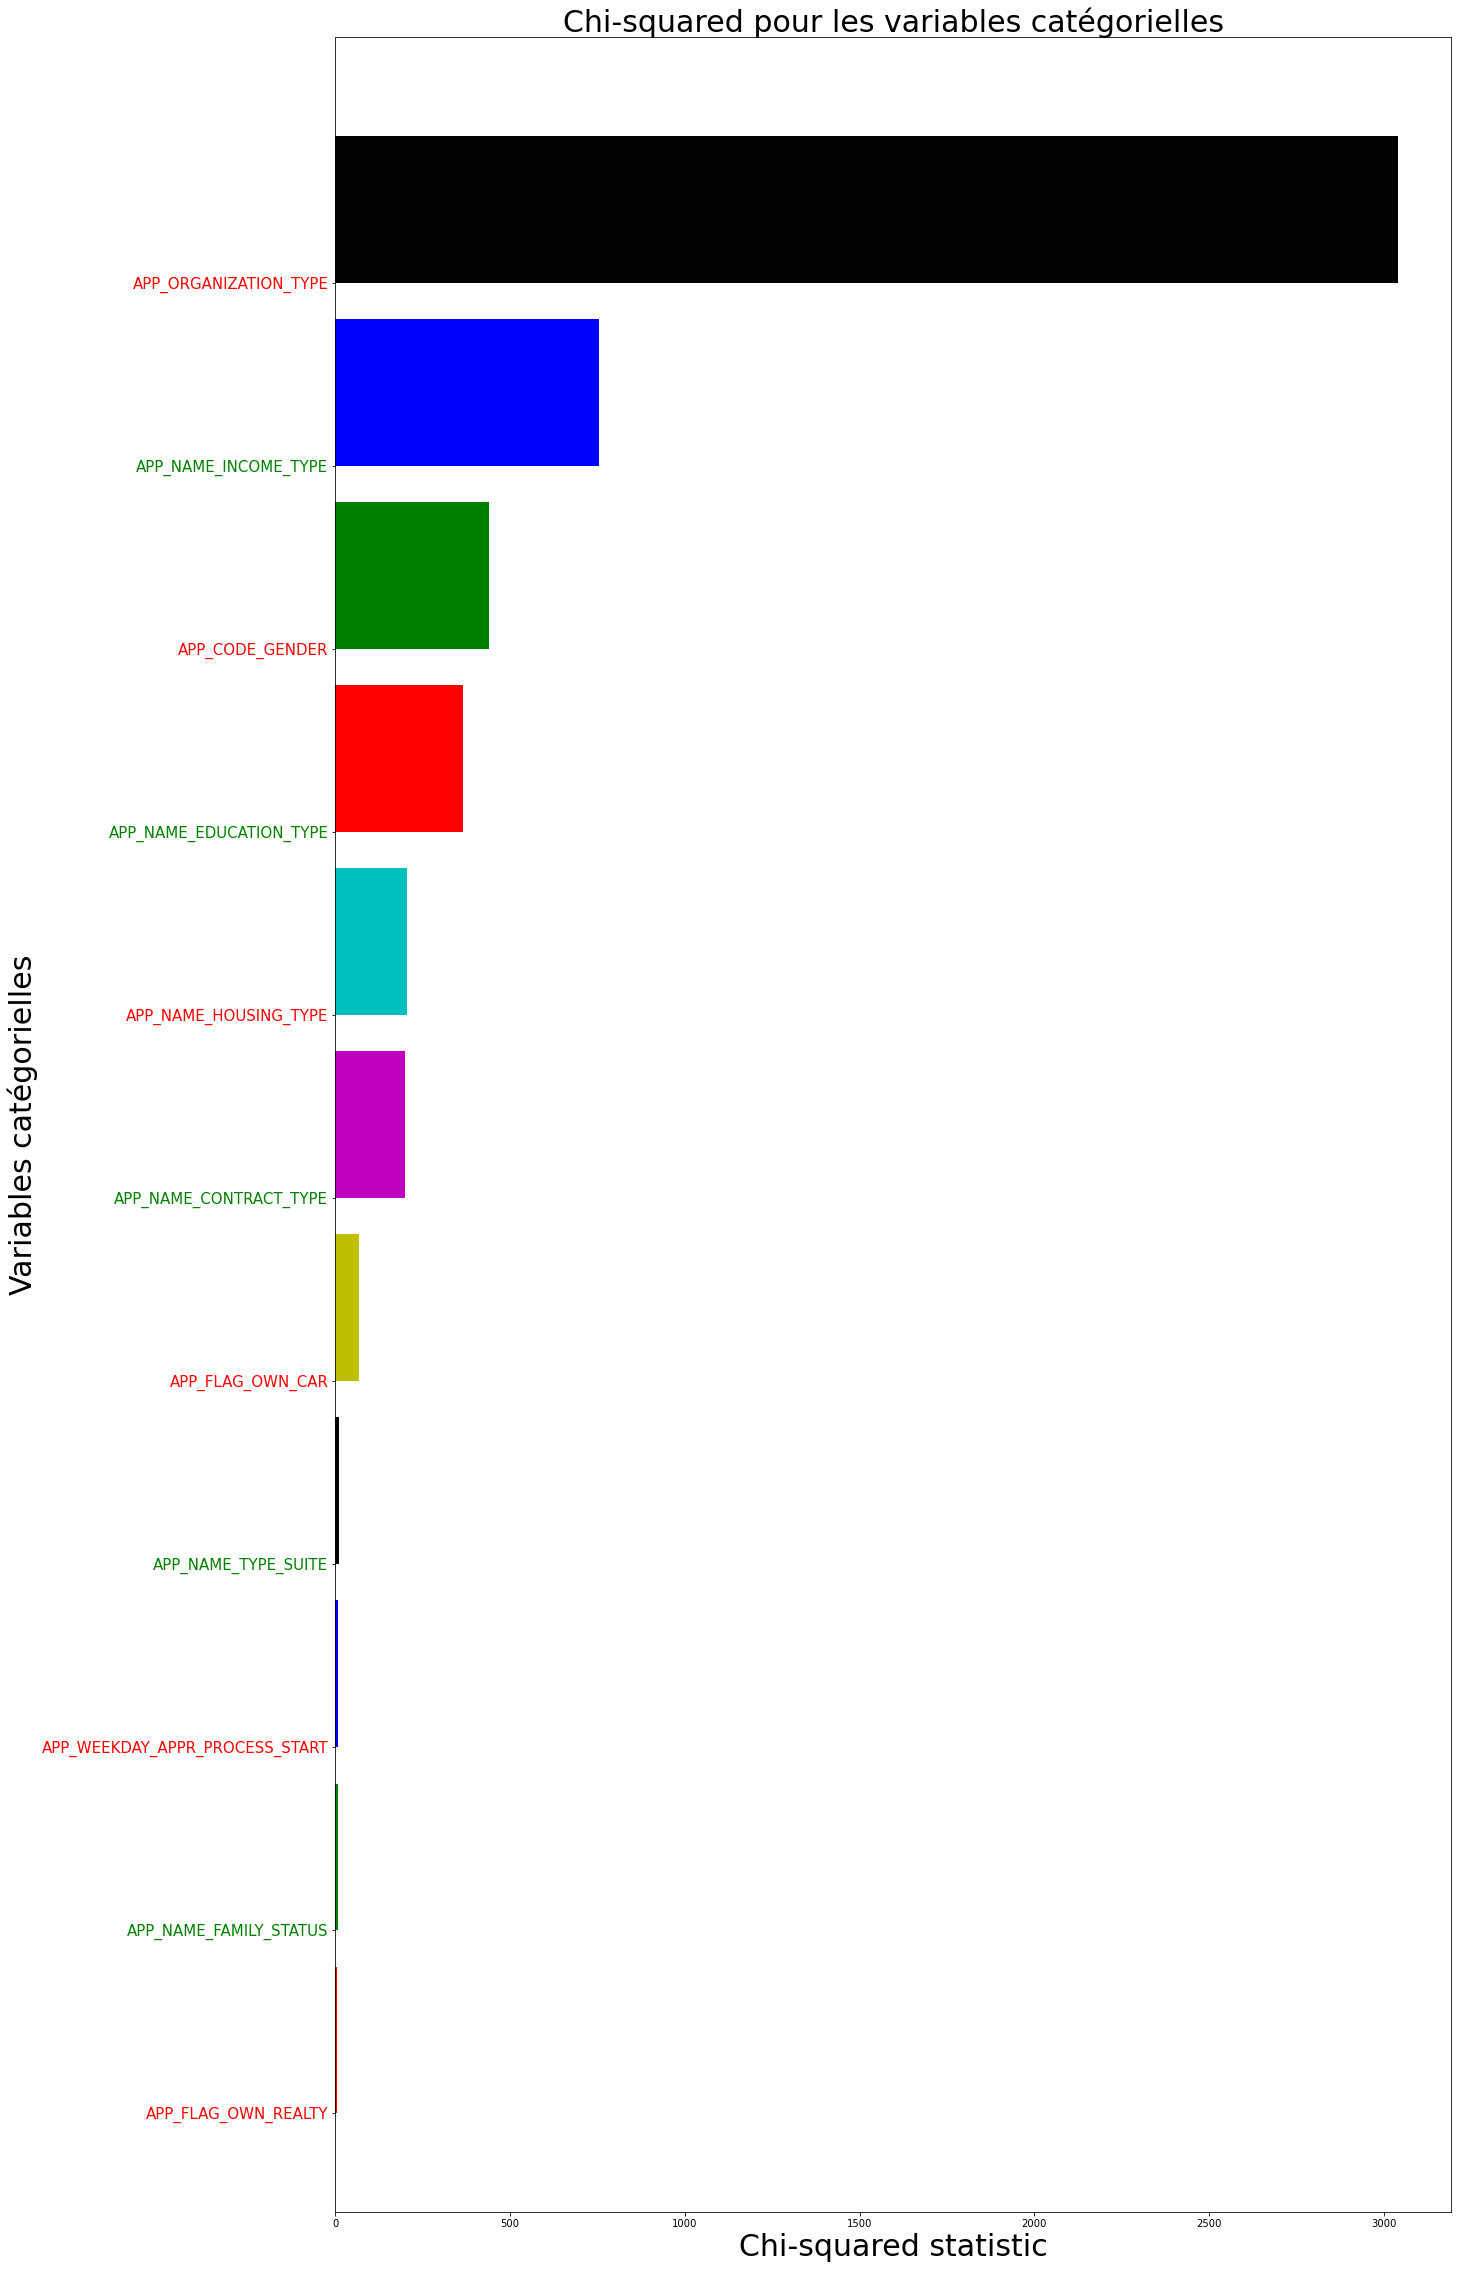

In [159]:
fig,ax=plt.subplots(figsize=(20,40))
plt.title("Chi-squared pour les variables catégorielles",fontsize=30)
plt.ylabel("Variables catégorielles",fontsize=30)
plt.xlabel("Chi-squared statistic",fontsize=30)
plt.barh(range(len(df_chi_s['chi_score'])),df_chi_s['chi_score'],align='edge',color='rgbkymc')
plt.yticks(range(len(df_chi_s['chi_score'])),df_chi_s['columns'],color='g',fontsize=15)
for i in range(0,encoded_cat_train.shape[1],2):
    ax.get_yticklabels()[i].set_color("red")
plt.show()

In [160]:
print('Variables avec un Chi² inférieur à 1:',len(df_chi_s[df_chi_s.chi_score<1]['columns']))

Variables avec un Chi² inférieur à 1: 0


Identification des tops variables catégorielles en utilisant les scores Chi-squared:

- On boucle des top 10 features aux 11 par pas de 2
- On calcule le ROC_AUC socre pour chaque plage
- On visualise son évolution

In [161]:
shape_1=encoded_cat_train.shape[1]
roc_auc=np.zeros([len(range(0,shape_1)),2],float)

k=0
df_chi_s.sort_values(by='chi_score',ascending=False,inplace=True)

In [224]:
for i in range(0,shape_1):
    train_X2,test_X2,train_y2,test_y2=train_test_split(encoded_cat_train[df_chi_s['columns'][:i]],train_y,random_state=200)
    model =LGBMClassifier(learning_rate=0.05,n_estimators=200,n_jobs=-1,reg_alpha=0.1,min_split_gain=.1,verbose=-1)
    model.fit(train_X2,train_y2)
    roc_auc[k][0]=i
    roc_auc[k][1]=roc_auc_score(test_y2,model.predict_proba(test_X2)[:,1])                                
    k=k+1

IndexError: index 34 is out of bounds for axis 0 with size 11

In [ ]:
# On affice le TOP 5 des plages
df_roc=pd.DataFrame(roc_auc,columns=['Features','roc_auc_score'])
df_roc.sort_values(by='roc_auc_score',inplace=True,ascending=False)
print('Top five roc_auc_scores with Feature count')
df_roc.head()

In [ ]:
# Visualisation
df_roc.sort_values(by='Features',inplace=True)
plt.figure(figsize=(40,10))
plt.title("Categorical Feature selection and roc_auc_score",fontsize=30)
plt.xlabel("Feature count",fontsize=30)
plt.ylabel("roc_auc_score",fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(df_roc['Features'],df_roc['roc_auc_score'],color='b',linewidth=2)
plt.hlines(xmin=0,xmax=np.max(roc_auc[:,0]),y=np.max(roc_auc[:,1]),color='g',linestyle='dashed')
df_roc.sort_values(by='roc_auc_score',inplace=True,ascending=False)
for i in range(len(df_roc)):
    plt.plot(df_roc.iloc[i,0],df_roc.iloc[i,1],'bo')
    if i<=4:
        plt.text(df_roc.iloc[i,0],df_roc.iloc[i,1],(('('+str(np.int(df_roc.iloc[i,0]))+','+str(round(df_roc.iloc[i,1],4))+')')),color='r',fontsize=28,rotation=90)
        plt.vlines(ymin=0.613,ymax=df_roc.iloc[i,1],x=df_roc.iloc[i,0],color='r',linestyle='dotted')
    if i==16:
        plt.text(df_roc.iloc[i,0],df_roc.iloc[i,1],(('('+'features'+','+'Score')+')'),color='r',fontsize=28,rotation=90)
        plt.vlines(ymin=0.613,ymax=df_roc.iloc[i,1],x=df_roc.iloc[i,0],color='r',linestyle='dotted')
plt.show()

Conclusion:

- Le score de notre modèle baseline était de 0.6269
- Le groupe donnant les meilleurs résultats est 11 variables, avec un ROC de 0.6269
Comme nous avons peu de variables et qu'elles sont toutes nécessaires pour avoir le bon ROC score, on les conserve donc toutes pour la suite de l'analyse

## Travail sur les données binaires

In [173]:
# On va identifier les colonnes ayant des données binaires
c = train_X_concat.columns[train_X_concat.isin([0,1]).all()]
print (c)

Index(['APP_FLAG_MOBIL', 'APP_FLAG_EMP_PHONE', 'APP_FLAG_WORK_PHONE',
       'APP_FLAG_CONT_MOBILE', 'APP_FLAG_PHONE', 'APP_FLAG_EMAIL',
       'APP_REG_REGION_NOT_LIVE_REGION', 'APP_REG_REGION_NOT_WORK_REGION',
       'APP_LIVE_REGION_NOT_WORK_REGION', 'APP_REG_CITY_NOT_LIVE_CITY',
       'APP_REG_CITY_NOT_WORK_CITY', 'APP_LIVE_CITY_NOT_WORK_CITY',
       'APP_FLAG_DOCUMENT_2', 'APP_FLAG_DOCUMENT_3', 'APP_FLAG_DOCUMENT_4',
       'APP_FLAG_DOCUMENT_5', 'APP_FLAG_DOCUMENT_6', 'APP_FLAG_DOCUMENT_7',
       'APP_FLAG_DOCUMENT_8', 'APP_FLAG_DOCUMENT_9', 'APP_FLAG_DOCUMENT_10',
       'APP_FLAG_DOCUMENT_11', 'APP_FLAG_DOCUMENT_12', 'APP_FLAG_DOCUMENT_13',
       'APP_FLAG_DOCUMENT_14', 'APP_FLAG_DOCUMENT_15', 'APP_FLAG_DOCUMENT_16',
       'APP_FLAG_DOCUMENT_17', 'APP_FLAG_DOCUMENT_18', 'APP_FLAG_DOCUMENT_19',
       'APP_FLAG_DOCUMENT_20', 'APP_FLAG_DOCUMENT_21',
       'APP_DAYS_EMPLOYED_ANOM'],
      dtype='object')


On instancie notre modèle baseline

In [174]:
print(train_X_concat[c].shape)
print(train_y.shape)

(229675, 33)
(229675,)


In [175]:
model =LGBMClassifier(learning_rate=0.05,n_estimators=200,n_jobs=-1,reg_alpha=0.1,min_split_gain=.1,verbose=-1,is_unbalance =True)

model.fit(train_X_concat[c],train_y)

LGBMClassifier(is_unbalance=True, learning_rate=0.05, min_split_gain=0.1,
               n_estimators=200, reg_alpha=0.1, verbose=-1)

In [176]:
score_model(model,test_X_concat[c], test_y )

ROC AUC socre : 0.593917952809361
Predicted 1s:  44379
classification report : 
               precision    recall  f1-score   support

           0       0.94      0.43      0.59     70359
           1       0.10      0.71      0.17      6185

    accuracy                           0.45     76544
   macro avg       0.52      0.57      0.38     76544
weighted avg       0.88      0.45      0.56     76544



In [177]:
sorted(zip(model.feature_importances_, train_X_concat[c].columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,train_X_concat[c].columns)), columns=['Value','Feature'])

In [178]:
feature_imp

Value                          Feature
0       0             APP_FLAG_DOCUMENT_10
1       0             APP_FLAG_DOCUMENT_12
2       0              APP_FLAG_DOCUMENT_2
3       0              APP_FLAG_DOCUMENT_4
4       0                   APP_FLAG_MOBIL
5      30              APP_FLAG_DOCUMENT_7
6      33             APP_FLAG_DOCUMENT_11
7      35             APP_FLAG_DOCUMENT_19
8      37           APP_DAYS_EMPLOYED_ANOM
9      49             APP_FLAG_DOCUMENT_20
10     68             APP_FLAG_DOCUMENT_17
11     70   APP_REG_REGION_NOT_WORK_REGION
12     72             APP_FLAG_CONT_MOBILE
13     95              APP_FLAG_DOCUMENT_9
14    106             APP_FLAG_DOCUMENT_15
15    111               APP_FLAG_EMP_PHONE
16    116             APP_FLAG_DOCUMENT_21
17    129  APP_LIVE_REGION_NOT_WORK_REGION
18    131              APP_FLAG_DOCUMENT_6
19    143      APP_LIVE_CITY_NOT_WORK_CITY
20    149              APP_FLAG_DOCUMENT_8
21    156             APP_FLAG_DOCUMENT_14
22    170             APP_FLAG_DOCUMENT_18
23    170              APP_FLAG_DOCUMENT_5
24    178             APP_FLAG_DOCUMENT_13
25    179             APP_FLAG_DOCUMENT_16
26    189       APP_REG_CITY_NOT_WORK_CITY
27    201   APP_REG_REGION_NOT_LIVE_REGION
28    242              APP_FLAG_DOCUMENT_3
29    245       APP_REG_CITY_NOT_LIVE_CITY
30    338                   APP_FLAG_EMAIL
31    401              APP_FLAG_WORK_PHONE
32    410                   APP_FLAG_PHONE

ValueError: shape mismatch: objects cannot be broadcast to a single shape

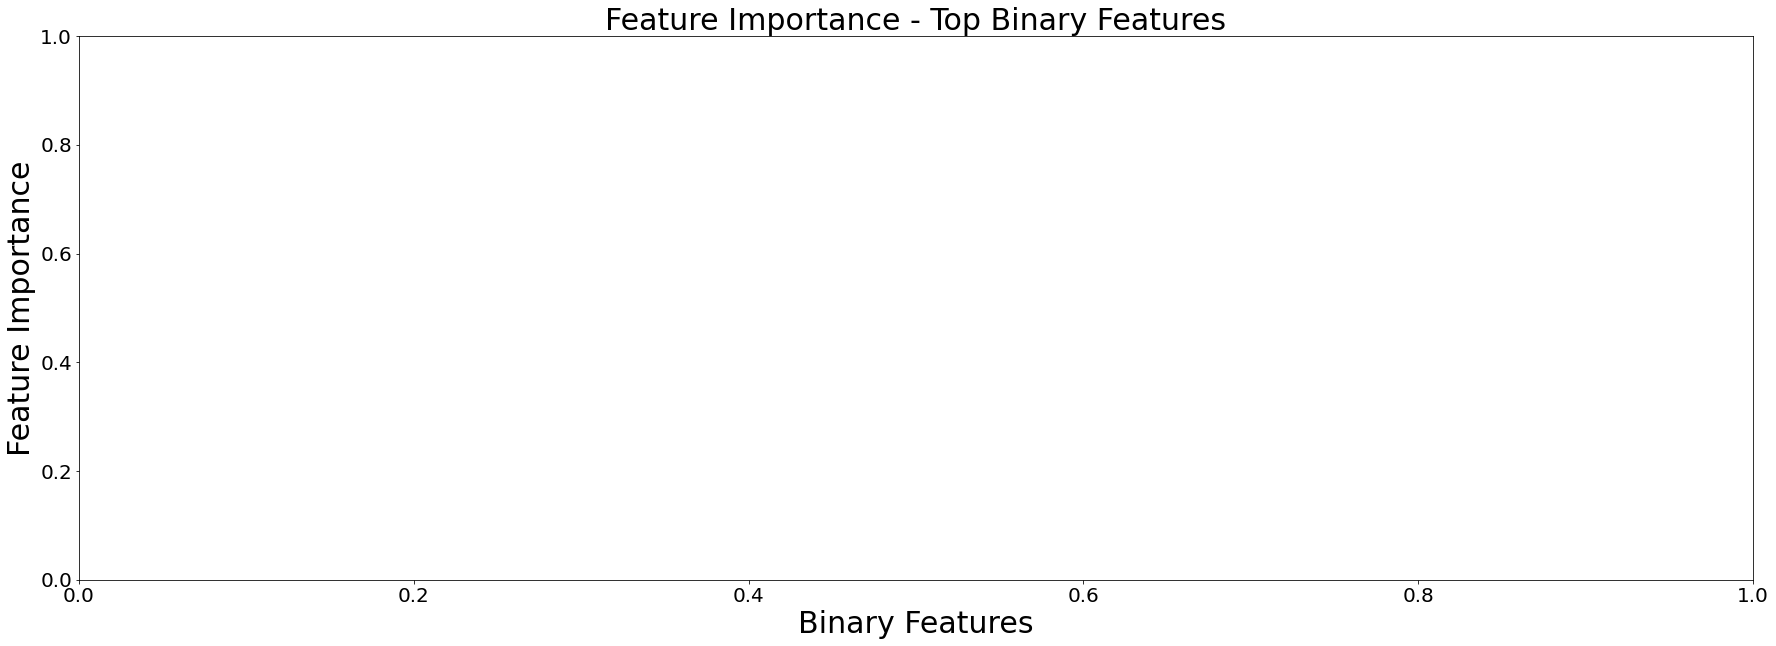

In [179]:
# Visualisation des features les plus importantes
indices = np.argsort(model.feature_importances_,)[::-1]
names = [train_X_concat[c].columns[i] for i in indices]
plt.figure(figsize=(30,10))
plt.title("Feature Importance - Top Binary Features",fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Binary Features",fontsize=30)
plt.ylabel("Feature Importance",fontsize=30)
plt.bar(range(32), model.feature_importances_[indices])
plt.xticks(range(32), names,rotation=90)

plt.show()

In [180]:
# UTilisation du Chi²
chi2_selector=SelectKBest(chi2,k=train_X_concat[c].shape[1])
feature_kbest=chi2_selector.fit_transform(train_X_concat[c],train_y)

In [181]:
df_chi=pd.DataFrame(chi2_selector.scores_,columns=['chi_score'])

In [182]:
df_chi['columns']=c
df_chi_bins=df_chi.sort_values(by='chi_score',ascending=False)

<ipython-input-183-9f463f418ccd>:8: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(range(len(df_chi_bins['chi_score'])),df_chi_bins['chi_score'],align='edge',color='rgbkymc')


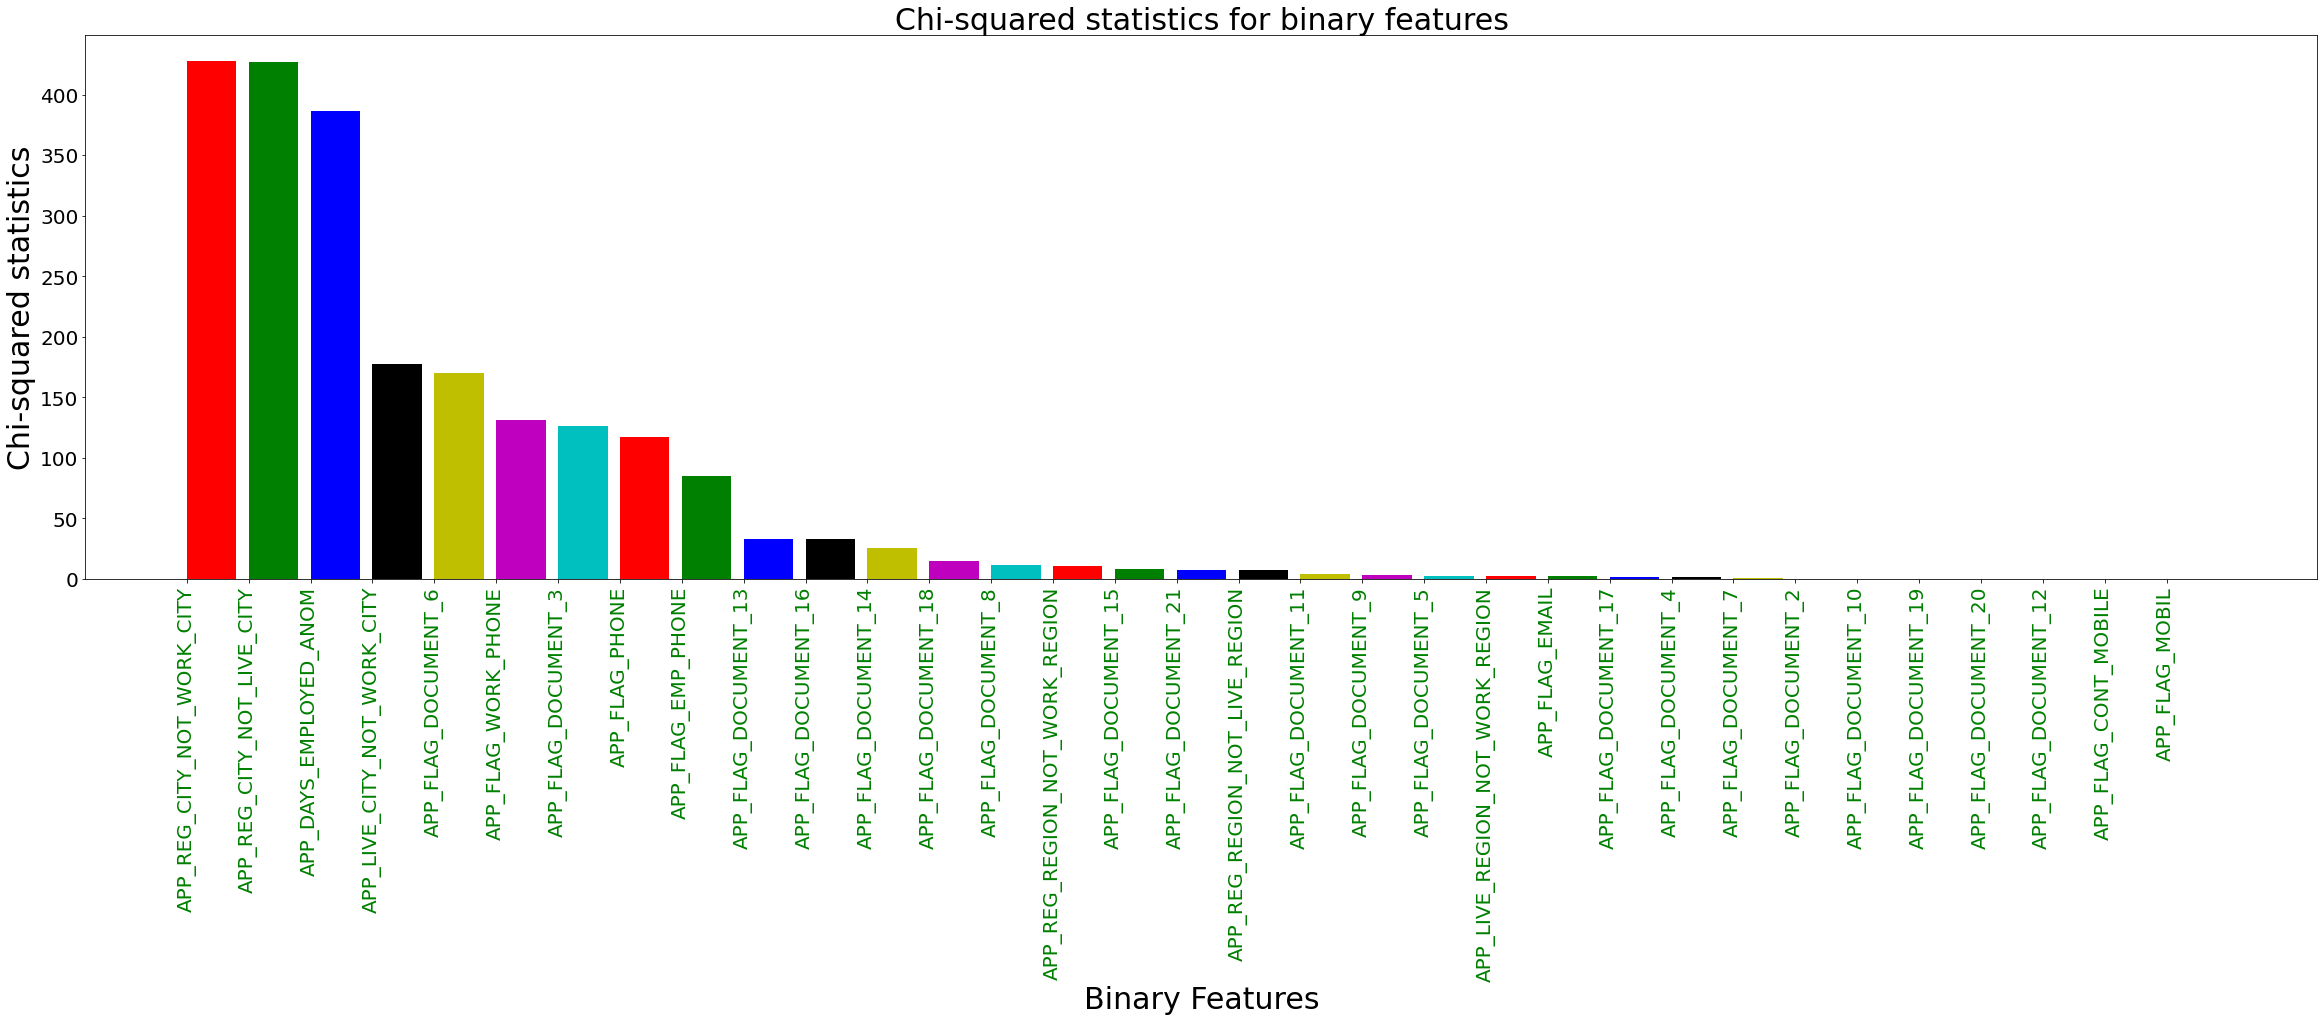

In [183]:
# Visualisation
plt.figure(figsize=(40,10))
plt.title("Chi-squared statistics for binary features",fontsize=30)
plt.xlabel("Binary Features",fontsize=30)
plt.ylabel("Chi-squared statistics",fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.bar(range(len(df_chi_bins['chi_score'])),df_chi_bins['chi_score'],align='edge',color='rgbkymc')
plt.xticks(range(len(df_chi_bins['chi_score'])),df_chi_bins['columns'],rotation=90,color='g')
plt.show()

On voit que les features les plus importantes ne sont plus les mêmes

### Identification des meilleurs variables binaires en utilisant le score Chi²
- Création d'une boucle allant de 0 aux 32 variables binaires par pas de 3
- Calcul de roc_auc score pour chaque plage.
- Visualisation

In [184]:
%%time
roc_auc_bin=np.zeros([len(range(5,train_X_concat[c].shape[1],3)),2],float)
k=0

for i in range(5,train_X_concat[c].shape[1],3):
    train_X3,test_X3,train_y3,test_y3=train_test_split(train_X_concat[c][df_chi_bins['columns'][:i]],train_y,random_state=200)
    model =LGBMClassifier(learning_rate=0.05,n_estimators=200,n_jobs=-1,reg_alpha=0.1,min_split_gain=.1,verbose=-1,is_unbalance =True)
    model.fit(train_X3,train_y3)
    roc_auc_bin[k][0]=i
    roc_auc_bin[k][1]=roc_auc_score(test_y3,model.predict_proba(test_X3)[:,1])
    k=k+1

Wall time: 29.8 s


In [185]:
shape_2=train_X_concat[c].shape[1]
roc_auc_bin=np.zeros([len(range(5,shape_1,3)),2],float)

k=0

In [186]:
roc_auc_bin

array([[0., 0.],
       [0., 0.]])

In [187]:
for i in range(5,shape_2,3):
    train_X3,test_X3,train_y3,test_y3=train_test_split(train_X_concat[c][df_chi_bins['columns'][:i]],train_y,random_state=200)
    model =LGBMClassifier(learning_rate=0.05,n_estimators=200,n_jobs=-1,reg_alpha=0.1,min_split_gain=.1,verbose=-1)
    model.fit(train_X3,train_y3)
    roc_auc[k][0]=i
    roc_auc[k][1]=roc_auc_score(test_y3,model.predict_proba(test_X3)[:,1])                                
    k=k+1

In [188]:
# Visualisation des TOP 5 des plages
df_roc_bin=pd.DataFrame(roc_auc_bin,columns=['Features','roc_auc_score'])
df_roc_bin.sort_values(by='roc_auc_score',inplace=True,ascending=False)
print('Top five roc_auc_scores with Feature count')
df_roc_bin.head()

Top five roc_auc_scores with Feature count


Features  roc_auc_score
0       0.0            0.0
1       0.0            0.0

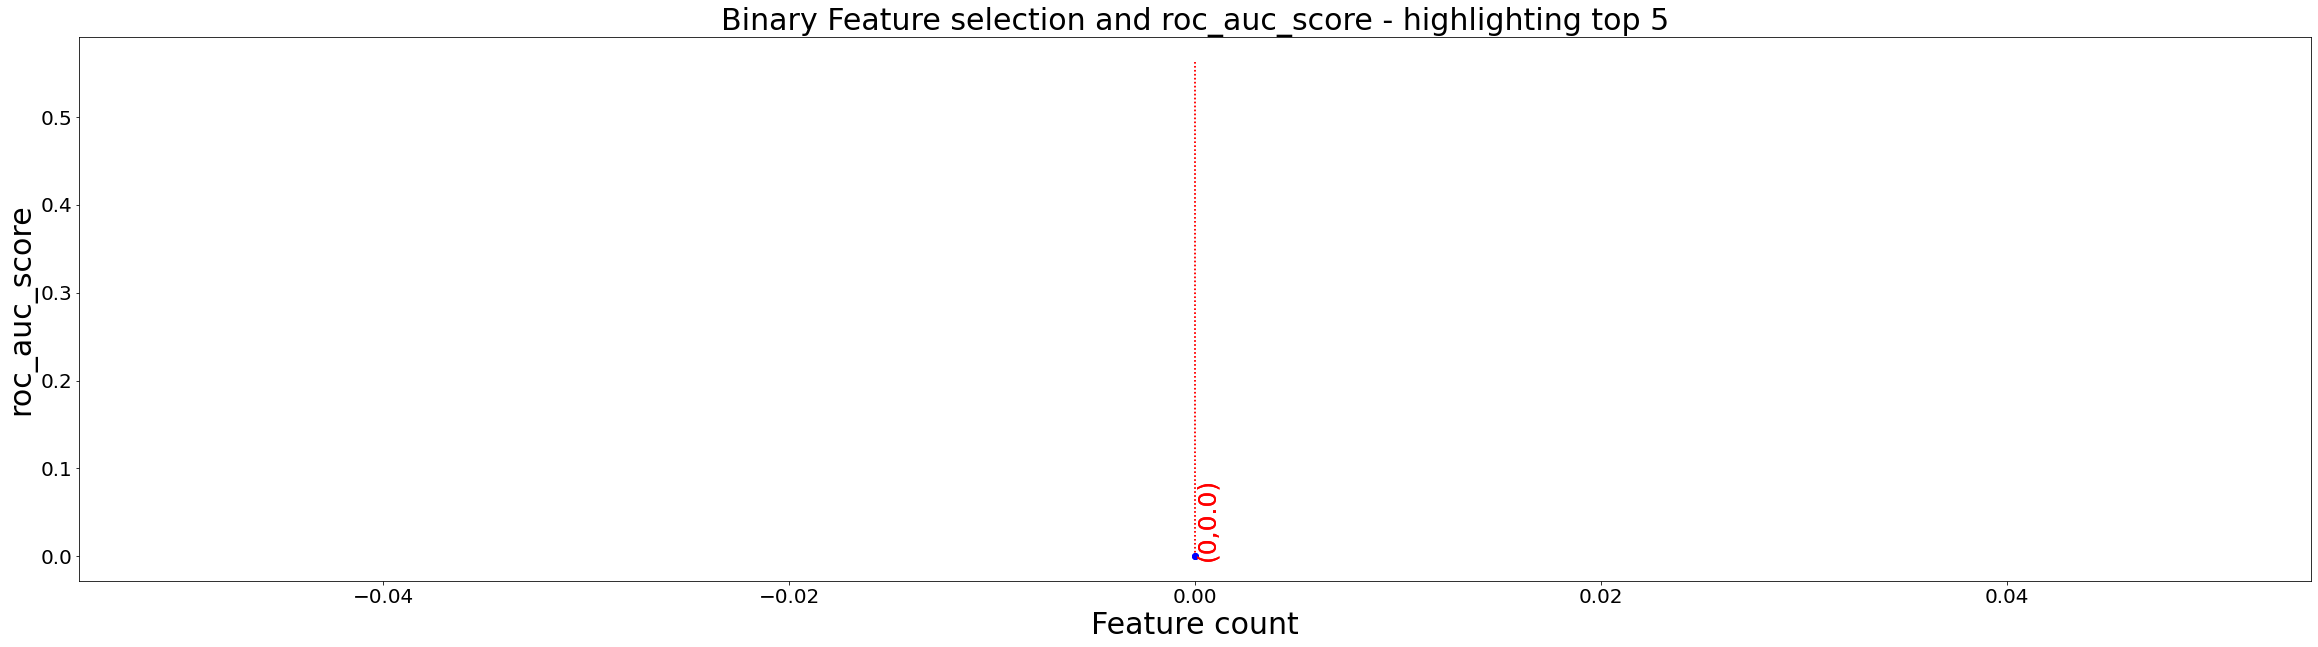

In [189]:
df_roc_bin.sort_values(by='Features',inplace=True)
plt.figure(figsize=(40,10))
plt.title("Binary Feature selection and roc_auc_score - highlighting top 5",fontsize=30)
plt.xlabel("Feature count",fontsize=30)
plt.ylabel("roc_auc_score",fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(df_roc_bin['Features'],df_roc_bin['roc_auc_score'],color='b',linewidth=3)
plt.hlines(xmin=0,xmax=np.max(roc_auc_bin[:,0]),y=np.max(roc_auc_bin[:,1]),color='g',linestyle='dashed')
df_roc_bin.sort_values(by='roc_auc_score',inplace=True,ascending=False)
for i in range(len(df_roc_bin)):
    plt.plot(df_roc_bin.iloc[i,0],df_roc_bin.iloc[i,1],'bo')
    if i<=4:
        plt.text(df_roc_bin.iloc[i,0],df_roc_bin.iloc[i,1],
                 (('('+str(np.int(df_roc_bin.iloc[i,0]))+','+str(round(df_roc_bin.iloc[i,1],4))+')')),color='r',fontsize=25,rotation=90)
        plt.vlines(ymin=0.563,ymax=df_roc_bin.iloc[i,1],x=df_roc_bin.iloc[i,0],color='r',linestyle='dotted')
    if i==8:
        plt.text(df_roc_bin.iloc[i,0],df_roc_bin.iloc[i,1],(('('+'features'+','+'Score')+')'),color='r',fontsize=25,rotation=90)
        plt.vlines(ymin=0.563,ymax=df_roc_bin.iloc[i,1],x=df_roc_bin.iloc[i,0],color='r',linestyle='dotted')
plt.show()

In [190]:
sorted(zip(model.feature_importances_, train_X_concat[c].columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,train_X_concat[c].columns)), columns=['Value','Feature'])

In [191]:
feature_imp

Value                          Feature
0       0             APP_FLAG_DOCUMENT_14
1       0             APP_FLAG_DOCUMENT_15
2       0             APP_FLAG_DOCUMENT_16
3       0             APP_FLAG_DOCUMENT_17
4       0             APP_FLAG_DOCUMENT_20
5       0              APP_FLAG_DOCUMENT_9
6       5              APP_FLAG_DOCUMENT_4
7      14                   APP_FLAG_PHONE
8      19             APP_FLAG_DOCUMENT_13
9      21             APP_FLAG_DOCUMENT_11
10     23             APP_FLAG_DOCUMENT_18
11     27             APP_FLAG_DOCUMENT_19
12     30              APP_FLAG_DOCUMENT_8
13     31  APP_LIVE_REGION_NOT_WORK_REGION
14     46              APP_FLAG_DOCUMENT_6
15     50             APP_FLAG_DOCUMENT_21
16     64              APP_FLAG_WORK_PHONE
17     72             APP_FLAG_CONT_MOBILE
18     79             APP_FLAG_DOCUMENT_10
19     90              APP_FLAG_DOCUMENT_5
20    103                   APP_FLAG_MOBIL
21    110              APP_FLAG_DOCUMENT_7
22    116              APP_FLAG_DOCUMENT_3
23    128             APP_FLAG_DOCUMENT_12
24    139      APP_LIVE_CITY_NOT_WORK_CITY
25    149       APP_REG_CITY_NOT_LIVE_CITY
26    155   APP_REG_REGION_NOT_LIVE_REGION
27    163              APP_FLAG_DOCUMENT_2
28    174       APP_REG_CITY_NOT_WORK_CITY
29    250               APP_FLAG_EMP_PHONE
30    264                   APP_FLAG_EMAIL
31    298   APP_REG_REGION_NOT_WORK_REGION

In [192]:
# Visualisation des TOP 5 des plages
df_roc_bin=pd.DataFrame(roc_auc_bin,columns=['Features','roc_auc_score'])
df_roc_bin.sort_values(by='roc_auc_score',inplace=True,ascending=False)
print('Top five roc_auc_scores with Feature count')
df_roc_bin.head()

Top five roc_auc_scores with Feature count


Features  roc_auc_score
0       0.0            0.0
1       0.0            0.0

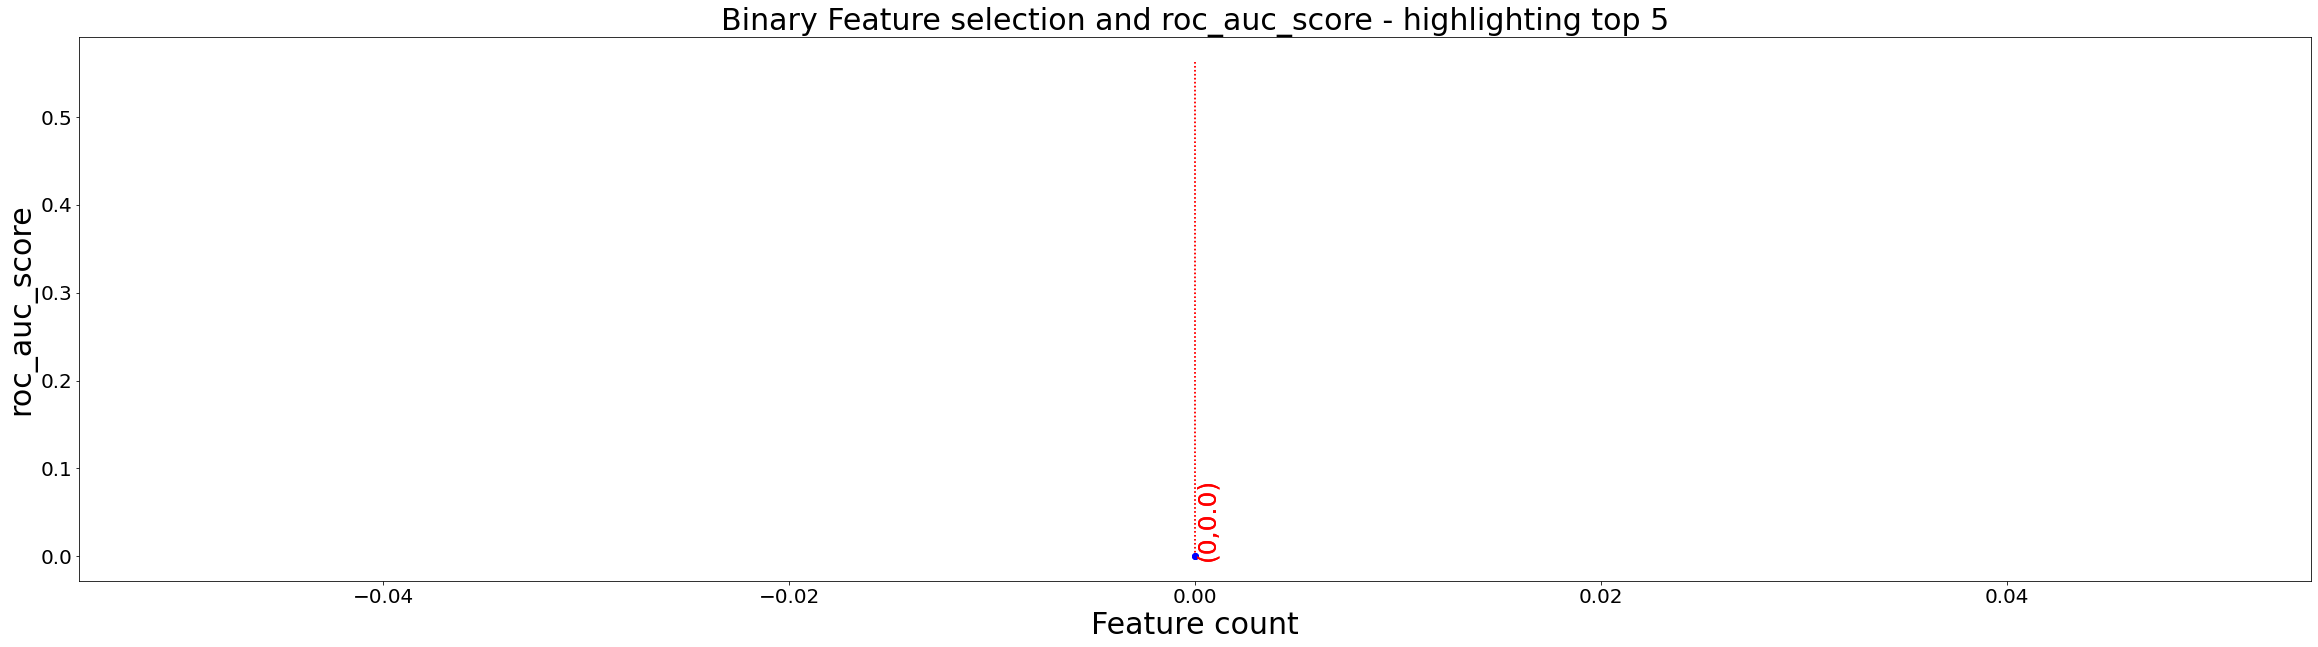

In [193]:
df_roc_bin.sort_values(by='Features',inplace=True)
plt.figure(figsize=(40,10))
plt.title("Binary Feature selection and roc_auc_score - highlighting top 5",fontsize=30)
plt.xlabel("Feature count",fontsize=30)
plt.ylabel("roc_auc_score",fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(df_roc_bin['Features'],df_roc_bin['roc_auc_score'],color='b',linewidth=3)
plt.hlines(xmin=0,xmax=np.max(roc_auc_bin[:,0]),y=np.max(roc_auc_bin[:,1]),color='g',linestyle='dashed')
df_roc_bin.sort_values(by='roc_auc_score',inplace=True,ascending=False)
for i in range(len(df_roc_bin)):
    plt.plot(df_roc_bin.iloc[i,0],df_roc_bin.iloc[i,1],'bo')
    if i<=4:
        plt.text(df_roc_bin.iloc[i,0],df_roc_bin.iloc[i,1],
                 (('('+str(np.int(df_roc_bin.iloc[i,0]))+','+str(round(df_roc_bin.iloc[i,1],4))+')')),color='r',fontsize=25,rotation=90)
        plt.vlines(ymin=0.563,ymax=df_roc_bin.iloc[i,1],x=df_roc_bin.iloc[i,0],color='r',linestyle='dotted')
    if i==8:
        plt.text(df_roc_bin.iloc[i,0],df_roc_bin.iloc[i,1],(('('+'features'+','+'Score')+')'),color='r',fontsize=25,rotation=90)
        plt.vlines(ymin=0.563,ymax=df_roc_bin.iloc[i,1],x=df_roc_bin.iloc[i,0],color='r',linestyle='dotted')
plt.show()

On a un effet plateau au dela de 18 variables. On va donc supprimer les moins importantes.

In [194]:
var_bin_to_keep= list(feature_imp[:18]['Feature'])

### Etude des variables continues

In [195]:
# on va sélectionner les variables numériques

cont_train = train_X_concat.select_dtypes(include=["number"])
print(cont_train.shape)

cont_test = test_X_concat.select_dtypes(include=["number"])
print(cont_test.shape)

(229675, 376)
(76544, 376)


In [196]:
# On vient y retirer les variables binaires

cont_train = cont_train[~cont_train.isin(c)]

On va utiliser ANOVA / F-score pour sélectionner les variables les plus pertinantes.

On commence encore une fois par créer un modèle baseline

In [197]:
model =LGBMClassifier(learning_rate=0.05,n_estimators=200,n_jobs=-1,reg_alpha=0.1,min_split_gain=.1,verbose=-1,is_unbalance =True)

model.fit(cont_train,train_y)

LGBMClassifier(is_unbalance=True, learning_rate=0.05, min_split_gain=0.1,
               n_estimators=200, reg_alpha=0.1, verbose=-1)

In [198]:
score_model(model,cont_test, test_y )

ROC AUC socre : 0.7696396272710773
Predicted 1s:  23922
classification report : 
               precision    recall  f1-score   support

           0       0.96      0.72      0.82     70359
           1       0.18      0.68      0.28      6185

    accuracy                           0.72     76544
   macro avg       0.57      0.70      0.55     76544
weighted avg       0.90      0.72      0.78     76544



In [199]:
sorted(zip(model.feature_importances_, cont_train.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,cont_train.columns)), columns=['Value','Feature'])

In [200]:
feature_imp

Value                              Feature
0        0                  APP_AMT_GOODS_PRICE
1        0   APP_AMT_GOODS_PRICE+APP_AMT_CREDIT
2        0       APP_AMT_REQ_CREDIT_BUREAU_HOUR
3        0   APP_DAYS_ID_PUBLISH-APP_AMT_CREDIT
4        0                 APP_FLAG_CONT_MOBILE
..     ...                                  ...
371     81                       APP_DAYS_BIRTH
372     83  APP_AMT_GOODS_PRICE/APP_AMT_ANNUITY
373     93    APP_EXT_SOURCE_3+APP_EXT_SOURCE_2
374    101                     APP_EXT_SOURCE_2
375    263       APP_AMT_ANNUITY/APP_AMT_CREDIT

[376 rows x 2 columns]

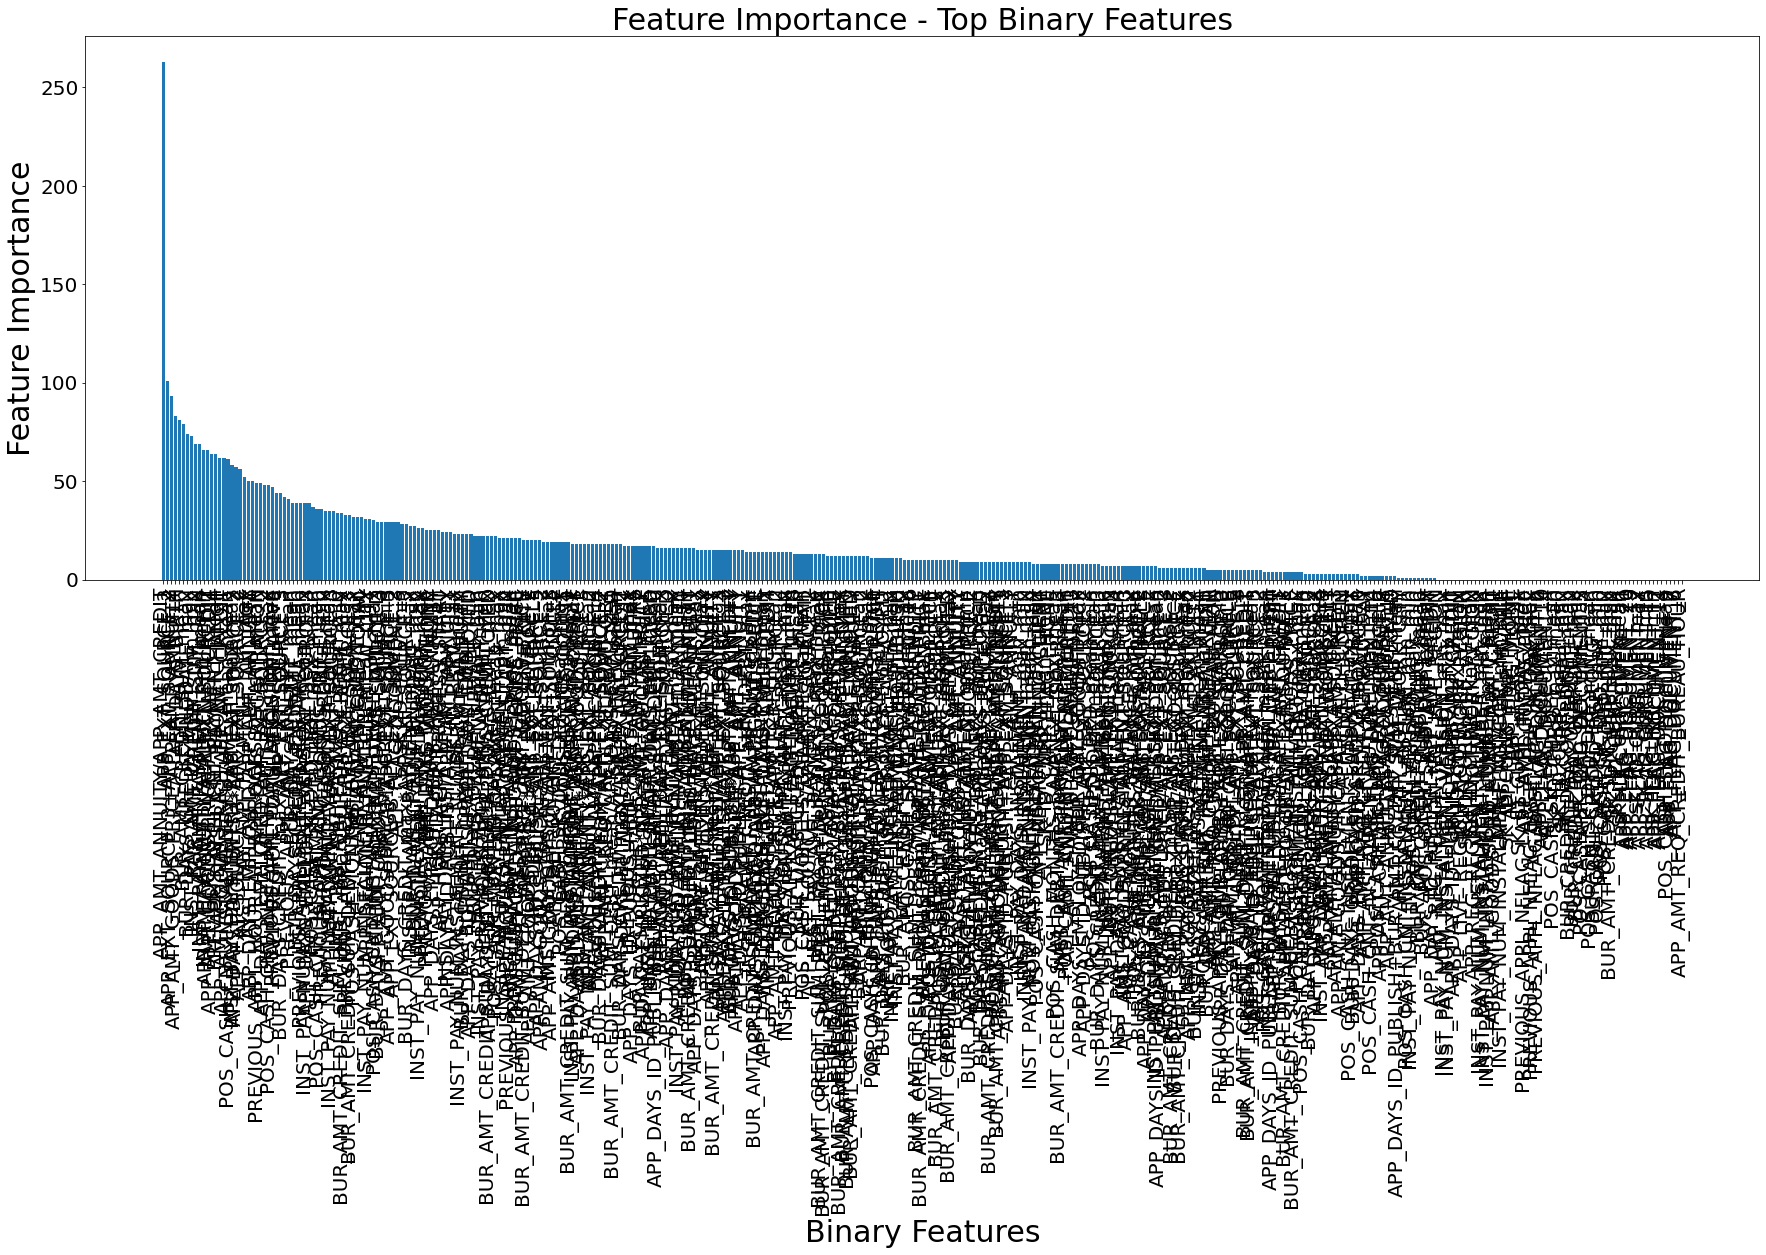

In [201]:
# Visualisation des features les plus importantes
indices = np.argsort(model.feature_importances_,)[::-1]
names = [cont_train.columns[i] for i in indices]
plt.figure(figsize=(30,10))
plt.title("Feature Importance - Top Binary Features",fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Binary Features",fontsize=30)
plt.ylabel("Feature Importance",fontsize=30)
plt.bar(range(376), model.feature_importances_[indices])
plt.xticks(range(376), names,rotation=90)

plt.show()

In [202]:
# On supprimer toutes les variables qui n'ont pas un certain taux de remplissage
cont_train_clean = cont_train.dropna(thresh=len(cont_train)*0.80, axis='columns')
print(cont_train_clean.shape)

(229675, 356)


<AxesSubplot:>

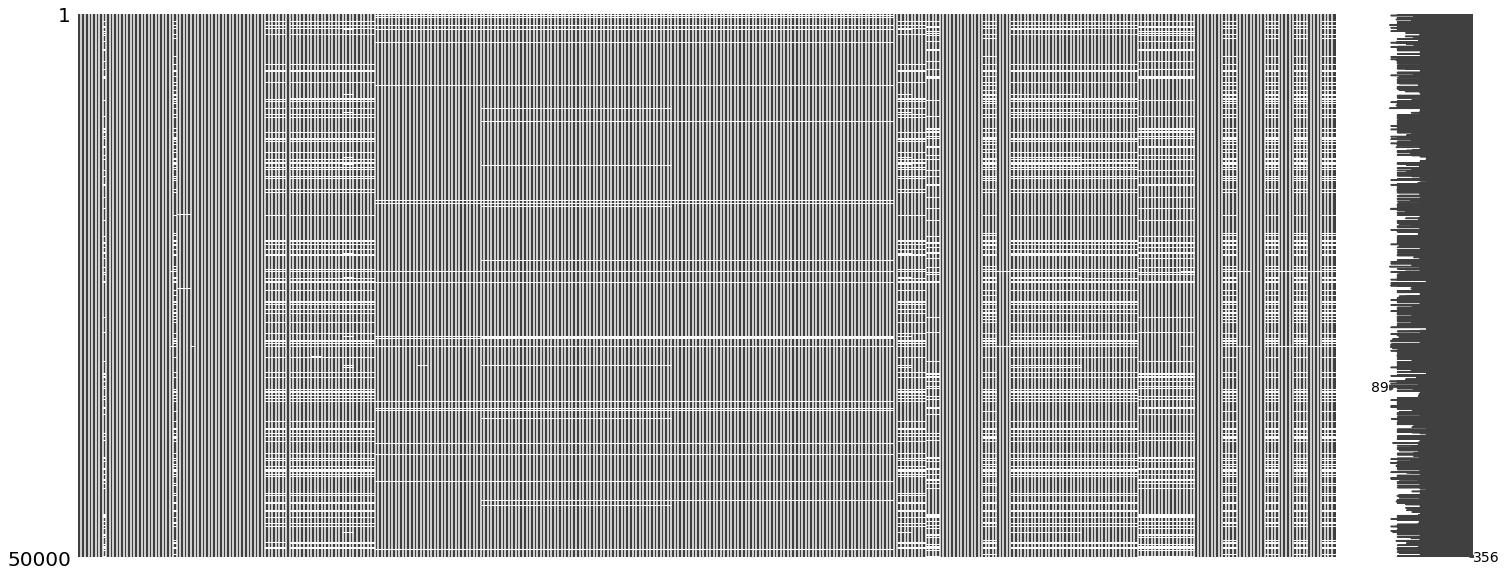

In [203]:
# On va vérifier les valeurs manquantes
msno.matrix(cont_train_clean.sample(50000))

In [204]:
# Création d'une fonction qui isole les colonnes ayant des données manquantes 
def missing_values_table(df):
    
        # Calculer le total des valeurs manquantes
        mis_val = df.isnull().sum()
        
        # Calculer le pourcentage des valeurs manquantes
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Concatener ces 2 données dans une même table
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Renomer les colonnes
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Nb valeurs manquantes', 1 : '% valeurs manquantes'})
        
        # Les trier par % décroissant
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% valeurs manquantes', ascending=False).round(1)
        
        # Print some summary information
        print ("Le dataset a " + str(df.shape[1]) + " columns.\n"      
            "Sur ce total, il y a  " + str(mis_val_table_ren_columns.shape[0]) +
              " colonnes qui ont des valeurs manquantes.")
        
        # Retourner ce dataframe
        return mis_val_table_ren_columns

In [205]:
missing_values = missing_values_table(cont_train_clean)
missing_values

Le dataset a 356 columns.
Sur ce total, il y a  298 colonnes qui ont des valeurs manquantes.


Nb valeurs manquantes  % valeurs manquantes
APP_EXT_SOURCE_3/APP_EXT_SOURCE_2                  45881                  20.0
APP_EXT_SOURCE_3*APP_EXT_SOURCE_2                  45881                  20.0
APP_EXT_SOURCE_3-APP_EXT_SOURCE_2                  45881                  20.0
APP_EXT_SOURCE_3+APP_EXT_SOURCE_2                  45881                  20.0
APP_AMT_ANNUITY-APP_EXT_SOURCE_3                   45555                  19.8
...                                                  ...                   ...
APP_AMT_ANNUITY-APP_AMT_CREDIT                         9                   0.0
APP_AMT_ANNUITY*APP_AMT_CREDIT                         9                   0.0
APP_AMT_ANNUITY/APP_AMT_CREDIT                         9                   0.0
APP_AMT_ANNUITY                                        9                   0.0
APP_DAYS_LAST_PHONE_CHANGE                             1                   0.0

[298 rows x 2 columns]

In [206]:
#On supprime les valeurs manquantes
cont_train_notna= cont_train_clean.dropna(how='any',axis=0)

<AxesSubplot:>

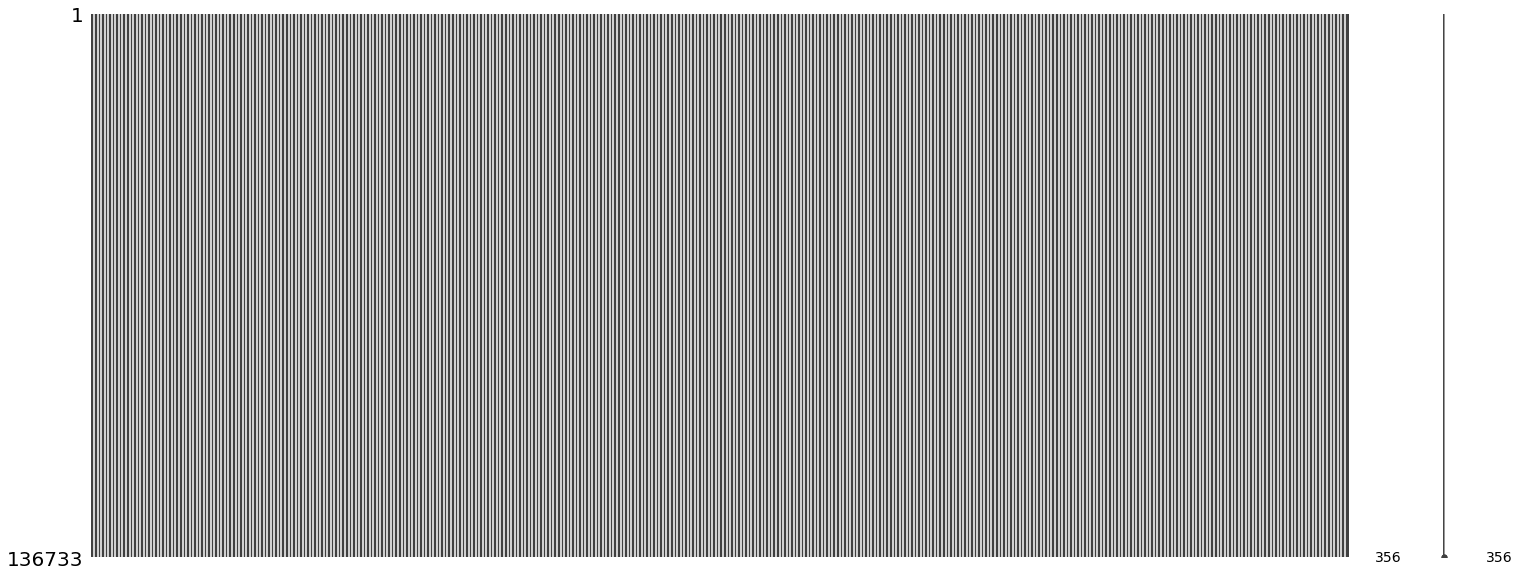

In [207]:
# On va vérifier les valeurs manquantes
msno.matrix(cont_train_notna)

In [208]:
# Nettoyer un dataframe des valeurs null, infinies...
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [209]:
cont_train_notna=clean_dataset(cont_train_notna)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [210]:
# On va refiltrer les data frames en fonction des indices restants
index_list3 = cont_train_notna.index
train_y_na = train_y[index_list3]


In [211]:
# On va utiliser un modèle ANOVA pour trouver les features les plus importantes
Fvalue_selector=SelectKBest(f_classif,k=cont_train_notna.shape[1])
feature_kbest=Fvalue_selector.fit_transform(cont_train_notna,train_y_na)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 10  33  43 158 167 194] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [212]:
df_Fvalue=pd.DataFrame(Fvalue_selector.scores_,columns=['F-value'])
df_Fvalue['columns']=cont_train_notna.columns
df_Fvalue_s=df_Fvalue.sort_values(by='F-value',ascending=False)

<ipython-input-213-75445dbb8446>:8: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(range(len(df_Fvalue_s)),df_Fvalue_s['F-value'],align='edge',color='rgbkymc')


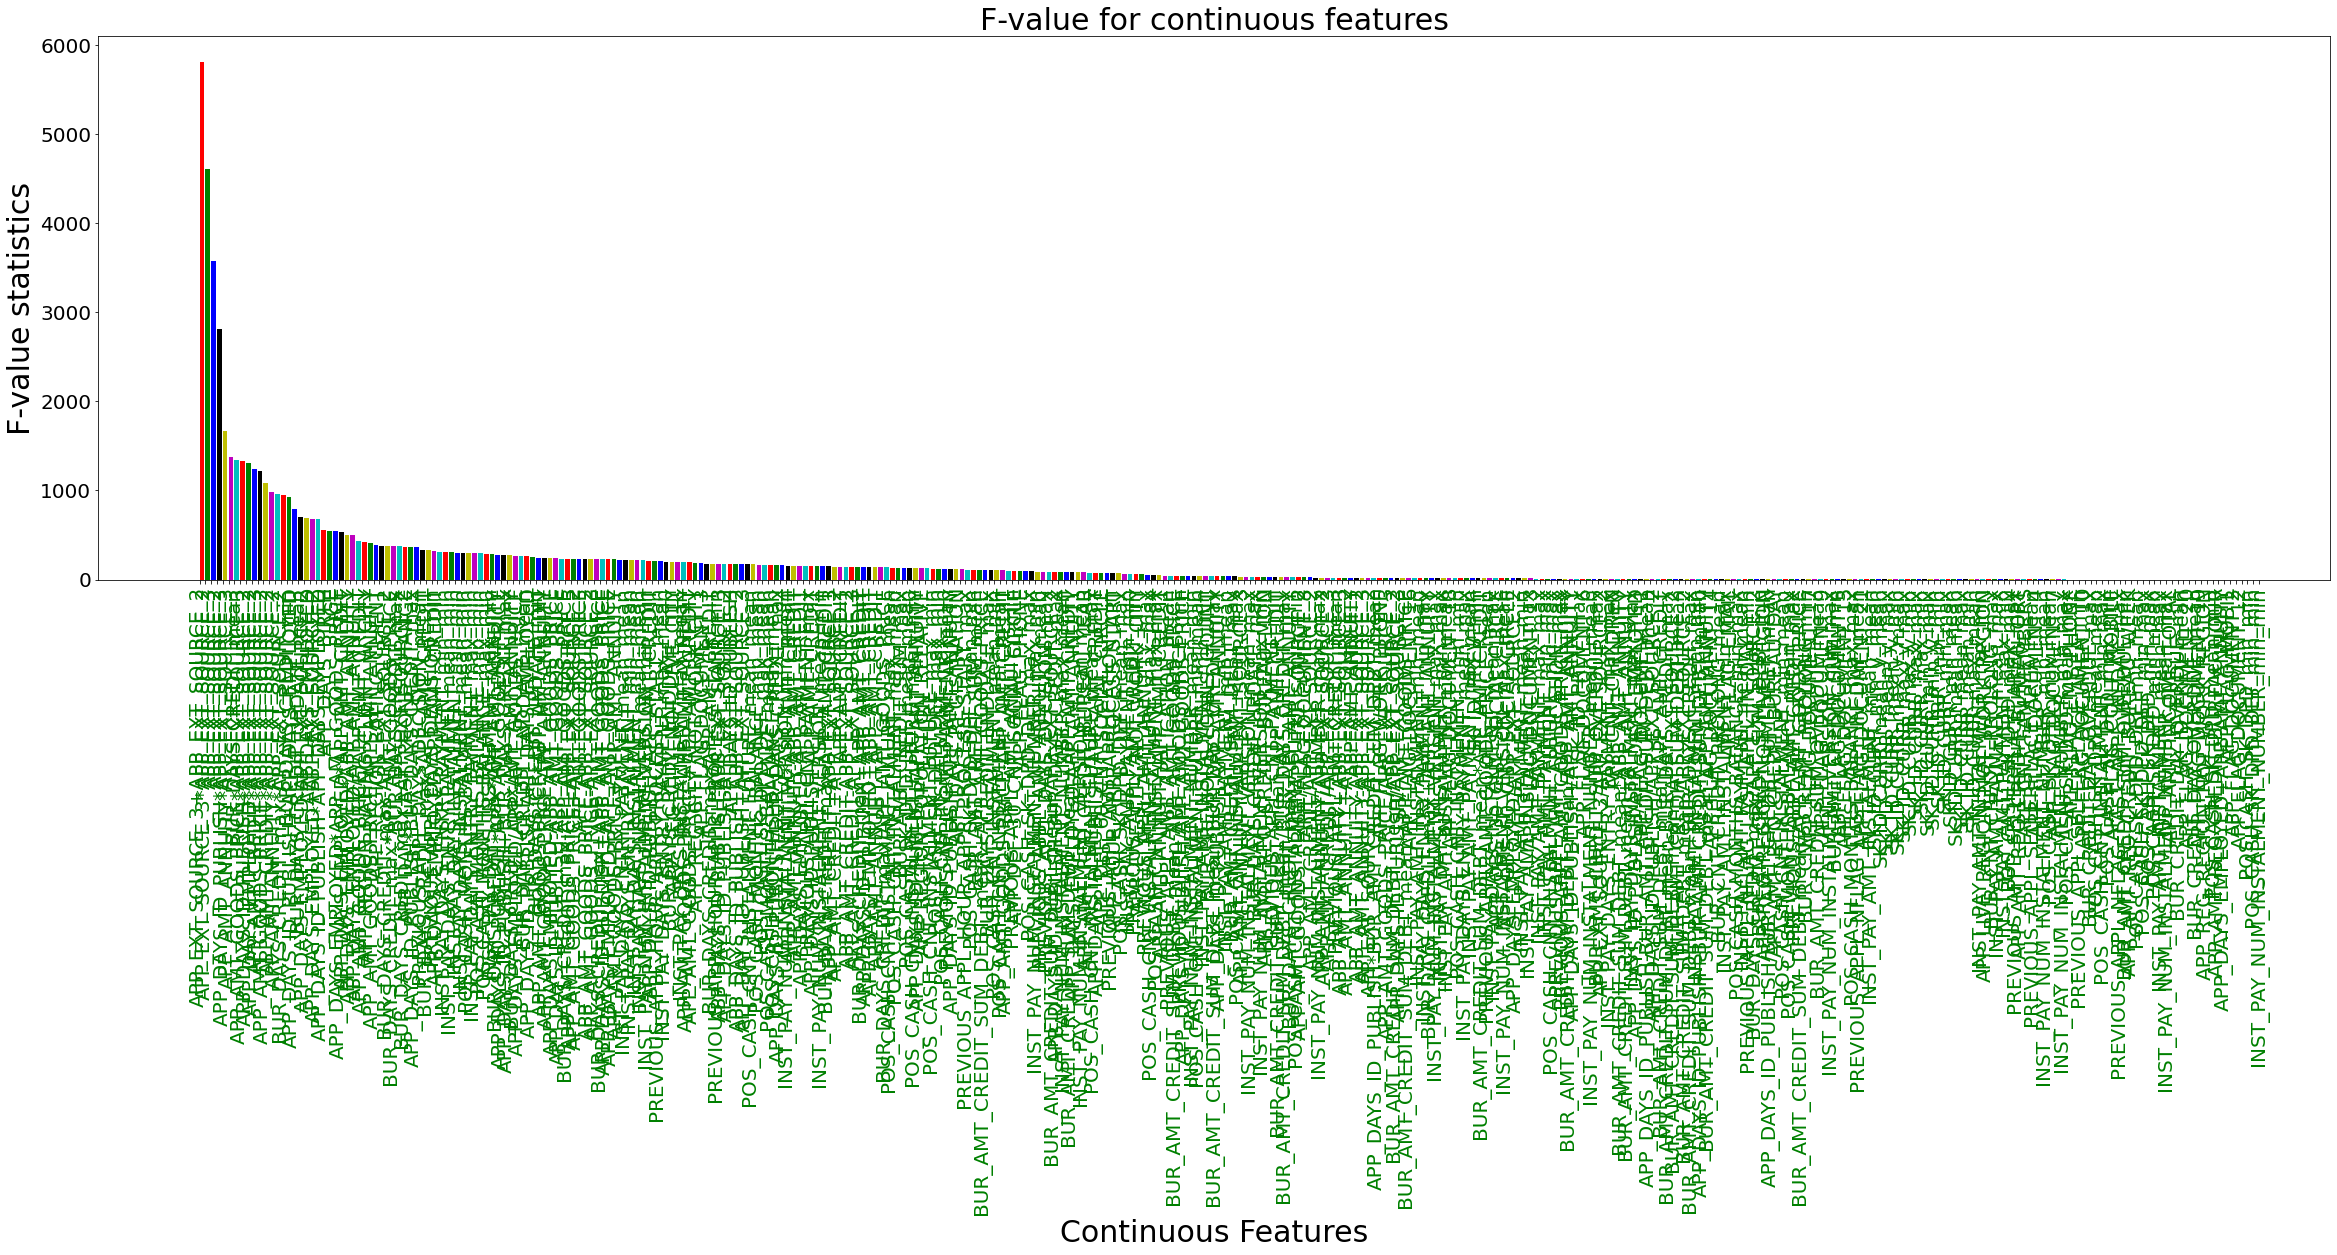

In [213]:
# Visualisation
plt.figure(figsize=(40,10))
plt.title("F-value for continuous features",fontsize=30)
plt.xlabel("Continuous Features",fontsize=30)
plt.ylabel("F-value statistics",fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.bar(range(len(df_Fvalue_s)),df_Fvalue_s['F-value'],align='edge',color='rgbkymc')
plt.xticks(range(len(df_Fvalue_s)),df_Fvalue_s['columns'],rotation=90,color='g')
plt.show()

Identification des meilleurs variables numériques continues en utilisant ANOVA F-value
- On réalise une boucle partant des 4 meilleurs variables aux 344, par pas de 20
- Pour chaque groupe, on calcule le score ROC
- On visualise les données

In [214]:
roc_auc_con=np.zeros([len(range(10,344,10)),2],float)
k=0

for i in range(10,344,10):
    train_X5,test_X5,train_y5,test_y5=train_test_split(cont_train_notna[df_Fvalue_s['columns'][:i]],train_y_na,random_state=200)
    model =LGBMClassifier(learning_rate=0.05,n_estimators=200,n_jobs=-1,reg_alpha=0.1,min_split_gain=.1,verbose=-1,is_unbalance =True)
    model.fit(train_X5,train_y5)
    roc_auc_con[k][0]=i
    roc_auc_con[k][1]=roc_auc_score(test_y5,model.predict_proba(test_X5)[:,1])
    k=k+1

In [215]:
# On visualise le TOP 5 des meilleurs groupes
df_roc_con=pd.DataFrame(roc_auc_con,columns=['Features','roc_auc_score'])
df_roc_con.sort_values(by='roc_auc_score',inplace=True,ascending=False)
print('Top five roc_auc_scores with Feature count')
df_roc_con.head()

Top five roc_auc_scores with Feature count


Features  roc_auc_score
17     180.0       0.761433
33     340.0       0.761302
27     280.0       0.760610
31     320.0       0.760182
26     270.0       0.760171

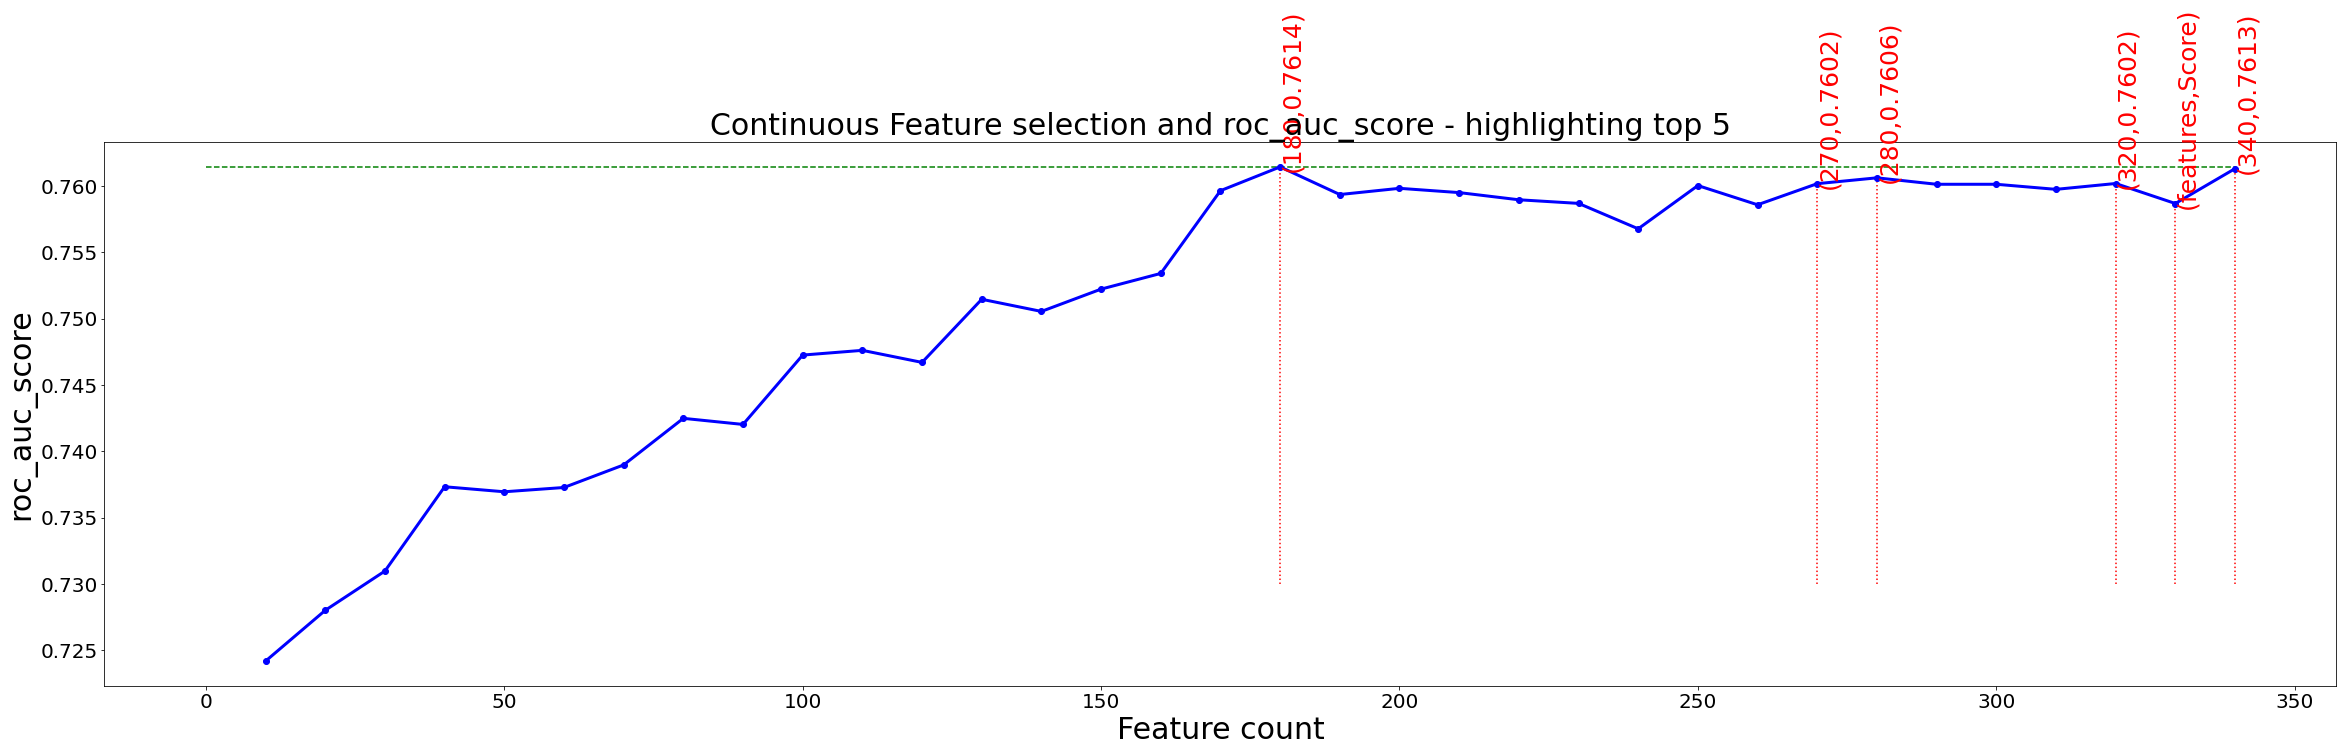

In [216]:
df_roc_con.sort_values(by='Features',inplace=True)
plt.figure(figsize=(40,10))
plt.title("Continuous Feature selection and roc_auc_score - highlighting top 5",fontsize=30)
plt.xlabel("Feature count",fontsize=30)
plt.ylabel("roc_auc_score",fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(df_roc_con['Features'],df_roc_con['roc_auc_score'],color='b',linewidth=3)
plt.hlines(xmin=0,xmax=np.max(roc_auc_con[:,0]),y=np.max(roc_auc_con[:,1]),color='g',linestyle='dashed')
df_roc_con.sort_values(by='roc_auc_score',inplace=True,ascending=False)
for i in range(len(df_roc_con)):
    plt.plot(df_roc_con.iloc[i,0],df_roc_con.iloc[i,1],'bo')
    if i<=4:
        plt.text(df_roc_con.iloc[i,0],df_roc_con.iloc[i,1],
                 (('('+str(np.int(df_roc_con.iloc[i,0]))+','+str(round(df_roc_con.iloc[i,1],4))+')')),color='r',fontsize=25,rotation=90)
        plt.vlines(ymin=0.73,ymax=df_roc_con.iloc[i,1],x=df_roc_con.iloc[i,0],color='r',linestyle='dotted')
    if i==15:
        plt.text(df_roc_con.iloc[i,0],df_roc_con.iloc[i,1],(('('+'features'+','+'Score')+')'),color='r',fontsize=25,rotation=90)
        plt.vlines(ymin=0.73,ymax=df_roc_con.iloc[i,1],x=df_roc_con.iloc[i,0],color='r',linestyle='dotted')
plt.show()

Conclusion:

- On voir qu'au dela de 150 features le modèle progresse très peu
- On va donc réduire le nombre de features pour faciliter l'apprentissage en partie 2


In [217]:
var_con_to_keep= list(feature_imp[:150]['Feature'])

On va concatener toutes les variables catégorielles, binaires et continues retenues.

In [218]:
var_to_keep = var_con_to_keep + var_bin_to_keep + list(var_cat_to_keep)

In [219]:
len(var_to_keep)

179

In [220]:
train_X_concat[var_to_keep].to_csv('train_X.csv')

In [221]:
test_X_concat[var_to_keep].to_csv('test_X.csv')

In [222]:
train_y.to_csv('train_y.csv')

In [223]:
test_y.to_csv('test_y.csv')

In [8]:
!python -V

Python 3.8.5
